## 1.Problem Definition

In this project, the daily return of the GM stock is the predicted variable.

For this case study, other than the historical data of GM, the independent variables used are the following potentially correlated assets:

Stocks: TRP NEE BYD TSLA
Currency: USD/JPY and GBP/USD
Indices: S&P 500, Dow Jones and VIX

## 2.Getting Started- Loading the data and python packages

2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import pmdarima as pm

#Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm
from scipy import stats, integrate
#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\syy19\anaconda3\envs\max\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\syy19\anaconda3\envs\max\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\syy19\anaconda3\envs\max\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\syy19\anaconda3\envs\max\lib\site-packages\tensorflow\python\framework

In [2]:
# sklearn and other models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer 
import fAux
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
import detrendPrice 
import WhiteRealityCheckFor1 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.metrics import silhouette_score
import xgboost as xgb
from datetime import datetime as dt
import talib as ta

## 2.2. Loading the Data

Next, we extract the data required for our analysis using pandas datareader.

In [3]:
# choose to use scientific notation or not
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.reset_option('display.float_format')

In [4]:
# we do not use data that is after March 2020 because of the influence of the pandemic. 
# This has a large impact on the model predictions.
stk_tickers = ['TSLA','NEE','TRP','BYD','GM']
start = dt(2013,1,1)
#end = dt.now()
end = dt(2020,1,1)
stk_data = web.DataReader(stk_tickers, 'yahoo',start,end)

In [5]:
stk_data.head()

Attributes Adj Close                                             Close  \
Symbols         TSLA        NEE        TRP       BYD         GM   TSLA   
Date                                                                     
2013-01-02     7.072  13.845044  32.266903  6.625710  22.514397  7.072   
2013-01-03     6.954  13.847008  32.098614  6.742980  23.047693  6.954   
2013-01-04     6.880  13.915726  32.253433  6.821158  23.078611  6.880   
2013-01-07     6.868  13.850934  32.334232  6.742980  22.924028  6.868   
2013-01-08     6.736  13.998184  32.239979  6.625710  22.699890  6.736   

Attributes                                         ...   Open             \
Symbols           NEE        TRP   BYD         GM  ...   TSLA        NEE   
Date                                               ...                     
2013-01-02  17.629999  47.930000  6.78  29.129999  ...  7.000  17.497499   
2013-01-03  17.632500  47.680000  6.90  29.820000  ...  7.036  17.650000   
2013-01-04  17.719999  47.910000  6.98  29.860001  ...  6.960  17.660000   
2013-01-07  17.637501  48.029999  6.90  29.660000  ...  6.960  17.712500   
2013-01-08  17.825001  47.889999  6.78  29.370001  ...  6.900  17.645000   

Attributes                                 Volume                       \
Symbols           TRP   BYD         GM       TSLA        NEE       TRP   
Date                                                                     
2013-01-02  47.939999  7.00  29.410000  5974000.0  8953200.0  621200.0   
2013-01-03  48.000000  6.77  29.049999  3710000.0  4909200.0  480900.0   
2013-01-04  47.849998  6.93  29.740000  3370000.0  3739200.0  332800.0   
2013-01-07  47.950001  6.95  29.639999  2210000.0  5578400.0  427500.0   
2013-01-08  47.959999  6.92  29.660000  6420000.0  7972400.0  472500.0   

Attributes                         
Symbols           BYD          GM  
Date                               
2013-01-02  2069000.0  15605900.0  
2013-01-03  1743800.0  22903800.0  
2013-01-04  2262400.0   8066600.0  
2013-01-07  1609600.0   8385300.0  
2013-01-08  1370000.0  10435200.0  

[5 rows x 30 columns]

In [6]:
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

ccy_data = web.DataReader(ccy_tickers, 'fred',start,end)
idx_data = web.DataReader(idx_tickers, 'fred',start,end)

Next, we need a series to predict. We choose to predict using daily returns. 

In [7]:
# we focus on the daily return
return_period = 1

In [8]:
stk_data.head(3)

Attributes Adj Close                                             Close  \
Symbols         TSLA        NEE        TRP       BYD         GM   TSLA   
Date                                                                     
2013-01-02     7.072  13.845044  32.266903  6.625710  22.514397  7.072   
2013-01-03     6.954  13.847008  32.098614  6.742980  23.047693  6.954   
2013-01-04     6.880  13.915726  32.253433  6.821158  23.078611  6.880   

Attributes                                     ...   Open             \
Symbols           NEE    TRP   BYD         GM  ...   TSLA        NEE   
Date                                           ...                     
2013-01-02  17.629999  47.93  6.78  29.129999  ...  7.000  17.497499   
2013-01-03  17.632500  47.68  6.90  29.820000  ...  7.036  17.650000   
2013-01-04  17.719999  47.91  6.98  29.860001  ...  6.960  17.660000   

Attributes                                 Volume                       \
Symbols           TRP   BYD         GM       TSLA        NEE       TRP   
Date                                                                     
2013-01-02  47.939999  7.00  29.410000  5974000.0  8953200.0  621200.0   
2013-01-03  48.000000  6.77  29.049999  3710000.0  4909200.0  480900.0   
2013-01-04  47.849998  6.93  29.740000  3370000.0  3739200.0  332800.0   

Attributes                         
Symbols           BYD          GM  
Date                               
2013-01-02  2069000.0  15605900.0  
2013-01-03  1743800.0  22903800.0  
2013-01-04  2262400.0   8066600.0  

[3 rows x 30 columns]

In [9]:
ccy_data

DEXJPUS  DEXUSUK
DATE                        
2013-01-01      NaN      NaN
2013-01-02    87.10   1.6255
2013-01-03    86.92   1.6151
2013-01-04    88.14   1.6036
2013-01-07    87.68   1.6080
...             ...      ...
2019-12-26   109.67   1.3007
2019-12-27   109.47   1.3090
2019-12-30   108.85   1.3140
2019-12-31   108.67   1.3269
2020-01-01      NaN      NaN

[1827 rows x 2 columns]

In [10]:
idx_data 

SP500      DJIA  VIXCLS
DATE                                 
2013-01-01      NaN       NaN     NaN
2013-01-02  1462.42  13412.55   14.68
2013-01-03  1459.37  13391.36   14.56
2013-01-04  1466.47  13435.21   13.83
2013-01-07  1461.89  13384.29   13.79
...             ...       ...     ...
2019-12-26  3239.91  28621.39   12.65
2019-12-27  3240.02  28645.26   13.43
2019-12-30  3221.29  28462.14   14.82
2019-12-31  3230.78  28538.44   13.78
2020-01-01      NaN       NaN     NaN

[1827 rows x 3 columns]

In [11]:
Y = stk_data.loc[:, ('Adj Close', 'GM')].pct_change(return_period).shift(-return_period)
# give Y a name
Y.name = Y.name[-1]+'_pred'
Y

Date
2013-01-02    0.023687
2013-01-03    0.001341
2013-01-04   -0.006698
2013-01-07   -0.009777
2013-01-08    0.020429
                ...   
2019-12-24   -0.002734
2019-12-26    0.002193
2019-12-27   -0.003282
2019-12-30    0.004391
2019-12-31         NaN
Name: GM_pred, Length: 1762, dtype: float64

In [12]:
# returns of potential correlated stocks
X1 = stk_data.loc[:, ('Adj Close', ('TSLA','NEE','TRP','BYD'))].pct_change(return_period)
X1.columns = X1.columns.droplevel()
X1

Symbols         TSLA       NEE       TRP       BYD
Date                                              
2013-01-02       NaN       NaN       NaN       NaN
2013-01-03 -0.016686  0.000142 -0.005216  0.017699
2013-01-04 -0.010641  0.004963  0.004823  0.011594
2013-01-07 -0.001744 -0.004656  0.002505 -0.011461
2013-01-08 -0.019220  0.010631 -0.002915 -0.017391
...              ...       ...       ...       ...
2019-12-24  0.014384  0.007245 -0.004133  0.001977
2019-12-26  0.013380  0.006029  0.015657  0.009558
2019-12-27 -0.001300  0.002273 -0.001114 -0.008488
2019-12-30 -0.036433 -0.005031 -0.010093 -0.013171
2019-12-31  0.008753  0.003606  0.012151 -0.001001

[1762 rows x 4 columns]

In [13]:
ret = stk_data.loc[:, ('Adj Close', ('GM'))].pct_change()
ret

Date
2013-01-02         NaN
2013-01-03    0.023687
2013-01-04    0.001341
2013-01-07   -0.006698
2013-01-08   -0.009777
                ...   
2019-12-24   -0.005167
2019-12-26   -0.002734
2019-12-27    0.002193
2019-12-30   -0.003282
2019-12-31    0.004391
Name: (Adj Close, GM), Length: 1762, dtype: float64

In [14]:
# currencies and indices
X2 = ccy_data.pct_change(return_period)
X3 = idx_data.pct_change(return_period)

In [15]:
X2.head(10)

DEXJPUS   DEXUSUK
DATE                          
2013-01-01       NaN       NaN
2013-01-02       NaN       NaN
2013-01-03 -0.002067 -0.006398
2013-01-04  0.014036 -0.007120
2013-01-07 -0.005219  0.002744
2013-01-08 -0.004220 -0.002488
2013-01-09  0.006758 -0.000998
2013-01-10  0.002958  0.006303
2013-01-11  0.012024  0.000186
2013-01-14  0.001345 -0.003162

In [16]:
X3

SP500      DJIA    VIXCLS
DATE                                    
2013-01-01       NaN       NaN       NaN
2013-01-02       NaN       NaN       NaN
2013-01-03 -0.002086 -0.001580 -0.008174
2013-01-04  0.004865  0.003274 -0.050137
2013-01-07 -0.003123 -0.003790 -0.002892
...              ...       ...       ...
2019-12-26  0.005128  0.003715 -0.001579
2019-12-27  0.000034  0.000834  0.061660
2019-12-30 -0.005781 -0.006393  0.103500
2019-12-31  0.002946  0.002681 -0.070175
2020-01-01  0.000000  0.000000  0.000000

[1827 rows x 3 columns]

In [17]:
X4 = pd.DataFrame()

In [18]:
# add momentum features
X4 = pd.concat([stk_data.loc[:, ('Adj Close', 'GM')].pct_change(return_period*i) for i in range(1,16)], axis=1).dropna()
names = []
for n in list(range(1,16)):
    names.append(('GM_ret' + str(n)))
X4.columns = names
X4

GM_ret1   GM_ret2   GM_ret3   GM_ret4   GM_ret5   GM_ret6  \
Date                                                                     
2013-01-24  0.007350  0.005239 -0.017077 -0.024076 -0.018082 -0.059477   
2013-01-25  0.010076  0.017501  0.015369 -0.007172 -0.014242 -0.008188   
2013-01-28 -0.008256  0.001737  0.009101  0.006986 -0.015369 -0.022380   
2013-01-29 -0.013181 -0.021328 -0.011466 -0.004200 -0.006287 -0.028347   
2013-01-30 -0.017926 -0.030871 -0.038872 -0.029187 -0.022051 -0.024100   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.005167 -0.017987 -0.018250 -0.019566  0.007436  0.013016   
2019-12-26 -0.002734 -0.007887 -0.020671 -0.020934 -0.022246  0.004682   
2019-12-27  0.002193 -0.000547 -0.005711 -0.018523 -0.018787 -0.020102   
2019-12-30 -0.003282 -0.001097 -0.003827 -0.008975 -0.021745 -0.022007   
2019-12-31  0.004391  0.001094  0.003289  0.000547 -0.004623 -0.017450   

             GM_ret7   GM_ret8   GM_ret9  GM_ret10  GM_ret11  GM_ret12  \
Date                                                                     
2013-01-24 -0.051104 -0.052042 -0.054534 -0.039706 -0.020089 -0.029670   
2013-01-25 -0.050000 -0.041543 -0.042490 -0.045007 -0.030030 -0.010215   
2013-01-28 -0.016376 -0.057843 -0.049456 -0.050395 -0.052891 -0.038038   
2013-01-29 -0.035266 -0.029341 -0.070261 -0.061985 -0.062912 -0.065374   
2013-01-30 -0.045765 -0.052560 -0.046741 -0.086928 -0.078800 -0.079710   
...              ...       ...       ...       ...       ...       ...   
2019-12-24  0.026087  0.013297  0.038025  0.041868  0.033918  0.029263   
2019-12-26  0.010246  0.023282  0.010526  0.035187  0.039020  0.031091   
2019-12-27  0.006885  0.012462  0.025526  0.012742  0.037457  0.041299   
2019-12-30 -0.023318  0.003580  0.009139  0.022160  0.009418  0.034052   
2019-12-31 -0.017713 -0.019030  0.007987  0.013569  0.026648  0.013850   

            GM_ret13  GM_ret14  GM_ret15  
Date                                      
2013-01-24 -0.036169 -0.034876 -0.012015  
2013-01-25 -0.019892 -0.026457 -0.025151  
2013-01-28 -0.018386 -0.027984 -0.034495  
2013-01-29 -0.050717 -0.031324 -0.040796  
2013-01-30 -0.082129 -0.067734 -0.048689  
...              ...       ...       ...  
2019-12-24  0.035967  0.032750  0.040598  
2019-12-26  0.026449  0.033135  0.029927  
2019-12-27  0.033352  0.028700  0.035401  
2019-12-30  0.037881  0.029960  0.025324  
2019-12-31  0.038592  0.042438  0.034483  

[1747 rows x 15 columns]

In [19]:
"""
Build some technical indicators
We enter the trade at the close. We know today's open, high ,low and close
So no shift needed
"""
n=5
#n=10
close = stk_data.loc[:, ('Close', 'GM')].copy()
openp =  stk_data.loc[:, ('Open', 'GM')].copy() 
high = stk_data.loc[:, ('High', 'GM')].copy()
low = stk_data.loc[:, ('Low', 'GM')].copy()
X5 = pd.DataFrame(index = stk_data.index)
X5['RSI']=ta.RSI(np.array(close), timeperiod=n)
X5['SMA'] = close.rolling(window=n).mean()
X5['Corr']= close.rolling(window=n).corr(X5['SMA'])
X5['SAR']=ta.SAR(np.array(high),np.array(low), 0.2,0.2)
X5['ADX']=ta.ADX(np.array(high),np.array(low), np.array(openp), timeperiod =n)
X5['OO']= openp - openp.shift(1)
X5['OC']= openp - close
X5.fillna(0, inplace=True)

In [20]:
X5

RSI        SMA      Corr        SAR        ADX        OO  \
Date                                                                         
2013-01-02   0.000000   0.000000  0.000000   0.000000   0.000000  0.000000   
2013-01-03   0.000000   0.000000  0.000000  28.629999   0.000000 -0.360001   
2013-01-04   0.000000   0.000000  0.000000  28.840000   0.000000  0.690001   
2013-01-07   0.000000   0.000000  0.000000  28.840000   0.000000 -0.100000   
2013-01-08   0.000000  29.568000  0.000000  30.230000   0.000000  0.020000   
...               ...        ...       ...        ...        ...       ...   
2019-12-24  49.924184  37.034000 -0.813284  37.619999  37.477408 -0.660000   
2019-12-26  46.327777  36.868000 -0.689114  37.410000  30.716355 -0.139999   
2019-12-27  49.934373  36.728001 -0.045616  37.194000  25.680045 -0.029999   
2019-12-30  44.346934  36.566000  0.658098  37.021201  23.413305 -0.060001   
2019-12-31  53.094299  36.532000  0.155715  36.856961  19.475898 -0.130001   

                  OC  
Date                  
2013-01-02  0.280001  
2013-01-03 -0.770000  
2013-01-04 -0.120001  
2013-01-07 -0.020000  
2013-01-08  0.289999  
...              ...  
2019-12-24  0.149998  
2019-12-26  0.110001  
2019-12-27  0.000000  
2019-12-30  0.060001  
2019-12-31 -0.230000  

[1762 rows x 7 columns]

In [21]:
# add dix and gex of S&P500 as predictors 
X6 = pd. read_csv('DIX_GEX_SP500.CSV')
X6.rename(columns={"dix": "dix_sp500", "gex": "gex_sp500"},inplace = True)
X6.drop('SP500price', axis = 1, inplace = True)
for i in range(0,X6.shape[0]):
    X6.loc[i,'date'] = dt.strptime(X6.loc[i,'date'], '%m/%d/%Y').date()
X6.set_index('date',inplace = True)
X6

dix_sp500     gex_sp500
date                               
2011-05-02   0.378842  1.897313e+09
2011-05-03   0.383411  1.859731e+09
2011-05-04   0.392122  1.717764e+09
2011-05-05   0.405457  1.361864e+09
2011-05-06   0.418649  1.490329e+09
...               ...           ...
2021-11-11   0.462736  1.133575e+10
2021-11-12   0.432313  1.609739e+10
2021-11-15   0.436879  1.736127e+10
2021-11-16   0.423910  1.518840e+10
2021-11-17   0.425529  1.647941e+10

[2657 rows x 2 columns]

In [22]:
X7 = pd.DataFrame()
# add some lag features
X7 = pd.concat([stk_data.loc[:, ('Adj Close', 'GM')].pct_change(return_period).shift(i) for i in range(1,16)], axis=1).dropna()
names = []
for n in list(range(1,16)):
    names.append(('lag' + str(n)))
X7.columns = names
X7

lag1      lag2      lag3      lag4      lag5      lag6  \
Date                                                                     
2013-01-25  0.007350 -0.002096 -0.022200 -0.007121  0.006141 -0.042157   
2013-01-28  0.010076  0.007350 -0.002096 -0.022200 -0.007121  0.006141   
2013-01-29 -0.008256  0.010076  0.007350 -0.002096 -0.022200 -0.007121   
2013-01-30 -0.013181 -0.008256  0.010076  0.007350 -0.002096 -0.022200   
2013-01-31 -0.017926 -0.013181 -0.008256  0.010076  0.007350 -0.002096   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.012886 -0.000268 -0.001340  0.027541  0.005539  0.012903   
2019-12-26 -0.005167 -0.012886 -0.000268 -0.001340  0.027541  0.005539   
2019-12-27 -0.002734 -0.005167 -0.012886 -0.000268 -0.001340  0.027541   
2019-12-30  0.002193 -0.002734 -0.005167 -0.012886 -0.000268 -0.001340   
2019-12-31 -0.003282  0.002193 -0.002734 -0.005167 -0.012886 -0.000268   

                lag7      lag8      lag9     lag10     lag11     lag12  \
Date                                                                     
2013-01-25  0.008902 -0.000988 -0.002628  0.015682  0.020429 -0.009777   
2013-01-28 -0.042157  0.008902 -0.000988 -0.002628  0.015682  0.020429   
2013-01-29  0.006141 -0.042157  0.008902 -0.000988 -0.002628  0.015682   
2013-01-30 -0.007121  0.006141 -0.042157  0.008902 -0.000988 -0.002628   
2013-01-31 -0.022200 -0.007121  0.006141 -0.042157  0.008902 -0.000988   
...              ...       ...       ...       ...       ...       ...   
2019-12-24 -0.012465  0.024404  0.003703 -0.007631 -0.004502  0.006514   
2019-12-26  0.012903 -0.012465  0.024404  0.003703 -0.007631 -0.004502   
2019-12-27  0.005539  0.012903 -0.012465  0.024404  0.003703 -0.007631   
2019-12-30  0.027541  0.005539  0.012903 -0.012465  0.024404  0.003703   
2019-12-31 -0.001340  0.027541  0.005539  0.012903 -0.012465  0.024404   

               lag13     lag14     lag15  
Date                                      
2013-01-25 -0.006698  0.001341  0.023687  
2013-01-28 -0.009777 -0.006698  0.001341  
2013-01-29  0.020429 -0.009777 -0.006698  
2013-01-30  0.015682  0.020429 -0.009777  
2013-01-31 -0.002628  0.015682  0.020429  
...              ...       ...       ...  
2019-12-24 -0.003106  0.007599 -0.009755  
2019-12-26  0.006514 -0.003106  0.007599  
2019-12-27 -0.004502  0.006514 -0.003106  
2019-12-30 -0.007631 -0.004502  0.006514  
2019-12-31  0.003703 -0.007631 -0.004502  

[1746 rows x 15 columns]

In [23]:
X = pd.concat([X1, X2, X3, X4, X7, X5, X6], axis=1)

In [24]:
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [25]:
Y.name

'GM_pred'

In [26]:
X.columns

Index(['TSLA', 'NEE', 'TRP', 'BYD', 'DEXJPUS', 'DEXUSUK', 'SP500', 'DJIA',
       'VIXCLS', 'GM_ret1', 'GM_ret2', 'GM_ret3', 'GM_ret4', 'GM_ret5',
       'GM_ret6', 'GM_ret7', 'GM_ret8', 'GM_ret9', 'GM_ret10', 'GM_ret11',
       'GM_ret12', 'GM_ret13', 'GM_ret14', 'GM_ret15', 'lag1', 'lag2', 'lag3',
       'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11',
       'lag12', 'lag13', 'lag14', 'lag15', 'RSI', 'SMA', 'Corr', 'SAR', 'ADX',
       'OO', 'OC', 'dix_sp500', 'gex_sp500'],
      dtype='object')

In [27]:
Y

2013-01-25   -0.008256
2013-01-28   -0.013181
2013-01-29   -0.017926
2013-01-30    0.005368
2013-01-31    0.002848
                ...   
2019-12-23   -0.005167
2019-12-24   -0.002734
2019-12-26    0.002193
2019-12-27   -0.003282
2019-12-30    0.004391
Name: GM_pred, Length: 1745, dtype: float64

In [28]:
X.head()

TSLA       NEE       TRP       BYD   DEXJPUS   DEXUSUK  \
2013-01-25 -0.000270  0.005548 -0.006768  0.004491  0.011106  0.000633   
2013-01-28  0.028394 -0.001379  0.011357  0.013413 -0.003405 -0.007152   
2013-01-29 -0.002104  0.002900 -0.007146 -0.027941 -0.000882  0.004144   
2013-01-30 -0.011331 -0.008401 -0.010899  0.009077  0.004413  0.002666   
2013-01-31 -0.000267  0.000694 -0.015177  0.050975  0.002526  0.003989   

               SP500      DJIA    VIXCLS   GM_ret1  ...     lag15        RSI  \
2013-01-25  0.005445  0.005110  0.015760  0.010076  ...  0.023687  46.389526   
2013-01-28 -0.001850 -0.001011  0.052754 -0.008256  ...  0.001341  39.032192   
2013-01-29  0.005106  0.005222 -0.019160 -0.013181  ... -0.006698  29.707271   
2013-01-30 -0.003900 -0.003153  0.075883 -0.017926  ... -0.009777  21.207470   
2013-01-31 -0.002563 -0.003583 -0.002793  0.005368  ...  0.020429  28.706823   

               SMA      Corr        SAR        ADX        OO        OC  \
2013-01-25  28.866  0.385508  26.620001  60.051890  0.369999 -0.110001   
2013-01-28  28.776 -0.625792  27.128001  60.849955  0.090000  0.219999   
2013-01-29  28.740 -0.004031  27.534400  62.991774 -0.250000  0.349998   
2013-01-30  28.614  0.830328  29.160000  65.755548 -0.519999  0.340000   
2013-01-31  28.476  0.884157  28.882000  68.367747 -0.480001 -0.290001   

            dix_sp500     gex_sp500  
2013-01-25   0.387115  1.416847e+09  
2013-01-28   0.384003  1.414172e+09  
2013-01-29   0.420941  1.650243e+09  
2013-01-30   0.416476  1.556969e+09  
2013-01-31   0.405992  1.367684e+09  

[5 rows x 48 columns]

## 3.Exploratory Data Analysis

## 3.1. Descriptive Statistics

Lets have a look at the dataset we have

In [29]:
pd.set_option('precision', 3)
dataset.describe()

GM_pred       TSLA        NEE        TRP        BYD    DEXJPUS  \
count  1.745e+03  1.745e+03  1.745e+03  1.745e+03  1.745e+03  1.745e+03   
mean   3.988e-04  1.867e-03  8.589e-04  2.936e-04  1.172e-03  1.283e-04   
std    1.591e-02  3.123e-02  1.007e-02  1.264e-02  2.456e-02  5.718e-03   
min   -6.081e-02 -1.451e-01 -6.136e-02 -6.061e-02 -1.864e-01 -3.437e-02   
25%   -8.260e-03 -1.334e-02 -4.807e-03 -6.441e-03 -1.179e-02 -2.661e-03   
50%    8.354e-04  9.495e-04  1.294e-03  6.141e-04  5.215e-04  1.787e-04   
75%    8.880e-03  1.702e-02  6.743e-03  7.448e-03  1.308e-02  3.007e-03   
max    1.287e-01  2.440e-01  4.994e-02  6.927e-02  2.268e-01  3.399e-02   

         DEXUSUK      SP500       DJIA    VIXCLS  ...      lag15       RSI  \
count  1.745e+03  1.745e+03  1.745e+03  1745.000  ...  1.745e+03  1745.000   
mean  -9.201e-05  4.729e-04  4.463e-04     0.003  ...  3.814e-04    50.843   
std    5.585e-03  8.098e-03  8.042e-03     0.085  ...  1.595e-02    20.357   
min   -7.845e-02 -4.098e-02 -4.605e-02    -0.259  ... -6.081e-02     4.047   
25%   -3.082e-03 -2.944e-03 -2.950e-03    -0.043  ... -8.279e-03    34.369   
50%    0.000e+00  5.923e-04  6.322e-04    -0.006  ...  8.453e-04    51.528   
75%    2.923e-03  4.761e-03  4.600e-03     0.037  ...  8.902e-03    66.551   
max    2.821e-02  4.959e-02  4.985e-02     1.156  ...  1.287e-01    97.434   

            SMA      Corr       SAR       ADX        OO        OC  dix_sp500  \
count  1745.000  1745.000  1745.000  1745.000  1745.000  1745.000   1745.000   
mean     35.283     0.434    35.264    39.732     0.005     0.022      0.417   
std       3.670     0.521     3.777    14.307     0.580     0.461      0.026   
min      26.776    -0.994    24.620    13.913    -3.160    -2.020      0.331   
25%      32.896     0.128    32.694    29.380    -0.320    -0.250      0.400   
50%      35.428     0.623    35.384    37.204     0.020     0.000      0.416   
75%      37.408     0.855    37.488    47.252     0.320     0.280      0.434   
max      45.542     0.997    46.760    91.908     4.150     1.920      0.514   

       gex_sp500  
count  1.745e+03  
mean   2.358e+09  
std    1.539e+09  
min   -2.568e+09  
25%    1.392e+09  
50%    2.312e+09  
75%    3.272e+09  
max    9.994e+09  

[8 rows x 49 columns]

## 3.2. Data Visualization

Next, lets look at the distribution of the data over the entire period

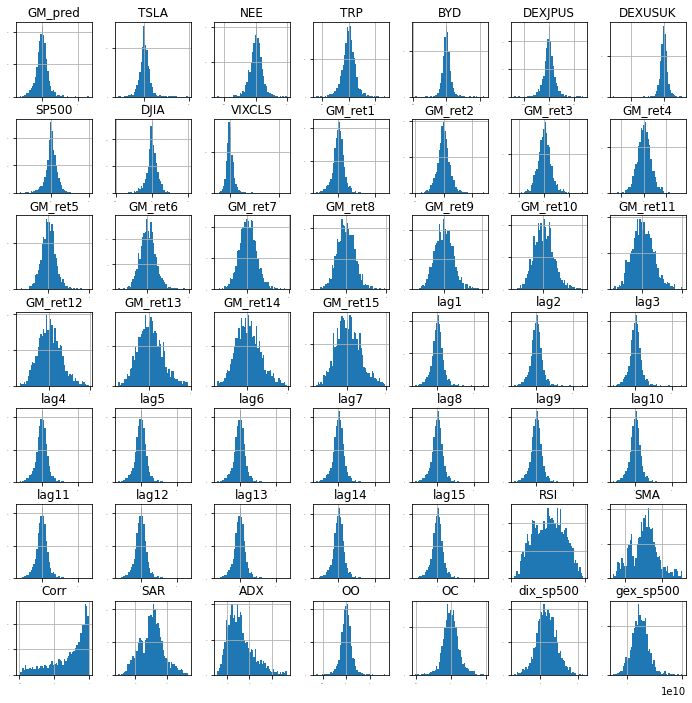

In [30]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

The above histogram shows the distribution for each series individually. Next, lets look at the density distribution over the same x axis scale.

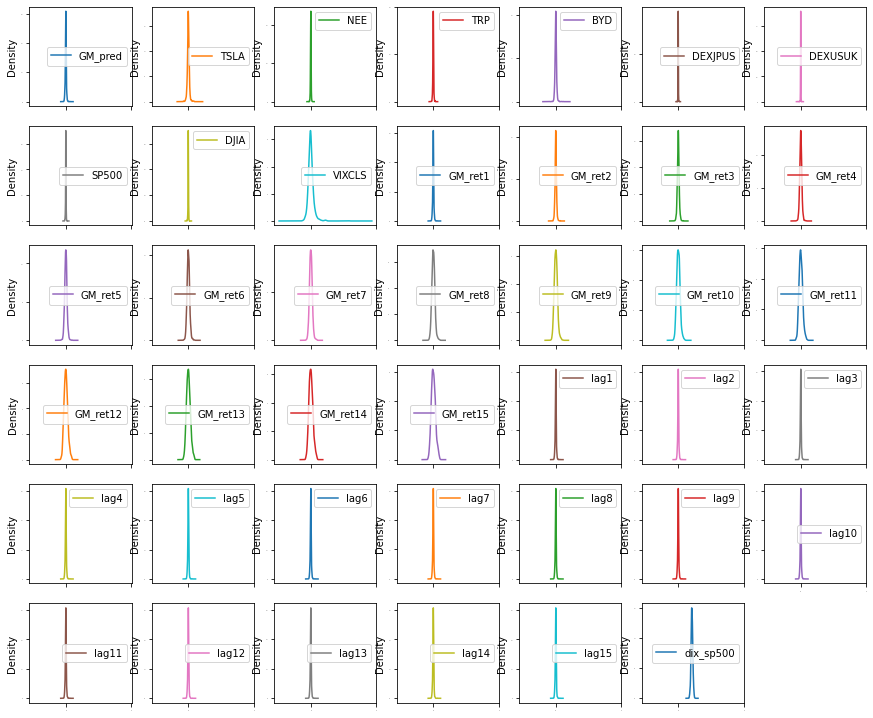

In [31]:
# Only show features that have the same scale. 
pd.concat([dataset.iloc[:,:-9],dataset['dix_sp500']],axis = 1) \
.plot(kind='density', subplots=True, layout=(7,7), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

We can see that the VIXCLS has a larger variance compared to the other distributions.

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

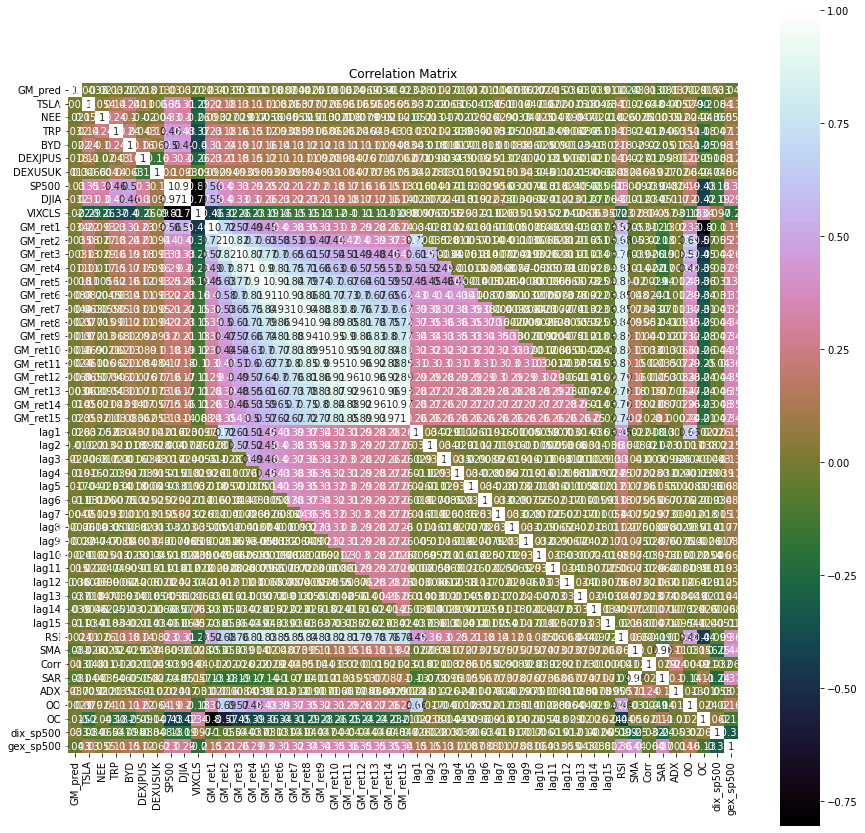

In [32]:
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation plot above, we see some correlation of the GM returns(with different return period), lag features and RSI.

<Figure size 1080x1080 with 0 Axes>

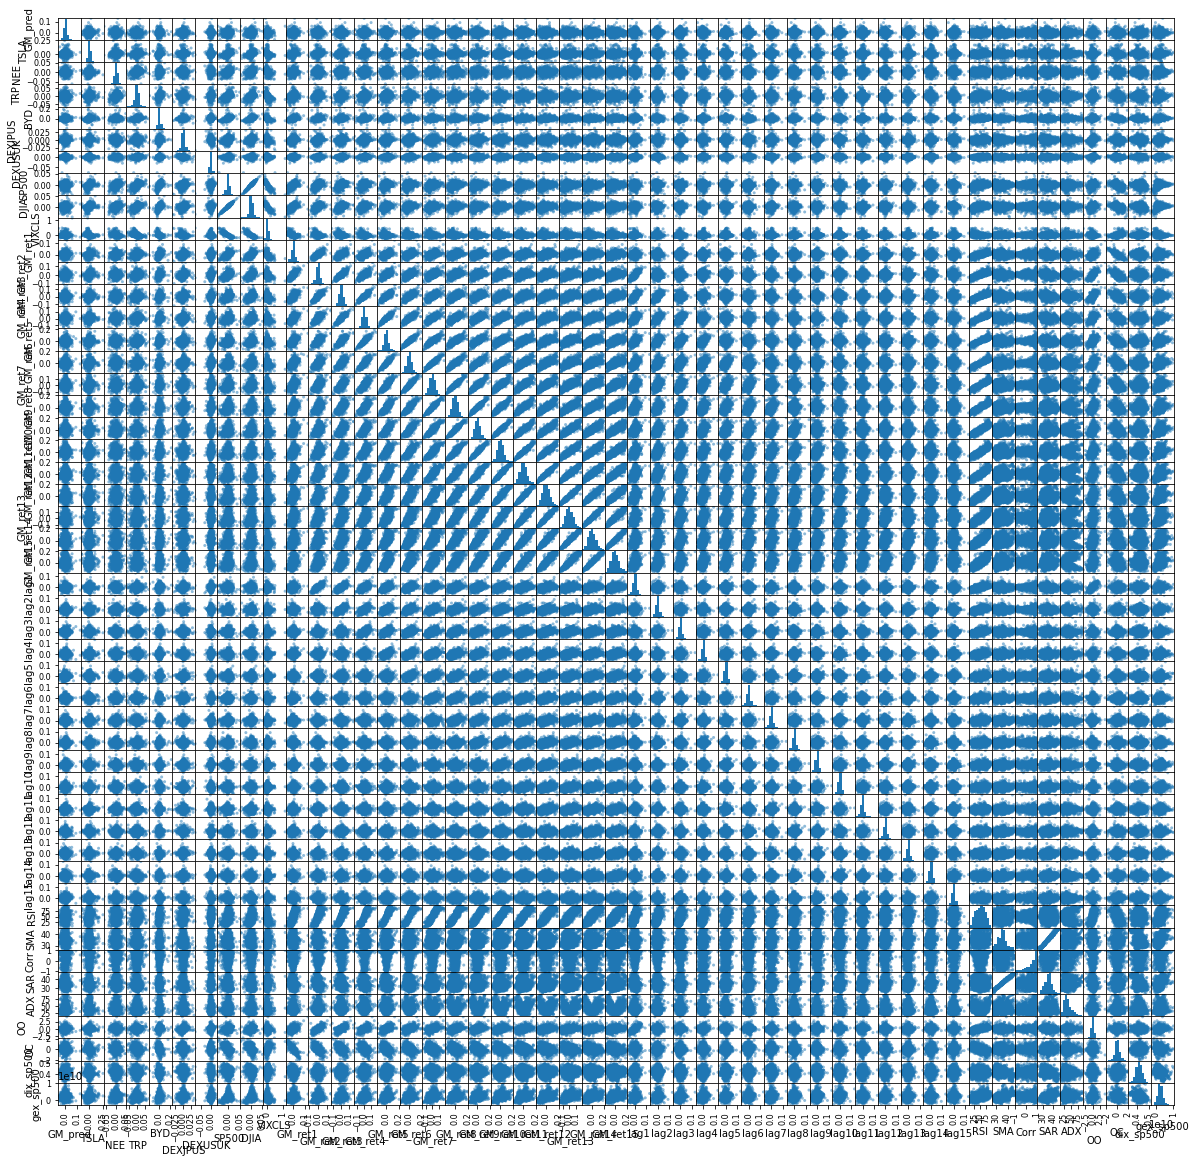

In [33]:
plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(20,20))
#plt.tight_layout()
plt.show()

We can see some linear relationship between SMA and SAR

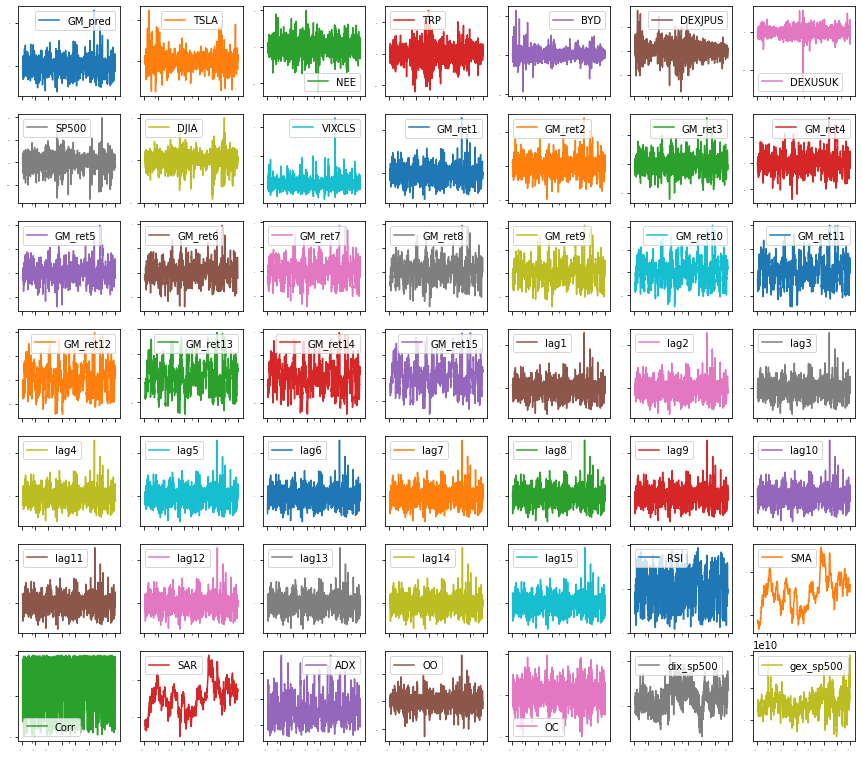

In [34]:
# line chart gives the observable amplitudes of a target period, we could see which stock has the most stationary price trend and which stock has the most fluctuant trend
dataset.plot(kind='line', subplots=True, layout=(7,7), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

GM_pred        AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
TSLA         AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
NEE          AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
TRP          AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
BYD          AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
DEXJPUS      AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
DEXUSUK      AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
SP500          AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
DJIA         AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
VIXCLS       AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
GM_ret1      AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
GM_ret2      AxesSubplot(0.578659,0.677439;0.0945122x0.0920...
GM_ret3      AxesSubplot(0.692073,0.677439;0.0945122x0.0920...
GM_ret4      AxesSubplot(0.805488,0.677439;0.0945122x0.0920...
GM_ret5        AxesSubplot(0.125,0.566951;0.0945122x0.0920732)
GM_ret6      AxesSubplot(0.238415,0.566951;0.0945122x0.

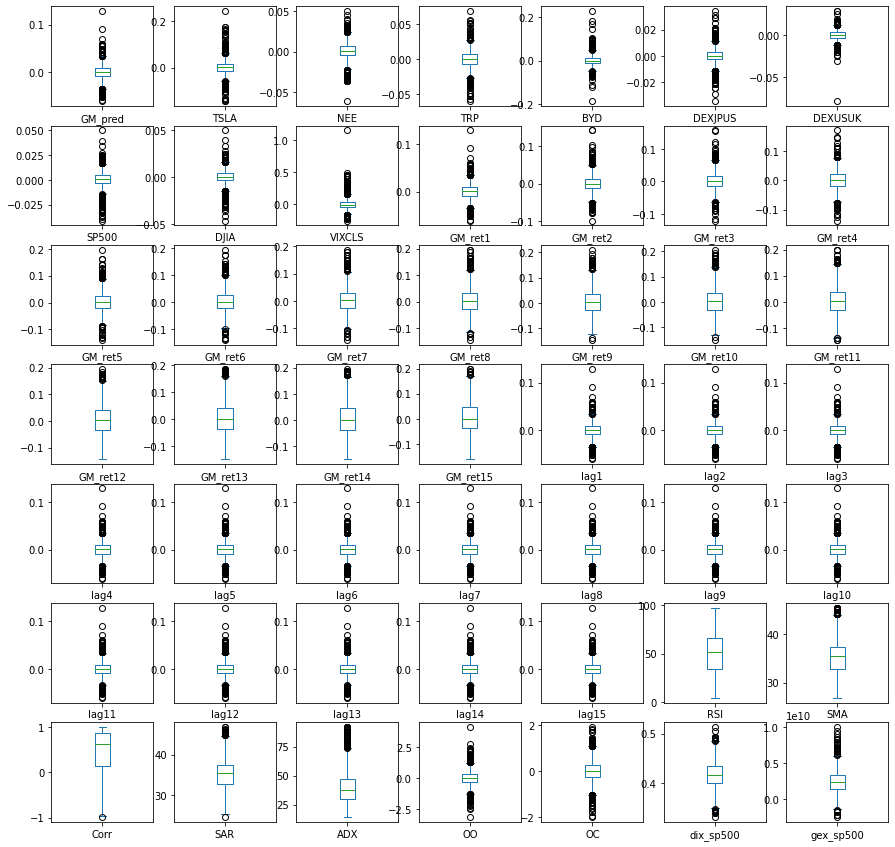

In [35]:
#Box chart tells the position of interquartile range 
#Values greater than 1.5 times of the upper quartile difference or less than 1.5 times the lower quartile difference are classified as outliers.
#Massive outlier may bring negative impact to our prediction result. We could see how mant outliers are distributed in such graphs.
dataset.plot(kind='box', subplots=True, layout=(7,7), figsize=(15,15))

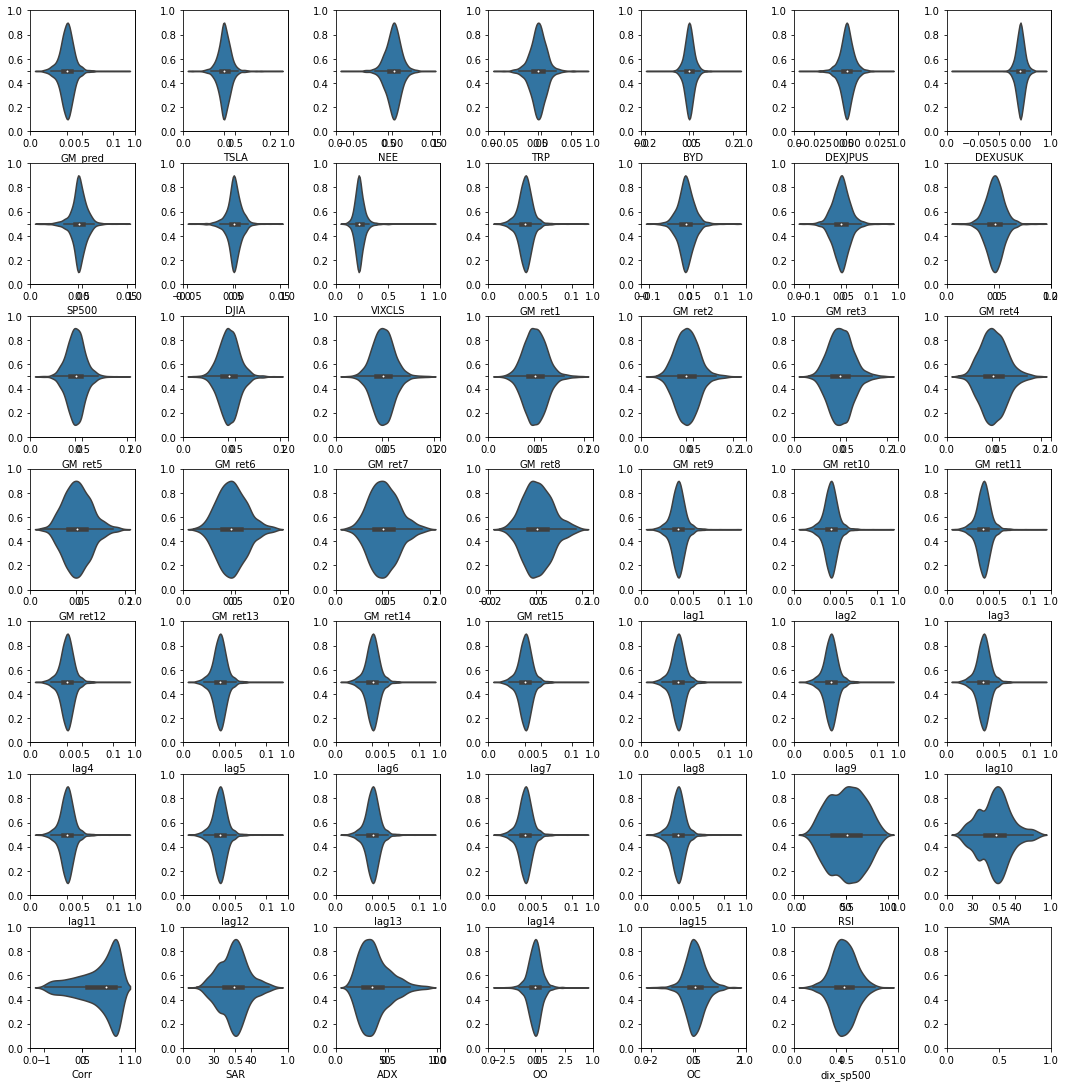

In [36]:
#Violin plot is similar to the boxplot, is used to show data distribution and probability density
#This graph combines the characteristics of a boxplot and a density plot to show the distribution shape of data
fig,axes = plt.subplots(7,7,figsize=(15,15))
plt.tight_layout()
for i in range(48):
    sns.violinplot(dataset.iloc[:,i],ax=fig.add_subplot(7,7,i+1))

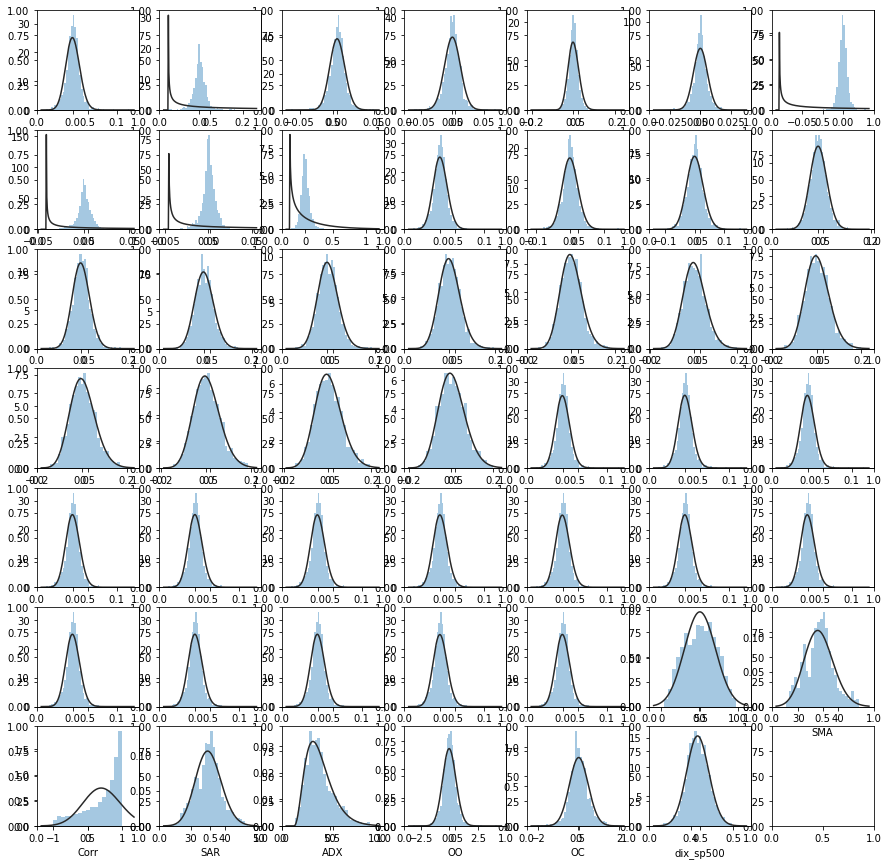

In [37]:
#Flexibly plot a univariate distribution of observations.
#A combination of hist plot and density plot
fig,axes = plt.subplots(7,7,figsize=(15,15))
for i in range(48):
    sns.distplot(dataset.iloc[:,i],ax=fig.add_subplot(7,7,i+1), kde=False, fit=stats.gamma)

## 3.3. Time Series Analysis

Next, we look at the seasonal decomposition of our time series

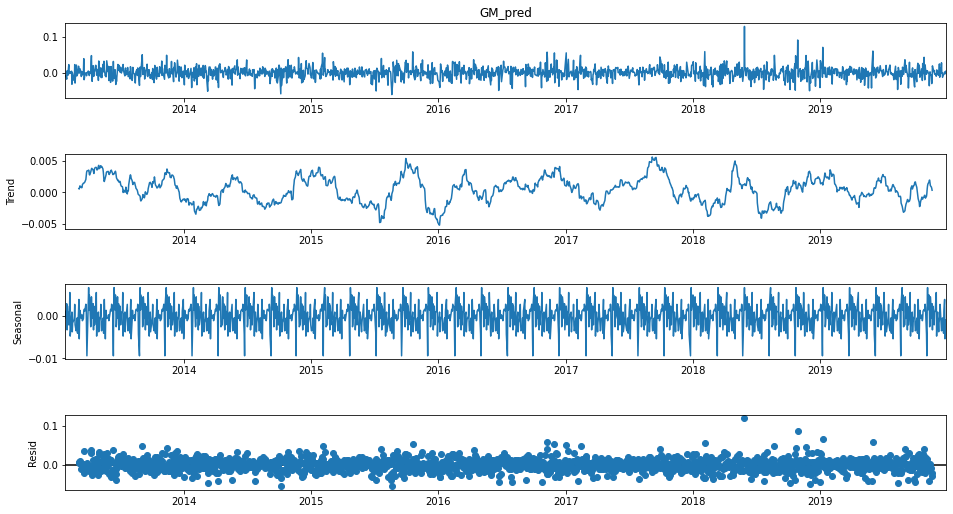

In [38]:
res = sm.tsa.seasonal_decompose(Y,freq = 52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

We can see that for GM there is no obvious trend. 

## 4. Data Preparation

## 4.2. Feature Selection

We use sklearn's SelectKBest function to get a sense of feature importance.

In [39]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

Score
Specs            
SMA        12.173
SAR        11.543
gex_sp500   3.245
lag14       2.653
lag13       2.451
ADX         2.380
lag12       2.275
GM_ret1     2.012
dix_sp500   1.858
DJIA        1.805

In [40]:
featureScores

Specs      Score
0        TSLA  1.866e-02
1         NEE  7.593e-01
2         TRP  1.779e+00
3         BYD  8.700e-01
4     DEXJPUS  5.557e-01
5     DEXUSUK  3.154e-01
6       SP500  1.581e+00
7        DJIA  1.805e+00
8      VIXCLS  8.123e-01
9     GM_ret1  2.012e+00
10    GM_ret2  2.098e-02
11    GM_ret3  1.655e-02
12    GM_ret4  1.965e-01
13    GM_ret5  5.503e-03
14    GM_ret6  1.324e-01
15    GM_ret7  3.318e-02
16    GM_ret8  1.132e-02
17    GM_ret9  5.991e-03
18   GM_ret10  4.509e-03
19   GM_ret11  9.795e-03
20   GM_ret12  8.291e-02
21   GM_ret13  2.014e-02
22   GM_ret14  3.195e-01
23   GM_ret15  9.220e-01
24       lag1  1.395e+00
25       lag2  1.764e-01
26       lag3  1.229e+00
27       lag4  5.968e-01
28       lag5  5.118e-01
29       lag6  2.022e-01
30       lag7  3.904e-02
31       lag8  2.226e-04
32       lag9  1.246e-04
33      lag10  9.927e-03
34      lag11  3.780e-01
35      lag12  2.275e+00
36      lag13  2.451e+00
37      lag14  2.653e+00
38      lag15  2.118e-01
39        RSI  9.702e-03
40        SMA  1.217e+01
41       Corr  3.050e-01
42        SAR  1.154e+01
43        ADX  2.380e+00
44         OO  1.424e-02
45         OC  3.818e-01
46  dix_sp500  1.858e+00
47  gex_sp500  3.245e+00

We see that technical indicators like SMA seems to be the most important feature.

## 5. Evaluate Algorithms and Models

## 5.1. Train Test Split and Evaluation Metrics

Next, we start by splitting our data in training and testing chunks. If we are going to use Time series models we have to split the data in continous series.

In [41]:
validation_size = 0.3

# we cannot use train test split since it is a time series dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=7)

# we can do the splitting manually to ensure the order of the data
train_size = int(len(X) * (1-validation_size))
x_train, x_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = Y[0:train_size], Y[train_size:len(X)]

## 5.3. Compare Models and Algorithms

## 5.3.1 Machine Learning models comparison

In [42]:
def information_coefficient(y_true, y_pred):
    rho, pval = spearmanr(y_true,y_pred)
    print (rho)
    return rho

def sharpe(y_true, y_pred):
    positions = np.where(y_pred> 0,1,-1 )
    dailyRet = pd.Series(positions).shift(1).fillna(0).values * y_true
    dailyRet = np.nan_to_num(dailyRet)
    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
    return ratio

# Since daily stock data is very noisy, ewm_smoother might be a good choice to mitigate this.
def ewm_smoother(x_train, span=None):
    x_train = pd.DataFrame(x_train)
    x_train_smooth = x_train.ewm(span=span, adjust=True).mean()
    return  x_train_smooth.values

def wavelet_smoother(x_train, scale=None):    
    wavelet = "db8"
    df_wavelets = x_train.copy()
    for i in x_train.columns:
        signal = x_train[i]
        coefficients = pywt.wavedec(signal, wavelet, mode='per')
        coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
        reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
        df_wavelets[i] = reconstructed_signal
    df_wavelets = df_wavelets.fillna(0)
    return df_wavelets

In [43]:
def get_mse(pred ,true = y_test):
    return round(mse(y_true = true, y_pred = pred),5)

In [44]:
def get_mae(pred ,true = y_test):
    return round(mae(y_true = true, y_pred = pred),5)

In [45]:
# get the training result and see the cumulative returns
def train_result( best_model, x_train = x_train) : # best_model = grid_search
    # Train set
    # Make "predictions" on training set (in-sample)
    prediction = best_model.predict(x_train.values)
    positions = np.where(prediction > 0,1,-1 ) #################

    #dailyRet = fAux.backshift(1, positions) * x[:train_set,0] # x[:train_set,0] = ret1

    dailyRet = pd.Series(positions).shift(1).fillna(0).values * x_train.GM_ret1
    dailyRet = dailyRet.fillna(0)

    cumret = np.cumprod(dailyRet + 1) - 1

    plt.figure(1)
    plt.plot(cumret.index, cumret)
    plt.gcf().set_size_inches(18.5, 10.5)
    plt.title('Cross-validated : train set')
    plt.ylabel('Cumulative Returns')
    plt.xlabel('Date')


    cagr = (1 + cumret[-1]) ** (252 / len(cumret)) - 1
    maxDD, maxDDD = fAux.calculateMaxDD(cumret)
    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
    print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
    ).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))
    print("mse: {}".format(get_mse(prediction ,true = y_train)))
    print("mae: {}".format(get_mae(prediction ,true = y_train)))


In [46]:
# get the test result and the cumulative returns
# return the final return, positions for each day(whether buy or sell) and the mean absolute error for further comparison later.
def test_result(best_model,x_test = x_test ):
    # Test set
    # Make "predictions" on test set (out-of-sample)
    prediction = best_model.predict(x_test.values)
    #positions2 = np.where(best_model.predict(x_test.values)> 0,1,-1 )
    positions2 = np.where(prediction > 0,1,-1 ) 

    dailyRet2 = pd.Series(positions2).shift(1).fillna(0).values * x_test.GM_ret1
    dailyRet2 = dailyRet2.fillna(0)

    cumret2 = np.cumprod(dailyRet2 + 1) - 1

    plt.figure(2)
    plt.plot(cumret2.index, cumret2)
    plt.gcf().set_size_inches(18.5, 10.5)
    plt.title('Cross-validated : test set')
    plt.ylabel('Cumulative Returns')
    plt.xlabel('Date')
    plt.show()

    rho, pval = spearmanr(y_test,best_model.predict(x_test.values)) 
    cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
    maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
    print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  Rho={:0.6} PVal={:0.6}\n'\
    ).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval))
    MAE = get_mae(prediction ,true = y_test)
    print("mse: {}".format(get_mse(prediction ,true = y_test)))
    print("mae: {}".format(MAE))    
    return cumret2[-1],positions2,MAE


In [47]:
# method used for other model like arima 
def test_result_other(best_model, preds):

    positions2 = np.where(preds > 0,1,-1 ) 
    dailyRet2 = pd.Series(positions2).shift(1).fillna(0).values * x_test.GM_ret1
    dailyRet2 = dailyRet2.fillna(0)

    cumret2 = np.cumprod(dailyRet2 + 1) - 1

    plt.figure(2)
    plt.plot(cumret2.index, cumret2)
    plt.gcf().set_size_inches(18.5, 10.5)
    plt.title('Cross-validated : test set')
    plt.ylabel('Cumulative Returns')
    plt.xlabel('Date')
    plt.show()

    rho, pval = spearmanr(y_test,best_model.predict(x_test.values)) #spearman's rank correlation: very small but significant

    cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
    maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
    ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
    print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  Rho={:0.6} PVal={:0.6}\n'\
    ).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval))
    MAE = get_mae(preds ,true = y_test)
    print("mse: {}".format(get_mse(preds ,true = y_test)))
    print("mae: {}".format(MAE))    
    return cumret2[-1],positions2,MAE

In [48]:
#plot the residuals and acfs
def residual_plot(y_test = y_test,x_test = x_test):
    #plot the residuals
    true_y = y_test.values.ravel()
    #true_y = y_test.values.reshape(-1)
    pred_y = best_model.predict(x_test.values)
    residuals = true_y - pred_y

    fig, axes = plt.subplots(ncols=2, figsize=(14,4))
    sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
    axes[0].set_title('Residual Distribution')
    axes[0].legend()
    plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
    axes[1].set_xlabel('Lags')
    sns.despine()
    fig.tight_layout();
    plt.show()
    return residuals

In [49]:
# Ljung-Box test for residual autocorrelation
def residual_autocorrelation(residuals):
    #Residual autocorrelation
    #If the p-value of the test is greater than the required significance (>0.05), residuals are independent    
    lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
    print("Ljung-Box test p-value", lb[1])


In [50]:
# we need close price series for this check. This is calculated separately.
def white_reality_check(close_price, test_position):
    #Detrending Prices and Returns and white reality check
    detrended_close = detrendPrice.detrendPrice(close_price)
    detrended_ret1 = detrended_close.pct_change(periods=1).fillna(0)
    detrended_syst_rets = detrended_ret1 * pd.Series(test_position).shift(1).fillna(0)
    WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
    plt.show()

In [51]:
# position indicates where the main model is in the pipeline.
# mode indicates whether this main model has a coef_ or a feature_importance_ attribute.
def feature_importance(best_model,position = 2,mode =1):
    if mode == 1:
        importance = pd.DataFrame(zip(best_model[position].coef_, x_train.columns.values.tolist()))
    if mode == 2:
            importance = pd.DataFrame(zip(best_model[position].feature_importances_, x_train.columns.values.tolist()))
    importance.columns = ['slope','feature_name']
    importance_plot = sns.barplot(x=importance['feature_name'], y=importance['slope'], data=importance,orient='v',\
                                  dodge=False,order=importance.sort_values('slope',ascending=False).feature_name)
    for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
        item.set_rotation(90)
    plt.gcf().set_size_inches(18.5, 10.5)
    plt.show()

In [52]:
def feature_importance_pca(best_model,position = 2,mode = 1):    
    #plot the coefficients
    if mode == 1:
        importance = pd.DataFrame(zip(best_model[position].coef_.ravel().tolist(), \
                                  list(range(1,np.size(best_model[position].coef_)+1))))
    elif mode == 2:
        importance = pd.DataFrame(zip(best_model[position].feature_importances_.ravel().tolist(), \
                                  list(range(1,np.size(best_model[position].feature_importances_)+1))))
    importance.columns = ['slope','transformed_feature_index']
    importance_plot = sns.barplot(x=importance['transformed_feature_index'], y=importance['slope'], data=importance,orient='v',dodge=False,order=importance.sort_values('slope',ascending=False).transformed_feature_index)
    for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
        item.set_rotation(90)
    plt.gcf().set_size_inches(18.5, 10.5)        
    plt.show()

In [53]:
MAEs = {}# record test maes for every model tested
RETURNs = {}# record final returns for every alg tested

In [54]:
# we need the close price(with date corresponding to the test series) for white's reality check
index = x_test.index
close_price = stk_data.loc[index,('Adj Close','GM')]
close_price

Date
2017-11-29    39.543
2017-11-30    38.893
2017-12-01    38.623
2017-12-04    38.857
2017-12-05    38.632
               ...  
2019-12-23    36.327
2019-12-24    36.139
2019-12-26    36.040
2019-12-27    36.119
2019-12-30    36.001
Name: (Adj Close, GM), Length: 524, dtype: float64

## Lasso regression

In [55]:
# choose to use spearmanr or sharpe as scoring for grid search.
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
lasso = Lasso(max_iter=1000) 
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("lasso", lasso)])
a_rs = np.logspace(-7, 0, num=10, endpoint = True)#we can try different intervals
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'lasso__alpha': a_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=False)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)


nan
nan
nan
nan
nan
-0.01883668987291262
-0.02564908097968357
-0.003907607461895161
0.03738907649095829
0.043163042371235964
0.07835351464918798
-0.0810112164522187
-0.004130673893732422
0.1268623529985569
0.03849513915491099
0.08263842765279701
-0.0023540347811890796
0.16710831668405293
0.16133650455743923
0.038673018687432295
0.08116374048583681
-0.0781694474689551
0.004310705001099471
0.12107266942283913
0.03059958313073995
0.07680136337034468
-0.0708634760243506
-0.01170345648967389
0.11243548289920272
0.029975570254556373
0.08272593340881312
-0.00437956623215738
0.1672359881466479
0.162871430579743
0.03969869502414783
-0.032216463419836396
-0.01478838790937125
0.0008592719785885468
0.01825557809330629
0.04598759720619105
0.08394814495185794
0.0067264284515512465
0.17404561098865096
0.15542919113702156
0.045686349610792085
-0.012596525304549976
-0.02548267754603462
0.0015872862175429503
0.04768599143310448
0.04764015544380825
Best parameters scaling grid: {'smoother__kw_args': {'sp

In-sample: CAGR=0.431035 Sharpe ratio=1.62451 maxDD=-0.181518 maxDDD=106 Calmar ratio=2.37461

mse: 0.00023
mae: 0.01118


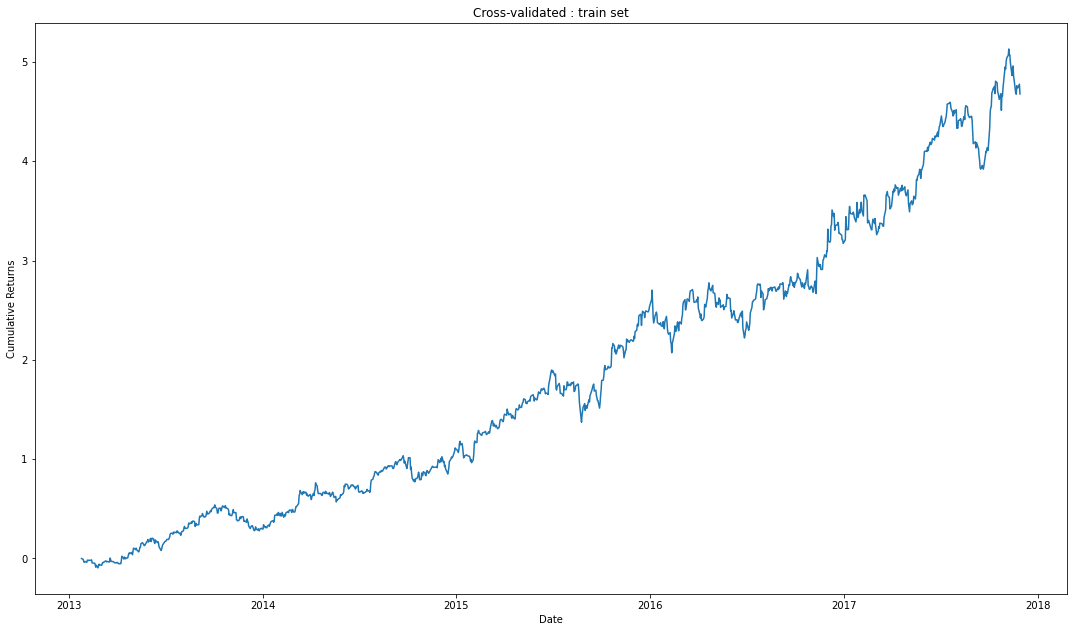

In [56]:
train_result(best_model,x_train)

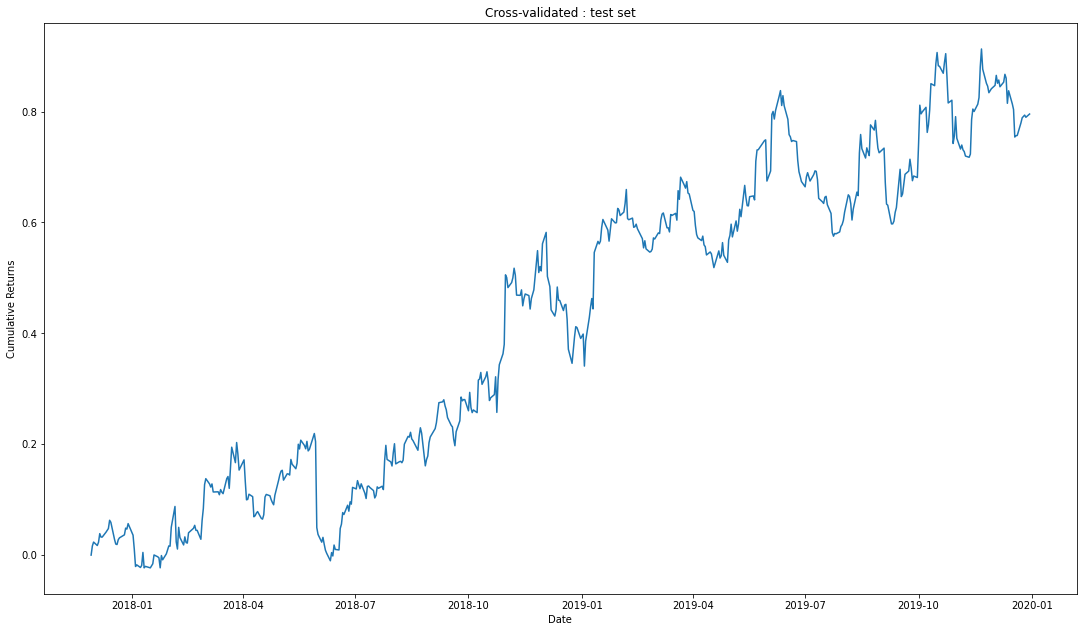

Out-of-sample: CAGR=0.325098 Sharpe ratio=1.14744 maxDD=-0.188271 maxDDD=85 Calmar ratio=1.72675  Rho=0.138104 PVal=0.00152972

mse: 0.00031
mae: 0.01231


In [57]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"lasso": MAE})
RETURNs.update({"lasso": round(final_return,5)})

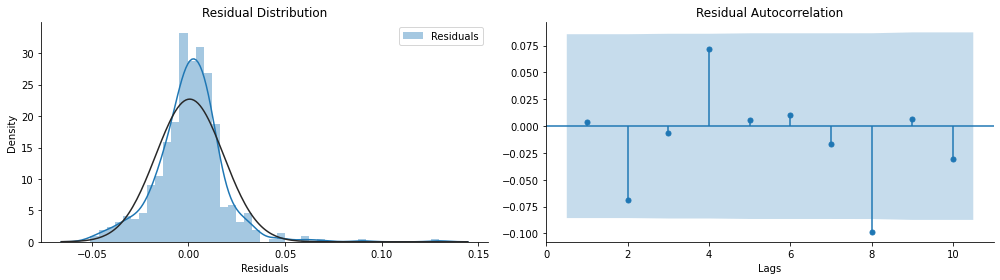

In [58]:
residuals = residual_plot()

In [59]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.33864291]


average return 0.010497
[-0.01092483  0.01211214]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.04300000000000004


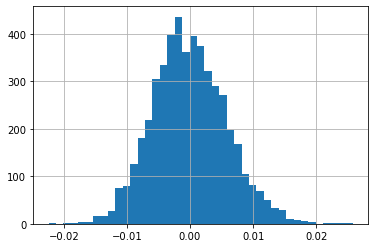

In [60]:
white_reality_check(close_price,test_position)

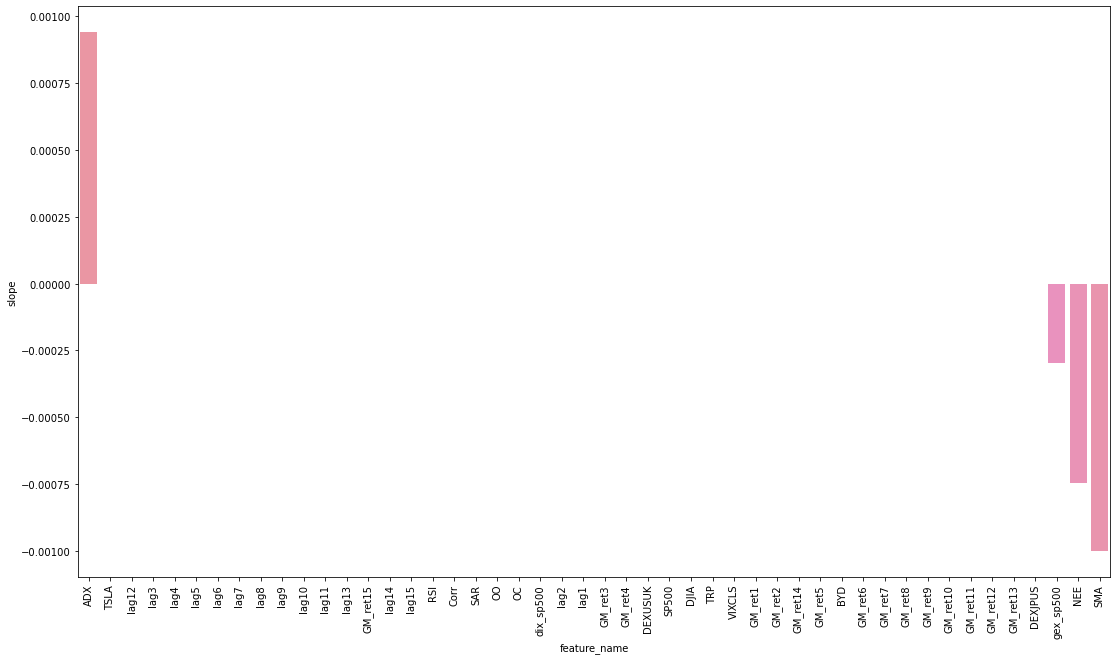

In [61]:
feature_importance(best_model,position = 2,mode = 1)

## Ridge regression

In [62]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
ridge = Ridge(max_iter=1000) 
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("ridge", ridge)])
a_rs = np.logspace(-7, 0, num=10, endpoint = True)#we can try different intervals
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'ridge__alpha': a_rs}]

In [63]:
myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

0.09750723357258523
0.4629863377570036
-0.02993683842086222
0.35161094843347374
0.032840973358625875
0.28905139822332504
0.08079735820582928
0.22011568969806514
0.03431927367773768
0.20991100240550395
0.08196420297529575
0.4530929657122658
-0.049533711757744625
0.3393419749872171
0.02244507347743856
0.27941373404397407
0.11932400136565381
0.2136320036390454
0.012896266107793921
0.2057904618762051
0.0698267242596828
0.5354494195005267
0.03010180734215213
0.3753066541787706
0.024937536019671615
0.30585037267960263
0.06096381878118268
0.25012430910953987
0.004601915647808999
0.22406936602668107
0.06971483165362939
0.5345035983074056
0.03963844550506804
0.3749718273670181
0.022967952669751625
0.30793644661072367
0.049791852555293205
0.2522041068433451
0.006138278384343736
0.22401168510207506
0.045541725184323895
0.5092917666196501
0.02795864587774233
0.368449632593927
0.03193794880015928
0.30857777790360774
0.07184744843652723
0.2512402911088331
0.016036413661738403
0.22366656640093702
0.0

In-sample: CAGR=0.836408 Sharpe ratio=2.69513 maxDD=-0.132071 maxDDD=168 Calmar ratio=6.33303

mse: 0.00022
mae: 0.01106


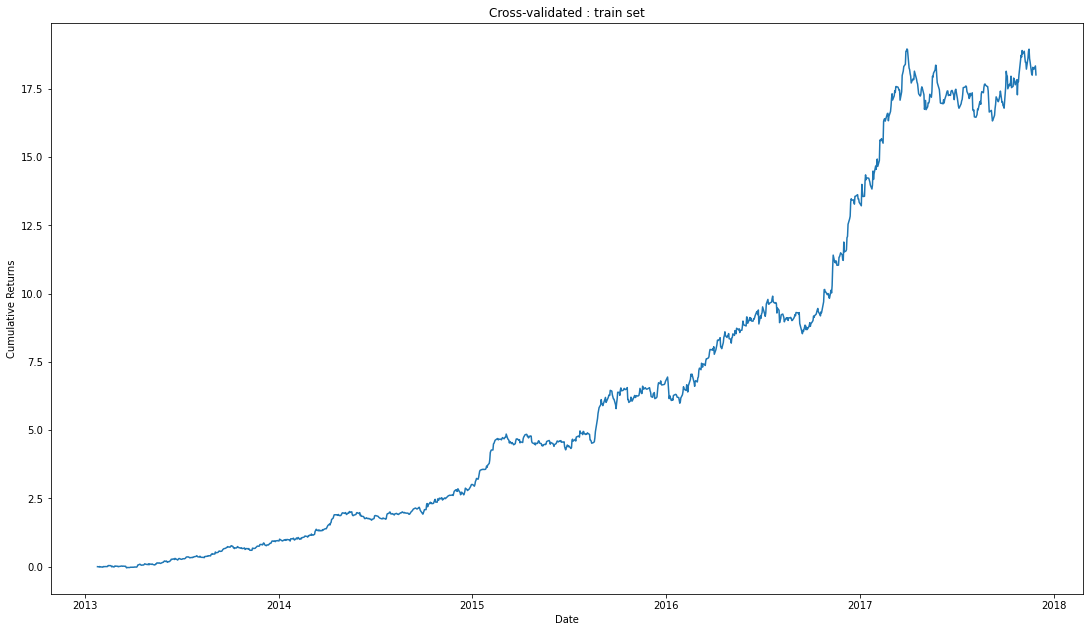

In [64]:
train_result(best_model, x_train)

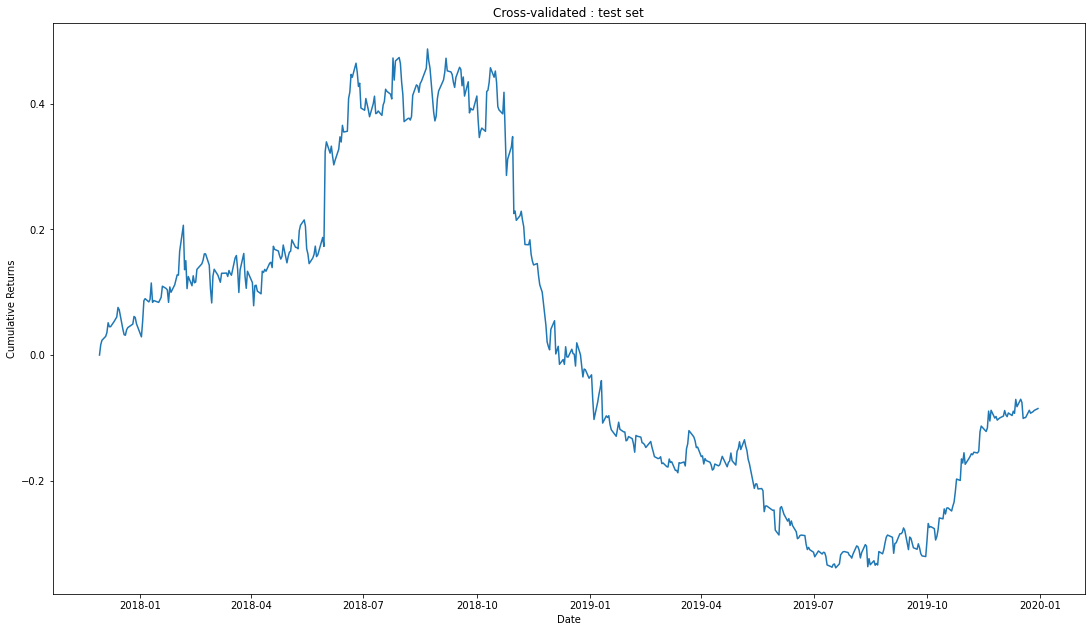

Out-of-sample: CAGR=-0.0419065 Sharpe ratio=-0.0126729 maxDD=-0.555523 maxDDD=340 Calmar ratio=-0.0754361  Rho=0.00838482 PVal=0.848148

mse: 0.00033
mae: 0.01272


In [65]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"ridge": MAE})
RETURNs.update({"ridge": round(final_return,5)})

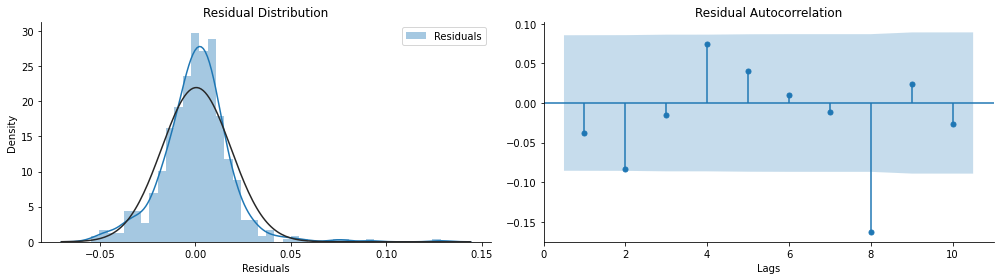

In [66]:
residuals = residual_plot()

In [67]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.00970567]


average return -0.006026
[-0.01252179  0.01083678]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.8492


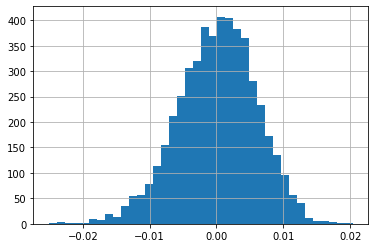

In [68]:
white_reality_check(close_price,test_position)

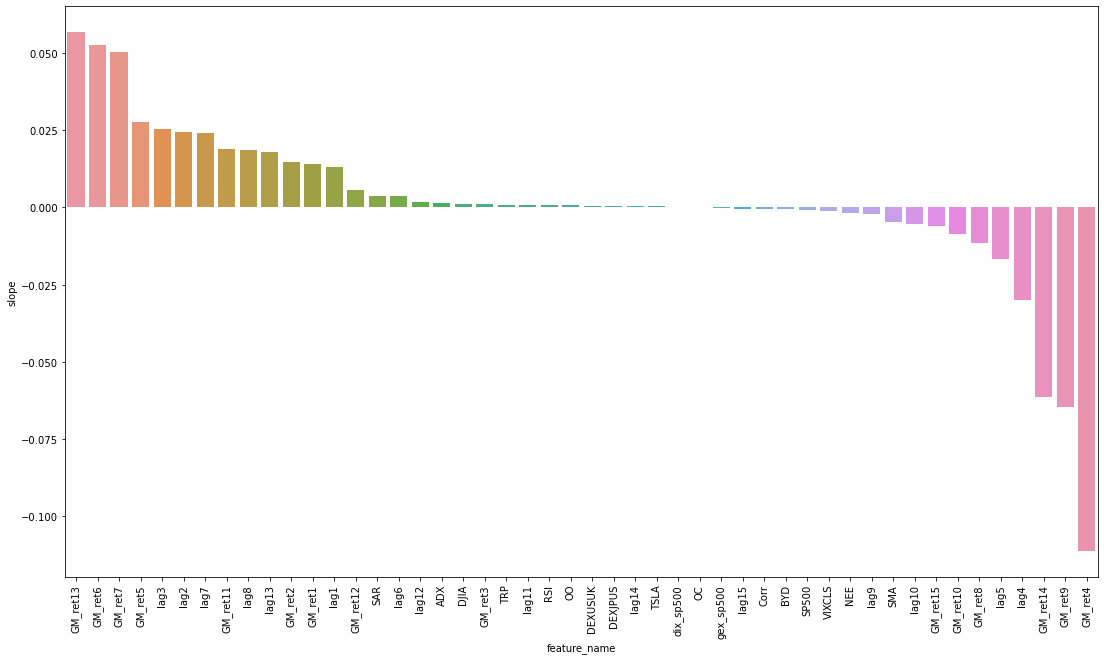

In [69]:
feature_importance(best_model,position = 2,mode = 1)

## Ridge regression(with pca)

In [70]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
ridge = Ridge(max_iter=1000) 
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("ridge", ridge)])
a_rs = np.logspace(-7, 0, num=10, endpoint = True)#we can try different intervals
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'ridge__alpha': a_rs, 'pca__n_components':ncomponents_rs}]


myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.030787680911769907
0.38684155435897966
0.026063655051446918
0.2501282567345613
0.023234771681466933
0.18474173360332713
0.11650088509285587
0.15177127977304766
0.054043818614574884
0.16165603492876043
-0.03545847995420411
0.4196007371639778
-0.03933576339731002
0.283671273385587
0.04000850664913952
0.20122652090363202
0.02019933955145732
0.1770350693143347
0.021395751835121952
0.1731876586094246
-0.03321775879195527
0.3938205891134471
-0.016531320425608138
0.2619345412707062
0.02423534297539934
0.18710712863262233
0.10034256105993099
0.1654431232866366
0.030200788694926074
0.16691754532305234
0.06179053991210405
0.33423659943648826
-0.038100648256174256
0.2595995232796837
-0.005103989482167027
0.1903671050367841
0.11225473460124917
0.1509343597749681
0.016889948515368812
0.14766270631746475
-0.0488898962423833
0.4189953566905868
-0.03462482481021378
0.2756170135519098
0.04754255745305779
0.19920981262804113
0.007313133515611777
0.17657588829724502
0.02093240434315116
0.1728182663738

In-sample: CAGR=0.595306 Sharpe ratio=2.08733 maxDD=-0.171069 maxDDD=108 Calmar ratio=3.47992

mse: 0.00022
mae: 0.01116


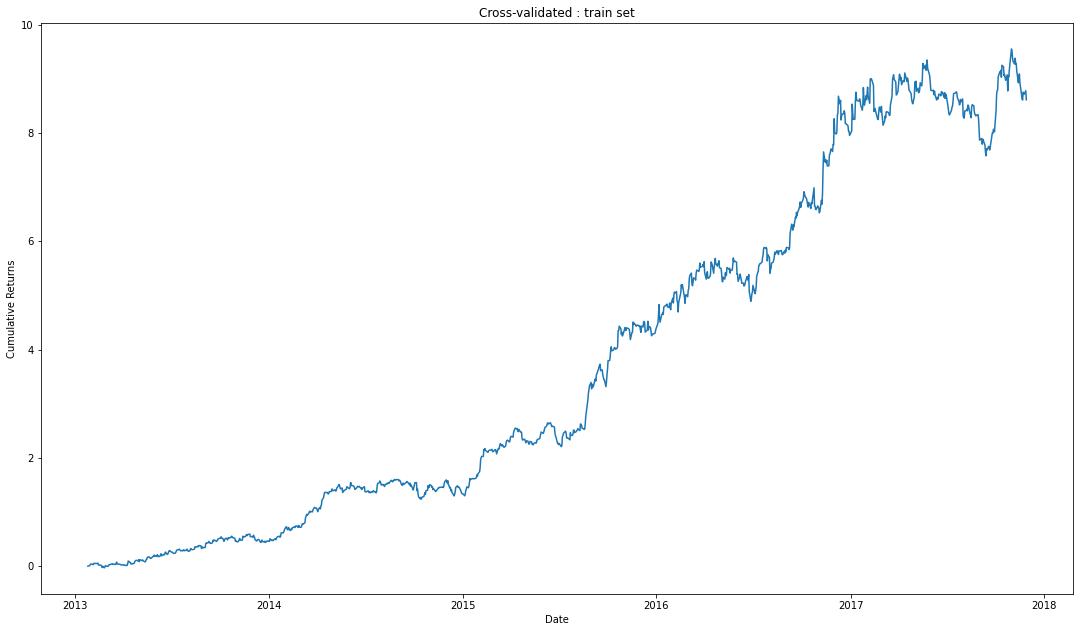

In [71]:
train_result(best_model,x_train)

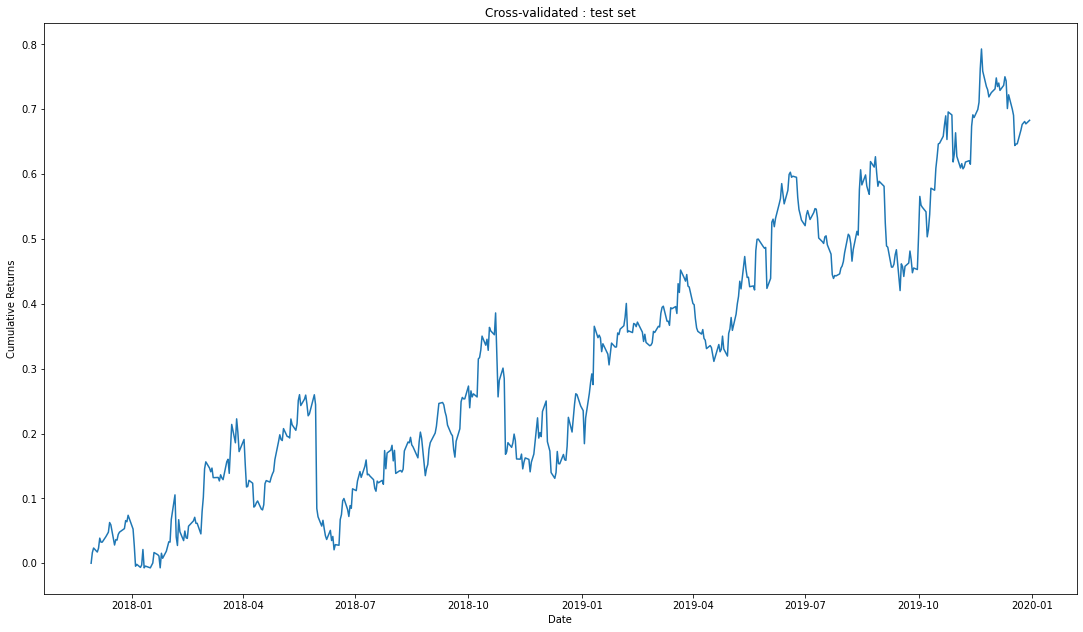

Out-of-sample: CAGR=0.284474 Sharpe ratio=1.03658 maxDD=-0.189849 maxDDD=93 Calmar ratio=1.49843  Rho=0.0650231 PVal=0.137156

mse: 0.00031
mae: 0.01239


In [72]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"ridge_pca": MAE})
RETURNs.update({"ridge_pca": round(final_return,5)})

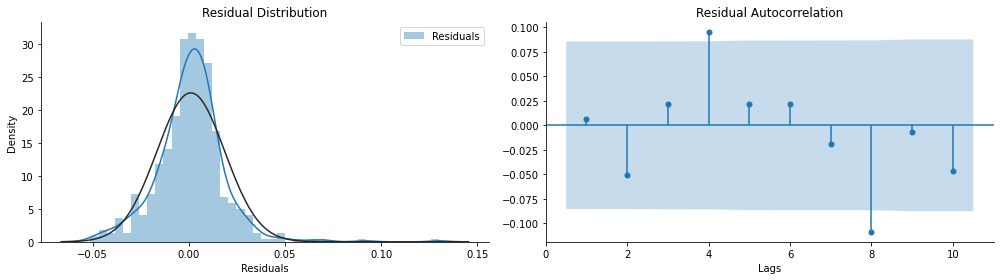

In [73]:
residuals = residual_plot()

In [74]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.14572106]


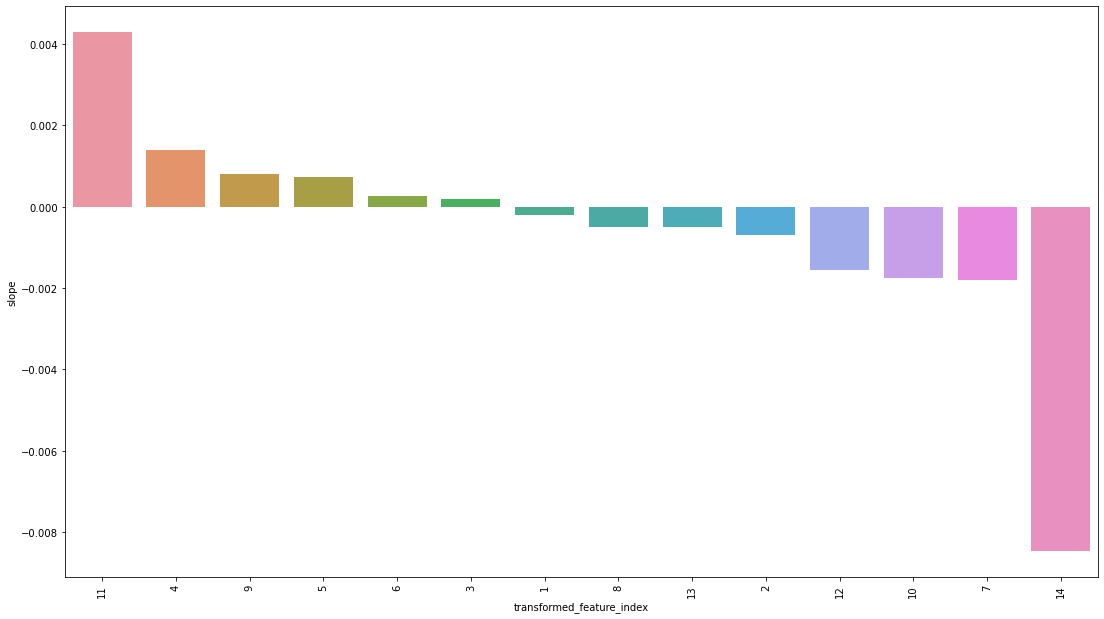

In [75]:
feature_importance_pca(best_model,position = 3)

average return 0.003302
[-0.01263547  0.01087599]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.29979999999999996


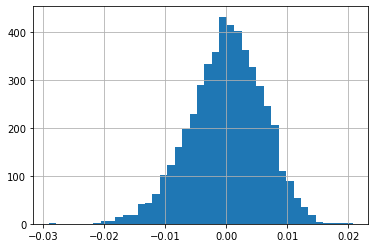

In [76]:
white_reality_check(close_price,test_position)

## linear SVR

In [77]:
myscorer = make_scorer(information_coefficient, greater_is_better=True)
#myscorer = make_scorer(sharpe, greater_is_better=True)
split = TimeSeriesSplit(n_splits = 5)
#must scale since svm is very sensitive. 
scaler = StandardScaler(with_mean=True, with_std=True) 

# we do not use select scaler since we do not have dummy variables.
#custom_scaler = FunctionTransformer(select_scaler)

svr = LinearSVR()

pipe = Pipeline([("scaler", scaler), ("svr", svr)])

c_rs = np.linspace(0.001, 1, num=8, endpoint=True) #1 default
s = np.std(y_train.values)
epsilon_rs = [0, s*.25, s*.5, s*.75, s] #depends on scale of y

#set of parameters for random search
param_grid = {'svr__C': c_rs,
              'svr__epsilon': epsilon_rs}

grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

0.09024569034383771
0.3508248480543058
-0.07788111048478752
0.2152276918787348
0.010533612919491987
0.09383181221000357
0.01524884450195237
0.06827667825890356
-0.005692145040681455
0.10855202514844937
0.09704244890128651
0.2738015079602041
-0.07453582766349992
0.13192544710083465
0.1114622076332544
0.12028022991921275
0.04555430912549384
0.09264124708287903
-0.01583845095619051
0.03860768780941372
0.13676145500906237
0.291461870296204
-0.054066770812319566
0.1861098614301802
0.09871371001436222
0.08691330790315127
0.04909468054890103
0.05314525114543247
0.015568762632690481
0.031196252043443284
0.003814390249948569
0.3155082416168189
-0.0445516503347893
0.2573800898192767
-0.03507665846485333
0.1097009465978301
0.21303195228244937
0.0658414084263245
-0.013900424759123814
0.07970746796615884
-0.010255387700971163
0.3107420715405972
-0.07476821866566484
0.17298952635781206
-0.08481258295507621
0.19745483536741076
0.12455135690329394
0.16538893573703242
-0.09060523510949632
0.07491371790

In-sample: CAGR=0.419757 Sharpe ratio=1.59053 maxDD=-0.2702 maxDDD=230 Calmar ratio=1.55351

mse: 0.00027
mae: 0.01272


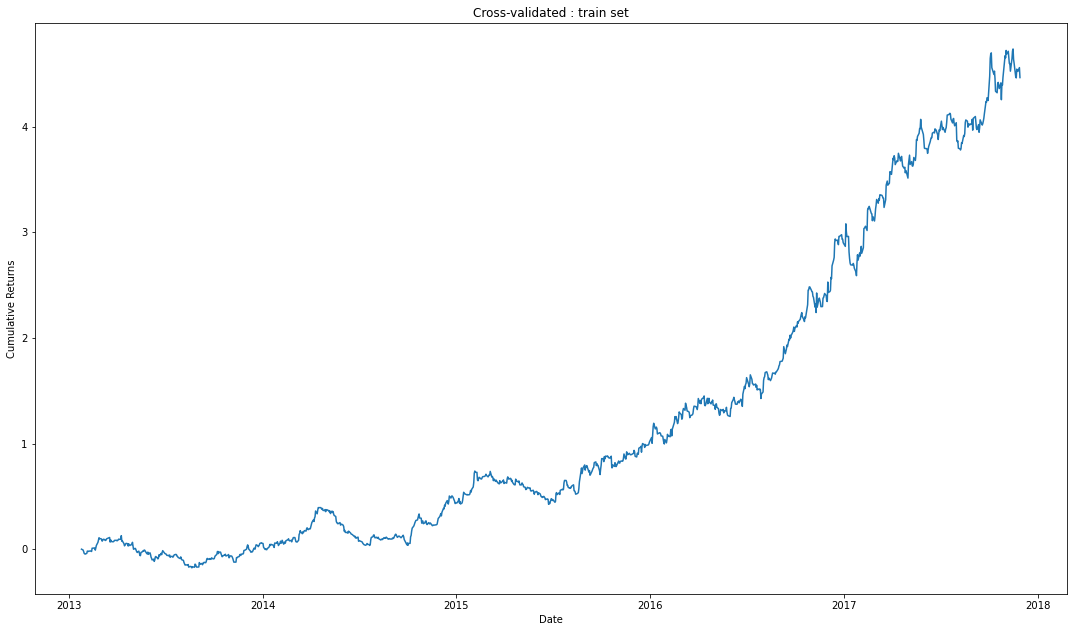

In [78]:
train_result(best_model,x_train)

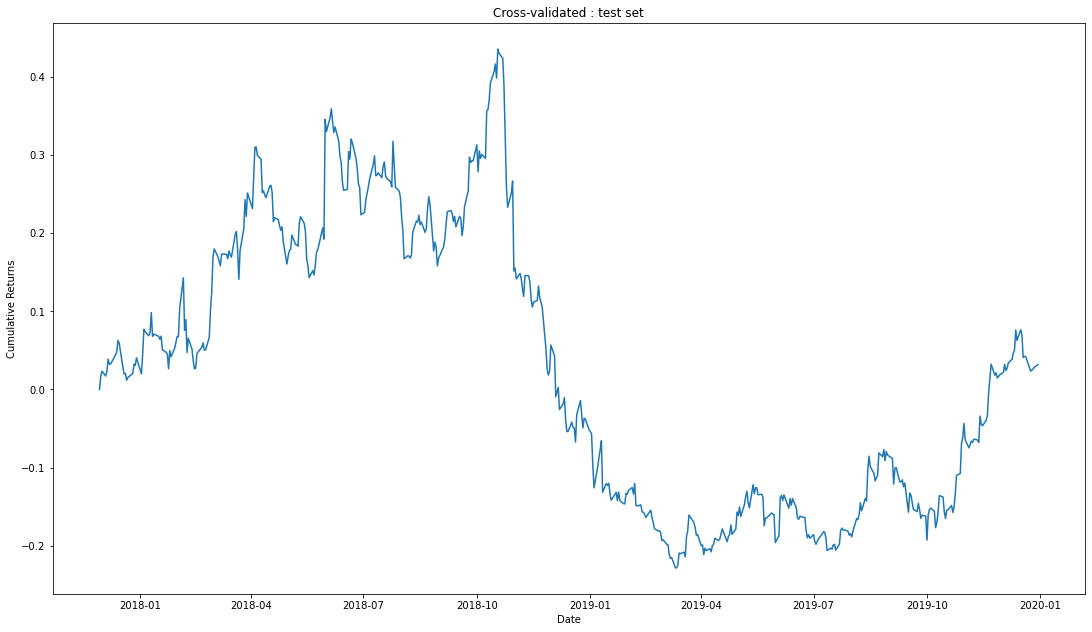

Out-of-sample: CAGR=0.0151833 Sharpe ratio=0.193613 maxDD=-0.462668 maxDDD=300 Calmar ratio=0.0328167  Rho=-0.0139898 PVal=0.749353

mse: 0.00042
mae: 0.01478


In [79]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"linear_svr": MAE})
RETURNs.update({"linear_svr": round(final_return,5)})

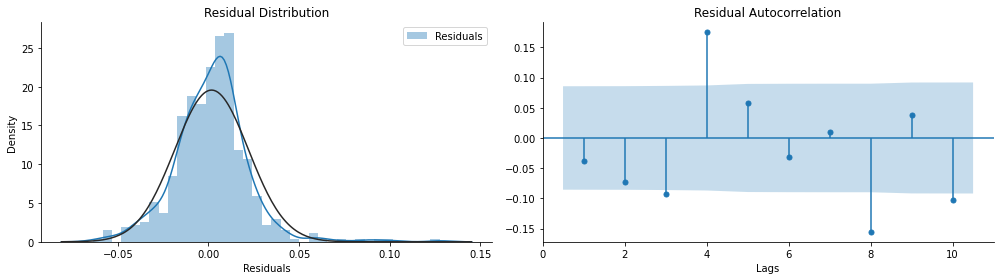

In [80]:
residuals = residual_plot()

In [81]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [1.36312036e-06]


average return -0.003908
[-0.01260684  0.01090162]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.7445999999999999


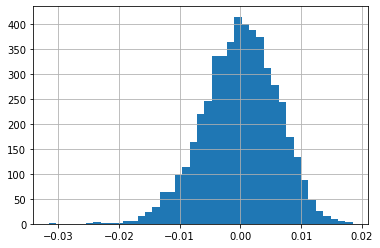

In [82]:
white_reality_check(close_price,test_position)

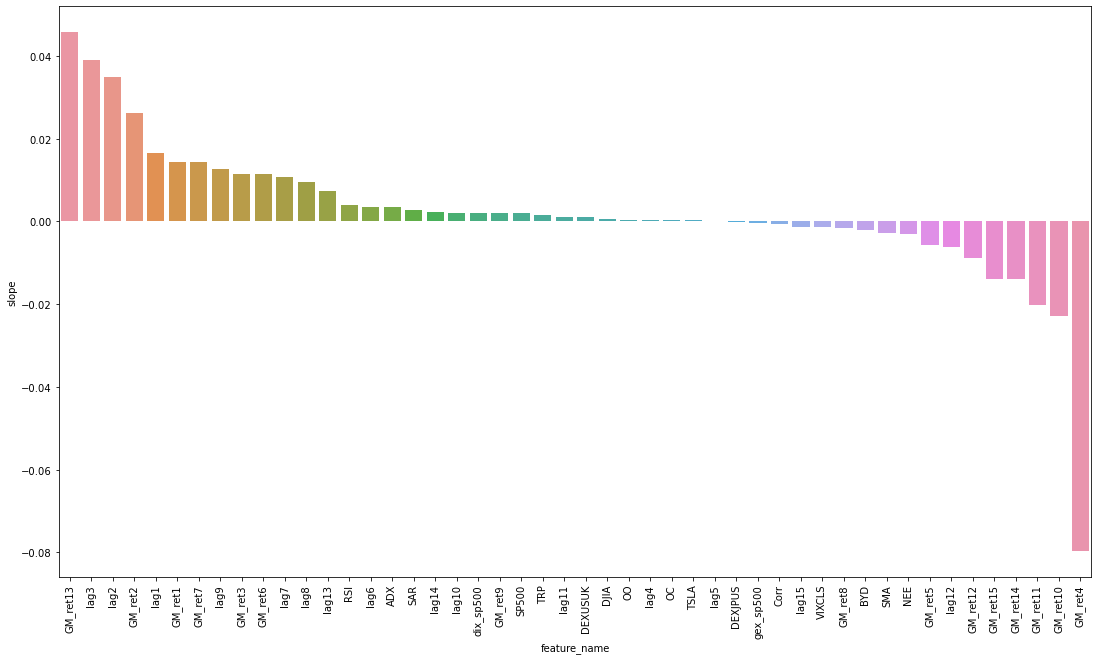

In [83]:
feature_importance(best_model,position = 1)

## nu SVR

In [84]:
# we need scaling because svm is very sensitive. 
# we do not have any dummies so we do not need to apply a select scaler here.
scaler = StandardScaler(with_mean=True, with_std=True)
split = TimeSeriesSplit(n_splits = 5)
#custom_scaler = FunctionTransformer(select_scaler)

svr = NuSVR()

pipe = Pipeline([("scaler", scaler), ("svr", svr)])


c_rs = np.linspace(0.001, 5, num=5, endpoint=True) 
gamma_rs = ["scale","auto"]
kernel_rs = ['linear', 'poly', 'rbf', 'sigmoid']
nu_rs = np.linspace(0.1, 1, num=10, endpoint=True)


#set of parameters for random search
param_grid = {'svr__kernel': kernel_rs,
               'svr__C': c_rs,
               'svr__gamma': gamma_rs,
               'svr__nu': nu_rs}

grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))

0.036491334779312413
0.9994714932375157
-0.02384876796908498
0.9995629185887096
0.03570497420211841
0.9995945119365227
-0.08528880995894433
0.9996322085190742
0.050588078341641
0.9996398553670117
-0.09088835556834954
0.19045942337853095
0.07532480946097342
0.06729492734751875
0.010829122147520768
-0.07708744030370168
-0.034875814443223525
0.048585660898180894
-0.03496623875166595
0.04186020492744581
0.09377461099629109
0.4448784606039391
-0.06826844316684236
0.3213453407947102
0.09216014735295691
0.26550207227948763
0.10034399557023219
0.22685253546674106
0.026446669851311316
0.22178805190325254
0.05402117639434496
0.2179568752209261
-0.09158357253836344
0.20536249080286528
-0.033173779867862165
0.0882018600257097
0.17398458188328253
0.06387655834581125
0.014653543747621236
0.08412198670418228
0.03673376875909477
0.9992751907257359
-0.024720951483382943
0.9994252344361556
0.03638349781793208
0.9993229388511926
-0.08589704232666096
0.9994018698698875
0.0495064560229228
0.999395766437585

In-sample: CAGR=15.4289 Sharpe ratio=17.6619 maxDD=-0.000300081 maxDDD=1 Calmar ratio=51416.0

mse: 0.0
mae: 0.00021


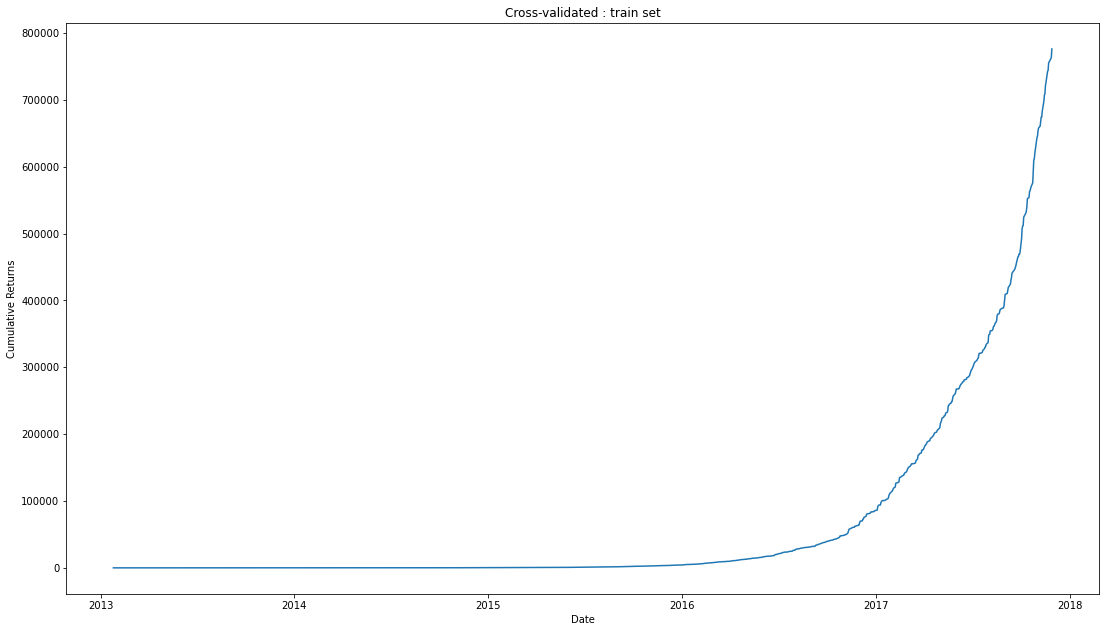

In [85]:
train_result(best_model,x_train)

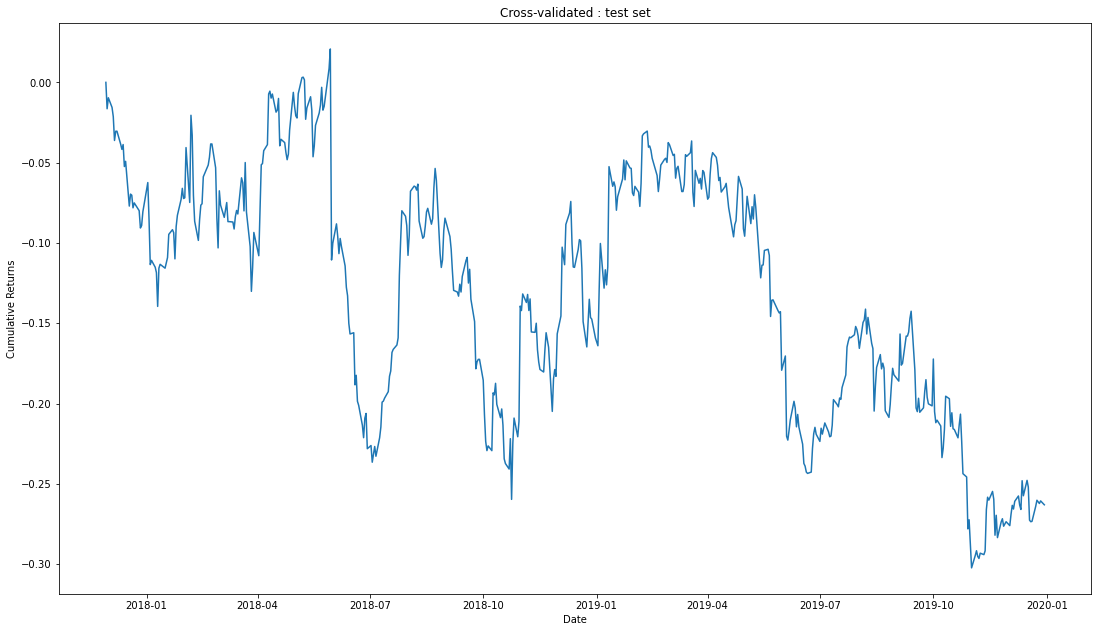

Out-of-sample: CAGR=-0.13653 Sharpe ratio=-0.38232 maxDD=-0.316541 maxDDD=399 Calmar ratio=-0.431318  Rho=-0.0118068 PVal=0.787442

mse: 0.00196
mae: 0.02874


In [86]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"nu_svr": MAE})
RETURNs.update({"nu_svr": round(final_return,5)})

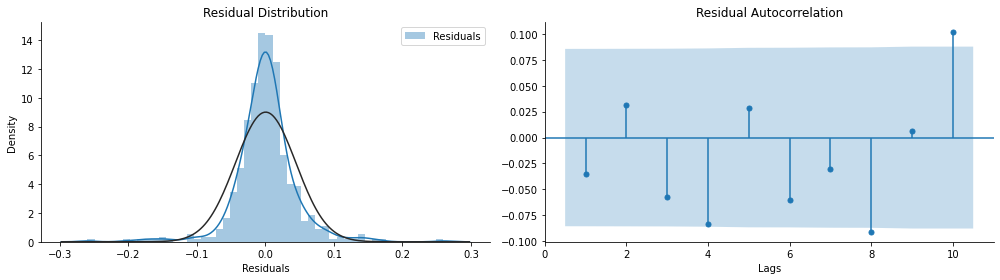

In [87]:
residuals = residual_plot()

In [88]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.03501141]


average return 0.000906
[-0.01120258  0.01203372]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.4252


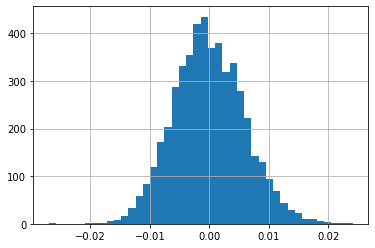

In [89]:
white_reality_check(close_price,test_position)

## Random Forest

In [90]:
#myscorer = None #is mse
myscorer = make_scorer(information_coefficient, greater_is_better=True)
# we use a wavelet smoother for random forest
smoother = FunctionTransformer(wavelet_smoother)
#smoother = FunctionTransformer(ewm_smoother)
split = TimeSeriesSplit(n_splits = 5)
pca = PCA()
scaler = StandardScaler(with_mean=True, with_std=True)

rforest = RandomForestRegressor()
#('smoother', smoother),
pipe = Pipeline([("scaler", scaler),('pca', pca), ('rforest', rforest)])

nestimators_rs = [200, 300, 500]
ncomponents_rs =   list(range(3,x_test.shape[1]))
#scales_rs = [{'scale': .5},{'scale': .1}]
#'smoother__kw_args': scales_rs,
param_grid =  [{ 'pca__n_components':ncomponents_rs,\
                'rforest__n_estimators': nestimators_rs}]

grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True, n_jobs = -1)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True, n_jobs = -1)

#grid_search.fit(x_train.values, y_train.values.ravel())
grid_search.fit(x_train, y_train.values.ravel())


best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

Best parameters scaling grid: {'rforest__n_estimators': 500, 'pca__n_components': 18}
Best cross-validation score scaling grid: 5.15


In-sample: CAGR=14.7405 Sharpe ratio=17.0797 maxDD=-0.0107493 maxDDD=3 Calmar ratio=1371.29

mse: 3e-05
mae: 0.00438


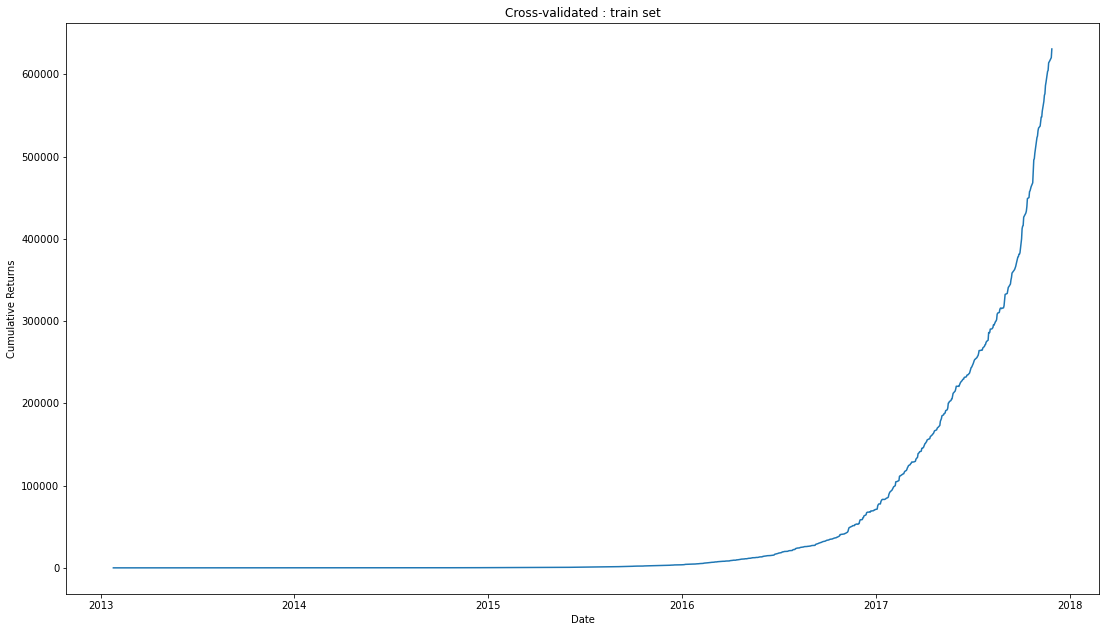

In [91]:
train_result(best_model,x_train)

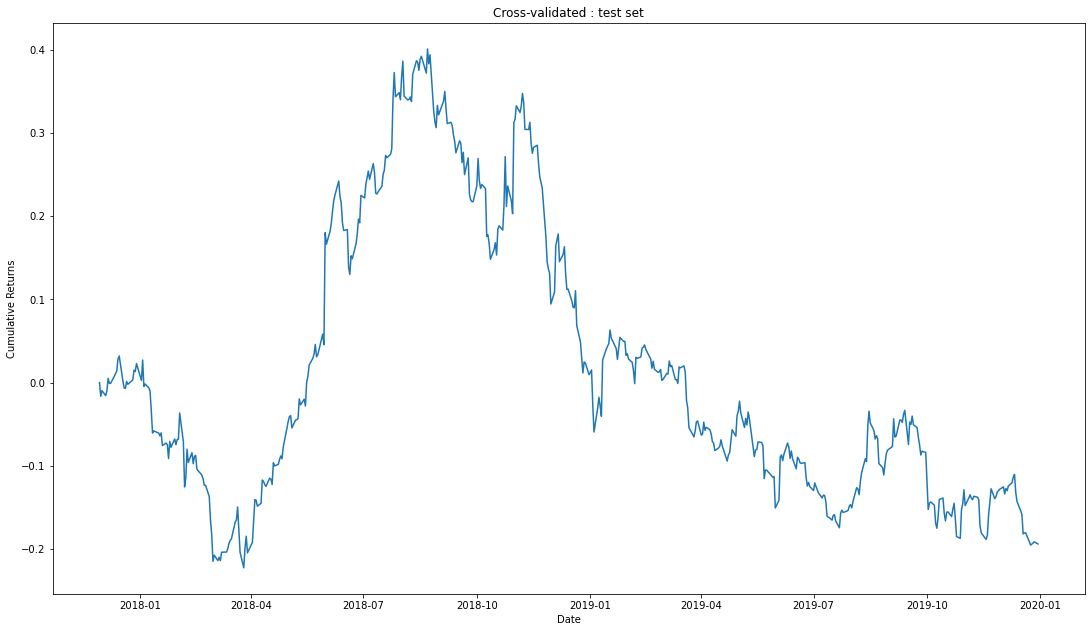

Out-of-sample: CAGR=-0.0983947 Sharpe ratio=-0.230505 maxDD=-0.425358 maxDDD=340 Calmar ratio=-0.231322  Rho=-0.0332067 PVal=0.448133

mse: 0.00034
mae: 0.01298


In [92]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"random_forest": MAE})
RETURNs.update({"random_forest": round(final_return,5)})

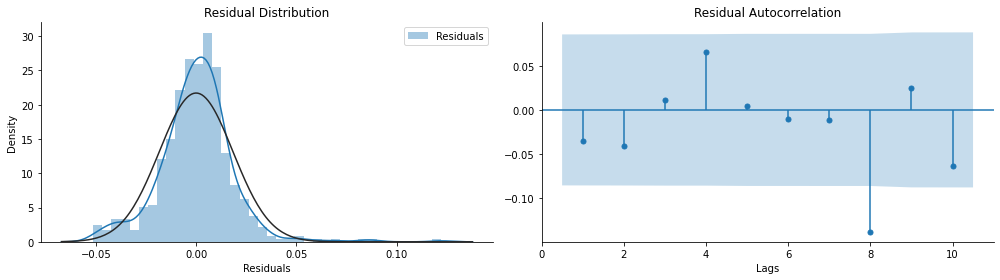

In [93]:
residuals = residual_plot()

In [94]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.08101758]


average return -0.002988
[-0.01222637  0.011409  ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.7038


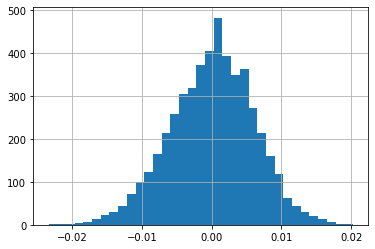

In [95]:
white_reality_check(close_price,test_position)

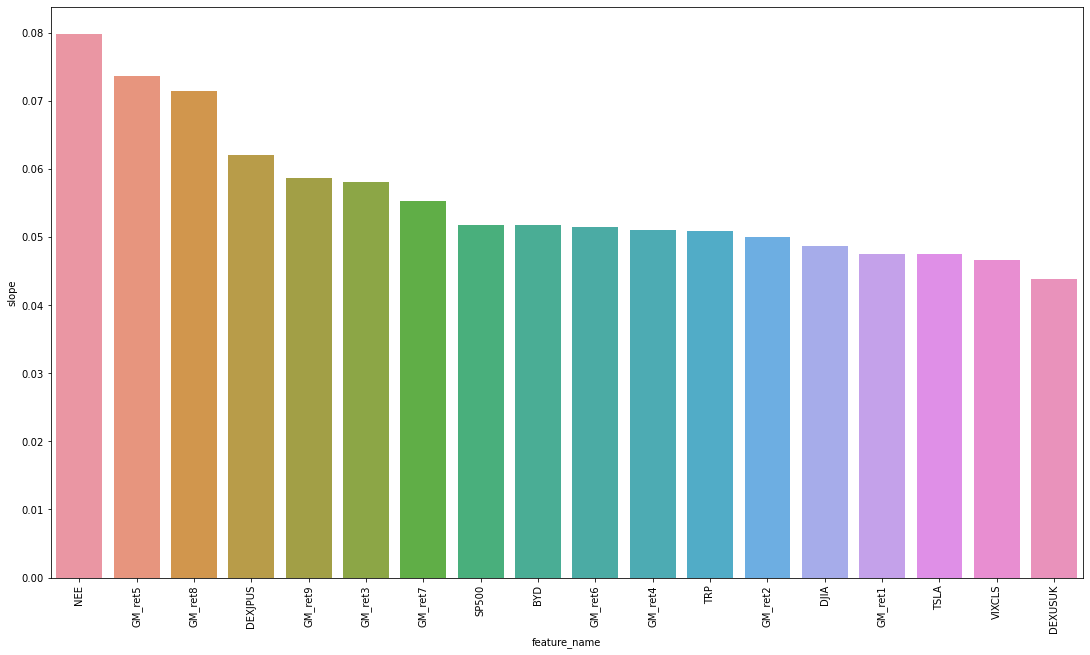

In [96]:
feature_importance(best_model,position = 2,mode = 2)

## kmeans

In [97]:
# we need a scoring function that is for clustering/unsupervised
myscorer = make_scorer(silhouette_score, greater_is_better = True)

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
kmeans = KMeans(max_iter = 400)
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("kmeans", kmeans)])
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} 
           ,{'span': 30},{'span': 35},{'span': 40},{'span': 45}]
ncluster_rs = [i for i in range(7,x_test.shape[1])]
param_grid =  [{'smoother__kw_args':  spans_rs, 'kmeans__n_clusters': ncluster_rs, 'pca__n_components':ncomponents_rs}]


#myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.reshape(-1,1))

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

Best parameters scaling grid: {'smoother__kw_args': {'span': 40}, 'pca__n_components': 15, 'kmeans__n_clusters': 12}
Best cross-validation score scaling grid: -23.50


In-sample: CAGR=0.0645907 Sharpe ratio=0.381169 maxDD=-0.48009 maxDDD=994 Calmar ratio=0.134539

mse: 42.78758
mae: 5.49042


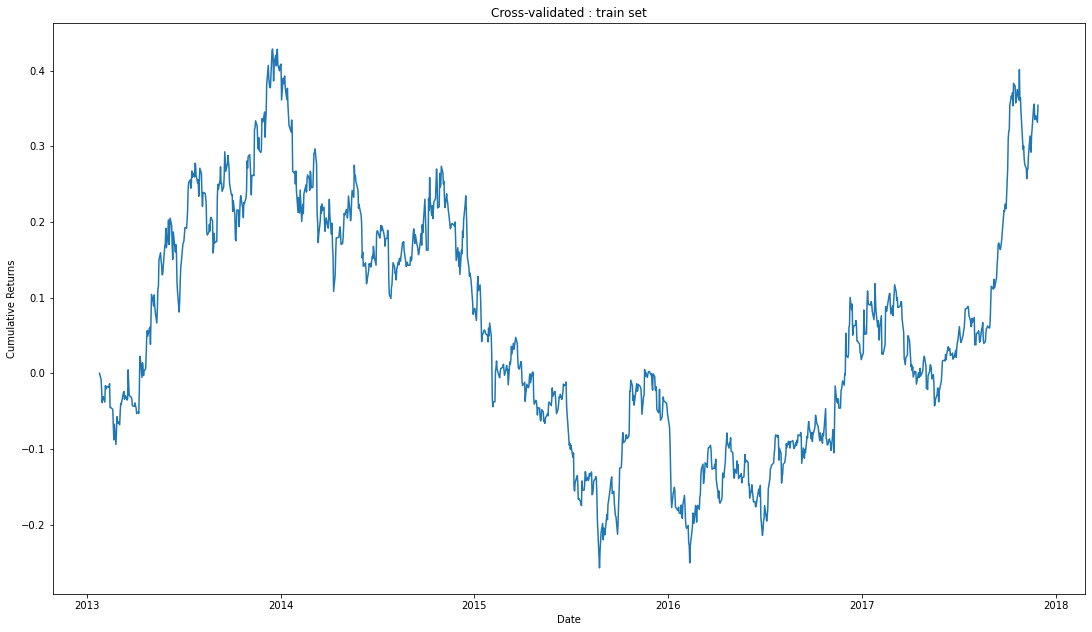

In [98]:
train_result(best_model,x_train)

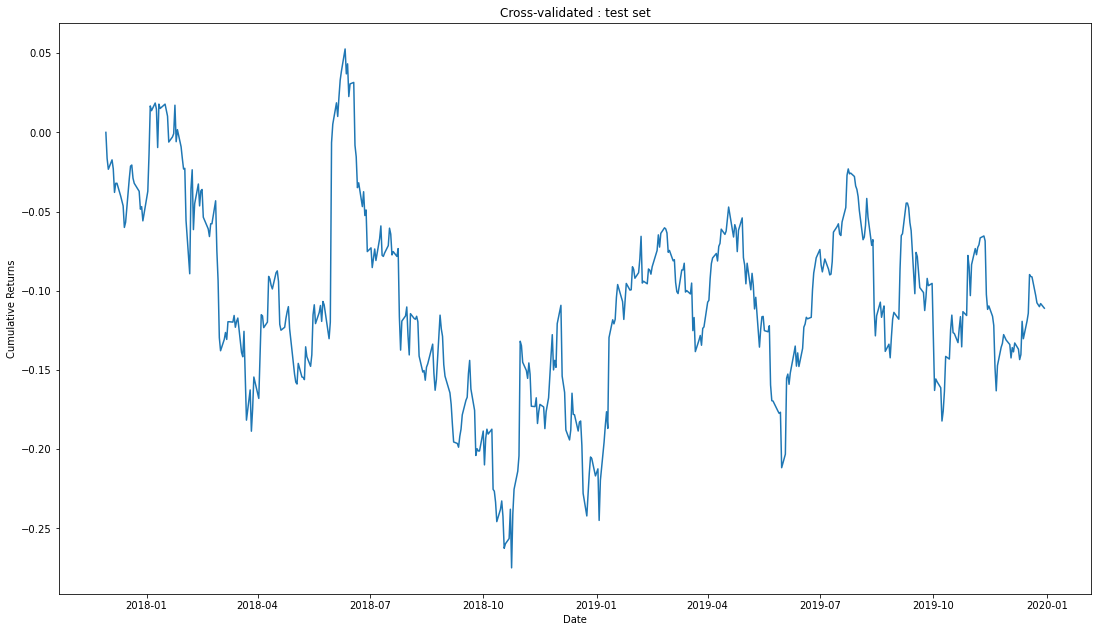

Out-of-sample: CAGR=-0.0550092 Sharpe ratio=-0.0629333 maxDD=-0.311201 maxDDD=391 Calmar ratio=-0.176764  Rho=0.0876703 PVal=0.044863

mse: 67.12627
mae: 7.63556


In [99]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"kmeans": MAE})
RETURNs.update({"kmeans": round(final_return,5)})

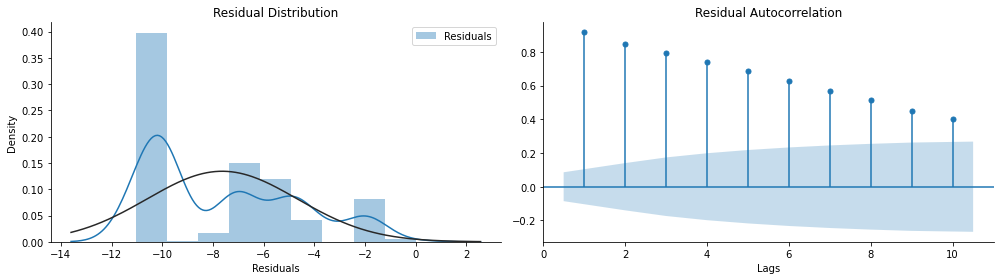

In [100]:
residuals = residual_plot()

In [101]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.]


average return 0.006602
[-0.01099427  0.01212257]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.12860000000000005


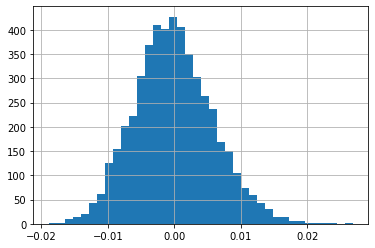

In [102]:
white_reality_check(close_price,test_position)

## KNN

In [103]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
scaler = StandardScaler(with_mean=True, with_std=True)
knn = KNN()
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("knn", knn)])
algorithm_rs = ['ball_tree', 'kd_tree', 'brute']
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} 
           ,{'span': 30},{'span': 35},{'span': 40},{'span': 45}]
n_neighbors_rs = [i for i in range(5,x_test.shape[1])]
param_grid =  [{'smoother__kw_args':  spans_rs, 'knn__n_neighbors': n_neighbors_rs, 'pca__n_components':ncomponents_rs \
                   ,'knn__algorithm': algorithm_rs}]


myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values,y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

0.0428183469059249
0.22334334469665038
0.06737451558358956
0.2091312567316421
0.09024685550719175
0.19027129782191388
0.02900287770135328
0.20874217597036007
-0.08334968113348606
0.20924371528189434
0.041437286393907535
0.14513682909902464
0.11290050717223735
0.19817922082921555
0.11676335321723191
0.17906102608521207
0.07448700081697336
0.15889741230582402
-0.0903924045276409
0.14264665344634786
0.039915548230675994
0.18341662858788638
0.14837931798768675
0.2205531607583279
0.08286490359760482
0.23329589764443484
-0.0034779739671983133
0.20970376848637287
-0.10191959959771034
0.18030542621701764
0.04938008101777784
0.129590949475311
0.1319877964976918
0.10842295235209358
0.06417043258491519
0.15878779474014162
0.04362826247536594
0.14934912701438163
-0.006456802649215827
0.15625265349733974
0.02035604976900123
0.2707565146708294
0.059931659147184645
0.2717542558944353
0.05683055877041342
0.24424410052710507
-0.052329718279346585
0.2653050629487882
-0.11228833017689953
0.24535420057074

In-sample: CAGR=0.6732 Sharpe ratio=2.29209 maxDD=-0.170113 maxDDD=100 Calmar ratio=3.95736

mse: 0.00022
mae: 0.01107


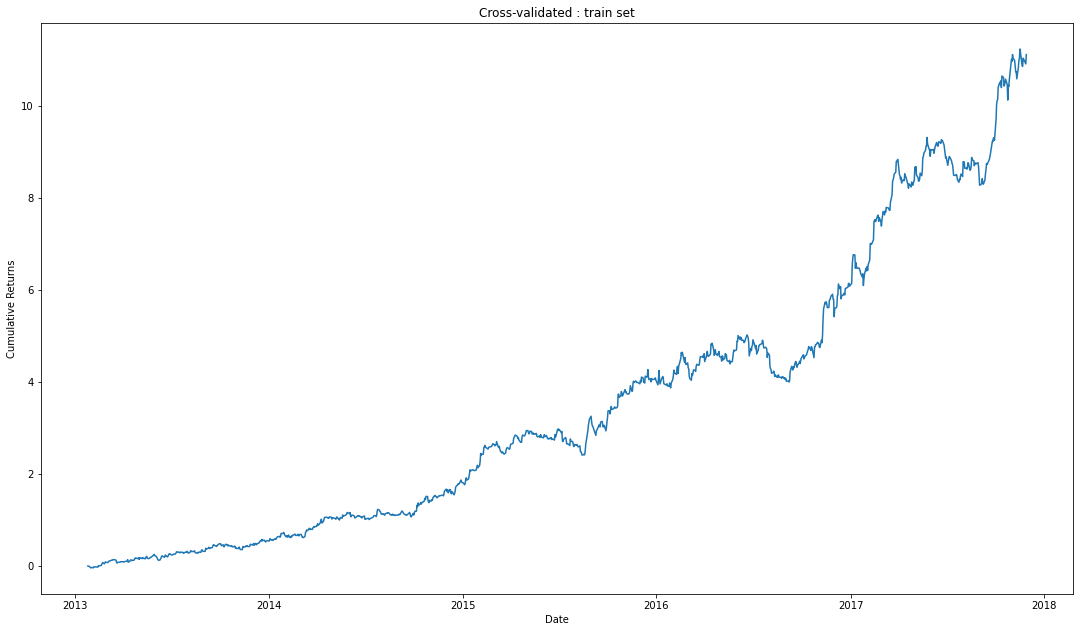

In [104]:
train_result(best_model,x_train)

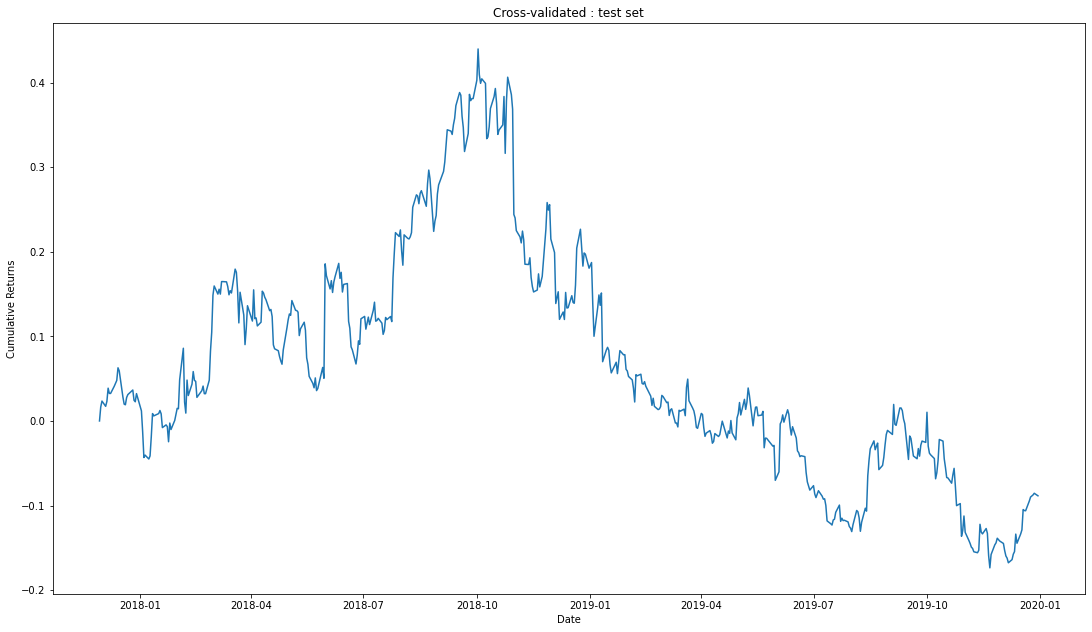

Out-of-sample: CAGR=-0.043568 Sharpe ratio=-0.0189881 maxDD=-0.42599 maxDDD=312 Calmar ratio=-0.102275  Rho=0.0353556 PVal=0.419294

mse: 0.00032
mae: 0.01249


In [105]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"knn": MAE})
RETURNs.update({"knn": round(final_return,5)})

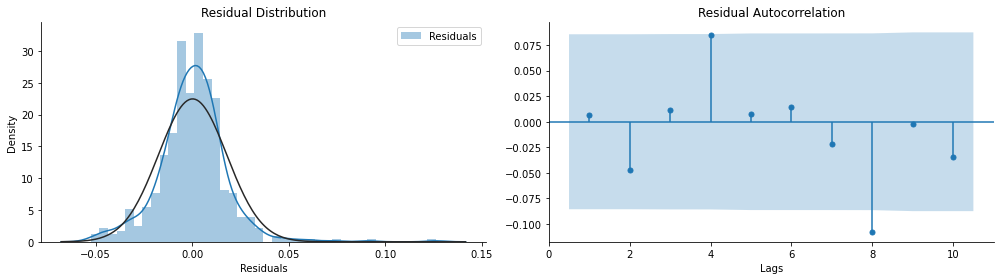

In [106]:
residuals = residual_plot()

In [107]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.264243]


average return 0.002488
[-0.01148985  0.01270286]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.33320000000000005


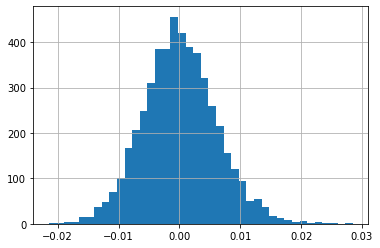

In [108]:
white_reality_check(close_price,test_position)

## MLP

In [109]:

myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
scaler = StandardScaler(with_mean=True, with_std=True)
pca = PCA()
mlp = MLPRegressor(early_stopping=True,max_iter=600)
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("mlp", mlp)])
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} 
           ,{'span': 30},{'span': 35},{'span': 40},{'span': 45}]
param_grid =  [{'smoother__kw_args':  spans_rs, 'pca__n_components':ncomponents_rs, \
                   'mlp__alpha': [0.0001,0.001],  \
               'mlp__hidden_layer_sizes': [(12,),(25,),(50,),(100,),(12,12),(25,25),(50,50),(100,100)], \
               'mlp__activation': ['identity', 'logistic', 'tanh', 'relu']}]


myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values,y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.11102472109619012
0.5002316506913487
0.11024657832950903
0.36264637710914055
0.05336810587550869
0.3631753283170286
0.00816523263453555
0.3595704242937067
0.0393615846197728
0.4054947444812897
0.012828917640199345
-0.06950138475635494
-0.06418725550536586
0.2359695902187279
0.05390461292057066
0.18703543333809522
-0.01687557918353412
0.14747718524336986
0.054518642205418015
0.1492150409307079
0.11105197698740825
0.05468397697906907
0.11747652061908428
0.9073036619603222
-0.09256611391379257
0.890574709900279
-0.06714368915883186
0.789420038880922
-0.07722553833670501
0.6719969729288674
-0.14874400550090905
-0.03953299220624118
0.008718966118261564
0.17960239973838146
0.0562643832123539
0.1802899505342821
0.17669724086288666
0.1173386221150698
0.07271256245515666
0.1583300716008721
0.029757695127842466
0.09933250282270657
0.05688415308547944
0.7271022923098743
-0.0047446445228407665
0.49955223814992566
-0.07109433052838754
0.6989668094611459
-0.04507955088291702
0.6216891514688476
0.

In-sample: CAGR=0.139947 Sharpe ratio=0.667112 maxDD=-0.286061 maxDDD=240 Calmar ratio=0.489221

mse: 0.00023
mae: 0.01133


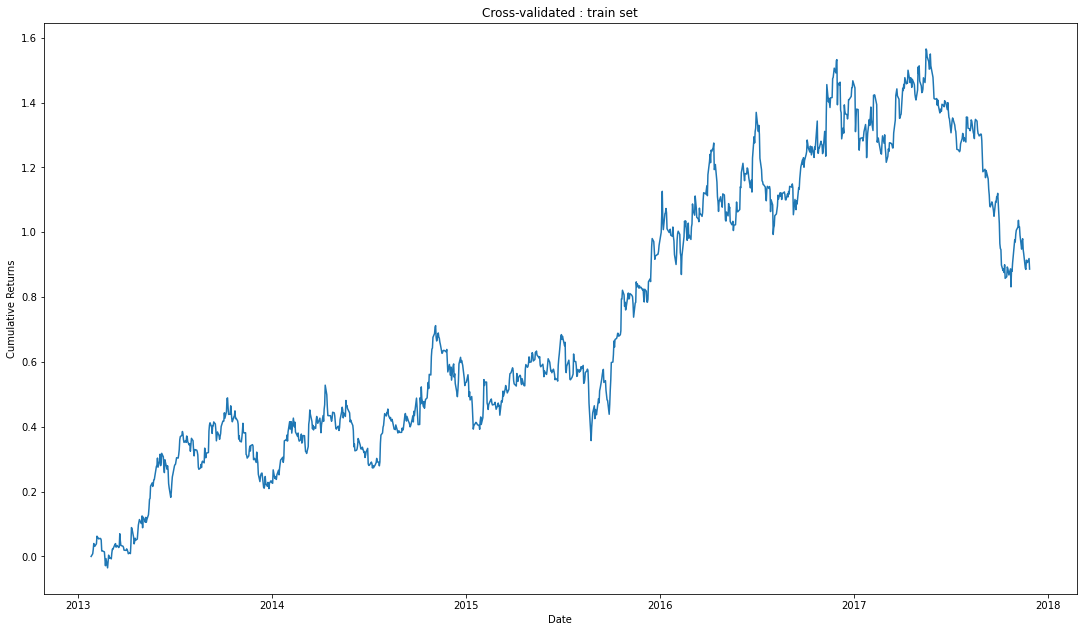

In [110]:
train_result(best_model,x_train)

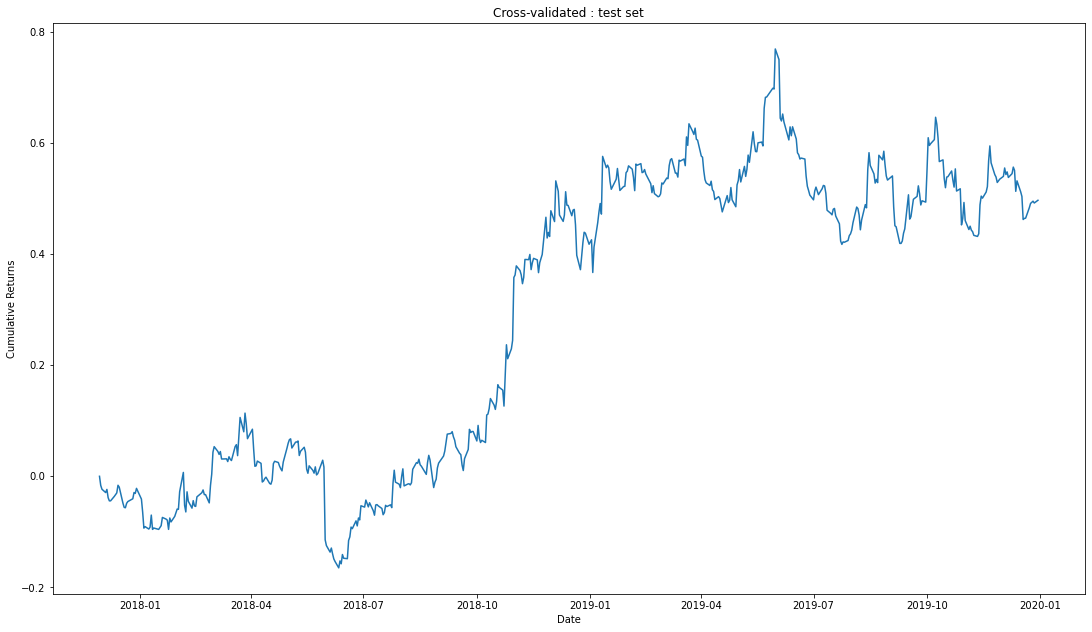

Out-of-sample: CAGR=0.214023 Sharpe ratio=0.833306 maxDD=-0.250043 maxDDD=147 Calmar ratio=0.855946  Rho=0.0624913 PVal=0.153156

mse: 0.00032
mae: 0.01284


In [111]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"mlp": MAE})
RETURNs.update({"mlp": round(final_return,5)})

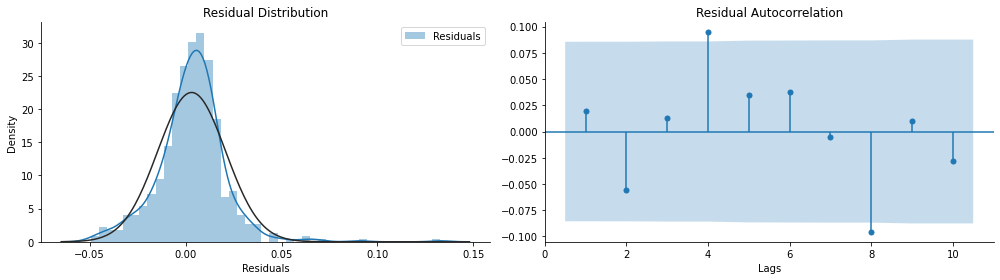

In [112]:
residuals = residual_plot()

In [113]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.2002135]


average return 0.008057
[-0.01063923  0.01219518]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.08879999999999999


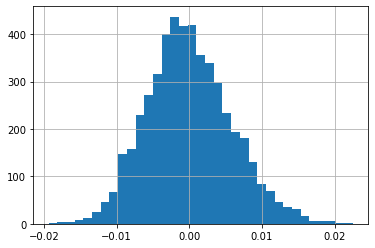

In [114]:
white_reality_check(close_price,test_position)

## XGBoost

In [115]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
xgboost = xgb.XGBRegressor(objective ='reg:squarederror')
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("xgboost", xgboost)])
lr_rs = [0.2,0.4,0.6,0.8,1,1.2]
n_estimators_rs = [100,200,300,400,500]
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'pca__n_components':ncomponents_rs,'xgboost__learning_rate': lr_rs\
               ,'xgboost__n_estimators':n_estimators_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.036924559997621724
0.9993891285472585
-0.14425456282533444
0.9992957937933722
0.010235951925239692
0.9990836666031924
0.005707916488548305
0.9989661860107363
-0.013721110714243479
0.9990040741662365
-0.04141174040448112
0.9993863830575832
0.040111834583552136
0.9995399419976465
-0.03443041134239234
0.9993860485098653
0.0372657086050535
0.9994993331965094
-0.07640356275497354
0.999330976347553
-0.068554304495973
0.9990006417582116
0.028936983306609456
0.9984795109322426
0.018154451627758524
0.9981988356600908
0.00921816319562991
0.996995384022471
-0.11526163353672234
0.9912117293223716
-0.008171029283078996
0.9994769842168661
-0.07878198424626634
0.9991623190926159
0.017232061173280334
0.9992327896747224
-0.016023480064610345
0.999007217368608
0.046889905480028915
0.9985837717768506
0.02923122607115532
0.9992875454292744
-0.08125221452853787
0.9992573825457168
0.04945619488116652
0.9993064481481797
0.1026879854024232
0.997631198294403
0.005666323818218686
0.9935055328276218
-0.040264

In-sample: CAGR=14.3704 Sharpe ratio=16.7694 maxDD=-0.00735293 maxDDD=2 Calmar ratio=1954.38

mse: 2e-05
mae: 0.00319


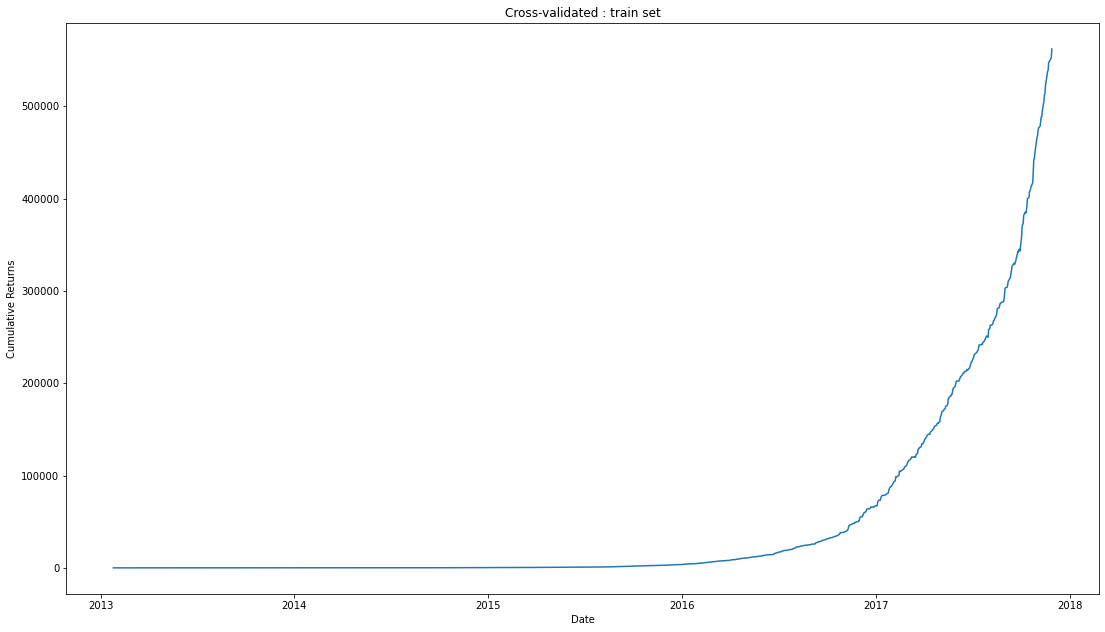

In [116]:
train_result(best_model,x_train)

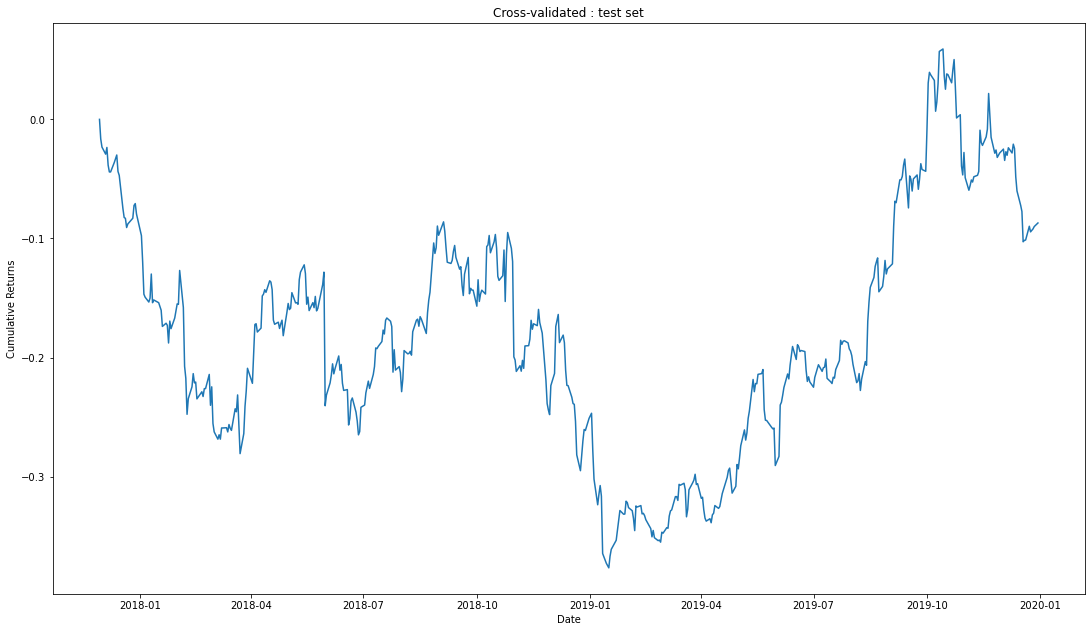

Out-of-sample: CAGR=-0.0428393 Sharpe ratio=-0.0138065 maxDD=-0.376659 maxDDD=461 Calmar ratio=-0.113735  Rho=0.0416574 PVal=0.341241

mse: 0.0004
mae: 0.01444


In [117]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"xgboost": MAE})
RETURNs.update({"xgboost": round(final_return,5)})

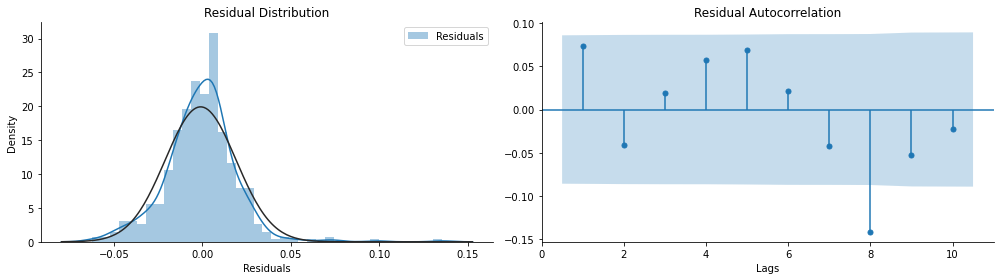

In [118]:
residuals = residual_plot()

In [119]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.01648384]


average return 0.001509
[-0.01124746  0.01215989]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.37839999999999996


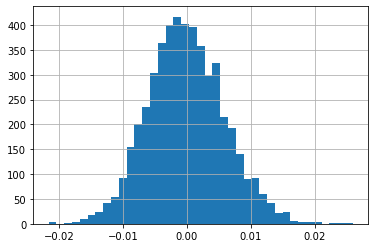

In [120]:
white_reality_check(close_price,test_position)

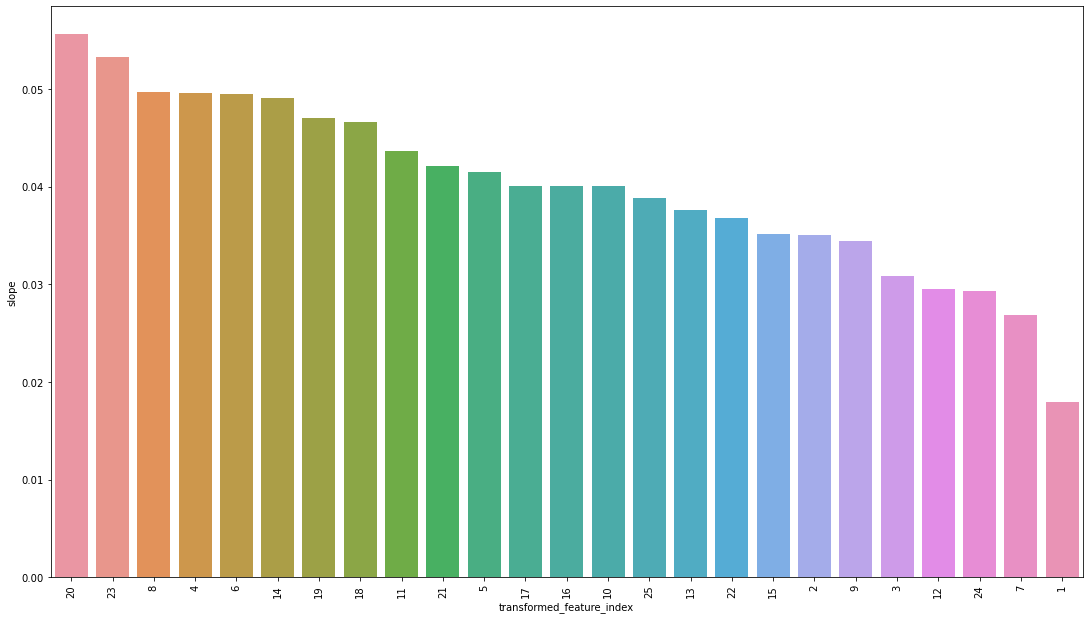

In [121]:
feature_importance_pca(best_model,position = 3,mode = 2)

## AdaBoost

In [122]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
adaboost = AdaBoostRegressor()
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("adaboost", adaboost)])
#pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("adaboost", adaboost)])
loss_rs = ['linear', 'square', 'exponential']
n_estimators_rs = [30,40,50]
lr_rs = [0.2,0.4,0.6,0.8,1,1.2]
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'adaboost__loss': loss_rs, 'pca__n_components':ncomponents_rs\
               ,'adaboost__n_estimators':n_estimators_rs, 'adaboost__learning_rate': lr_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.054394991307254004
0.6701255641058793
-0.04605070205463143
0.4847658747921281
0.058856938209548966
0.42106603882731664
0.1489040794045017
0.3450417815647065
0.07721426389014428
0.30471795756828923
0.021529746922363154
0.735589129877684
-0.10606272476424142
0.6389408340672843
0.010316689971416968
0.46693049764040373
0.16039830426928972
0.38889522613912764
0.01587463758294661
0.2976858537488423
-0.0802984948294095
0.7180855694945776
0.08621331569717877
0.5336979193388243
-0.03406520475985789
0.40819287393295656
-0.04392942407155893
0.37301822290126546
-0.13523905483295548
0.26746891258697797
0.0251673511993659
0.7079121349672558
0.0357972722977856
0.510289895119924
0.0829022161520095
0.3716078286181387
0.0844787064412444
0.3358160953922589
-0.06687853141557486
0.3360907453317207
0.07403983330147862
0.7728823371260897
0.005106091463860916
0.5434816349891088
-0.008852656412764018
0.4778165964823438
0.15861219159741693
0.3695717682654338
-0.07152857448568932
0.3410177790801263
-0.0651144

In-sample: CAGR=1.25074 Sharpe ratio=3.59489 maxDD=-0.15015 maxDDD=121 Calmar ratio=8.32997

mse: 0.0002
mae: 0.01084


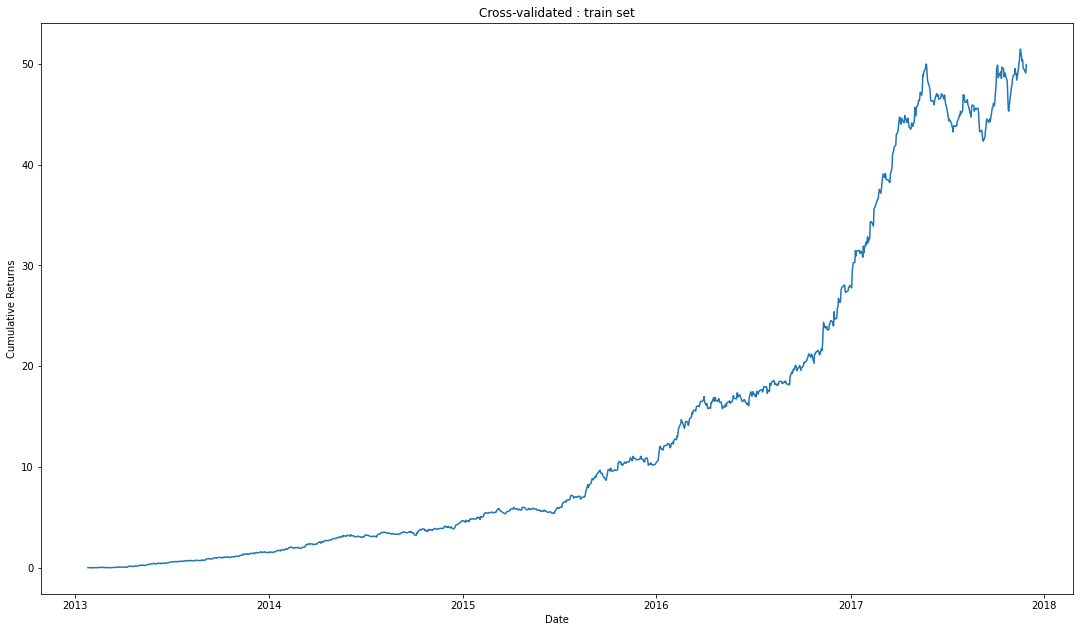

In [123]:
train_result(best_model,x_train)

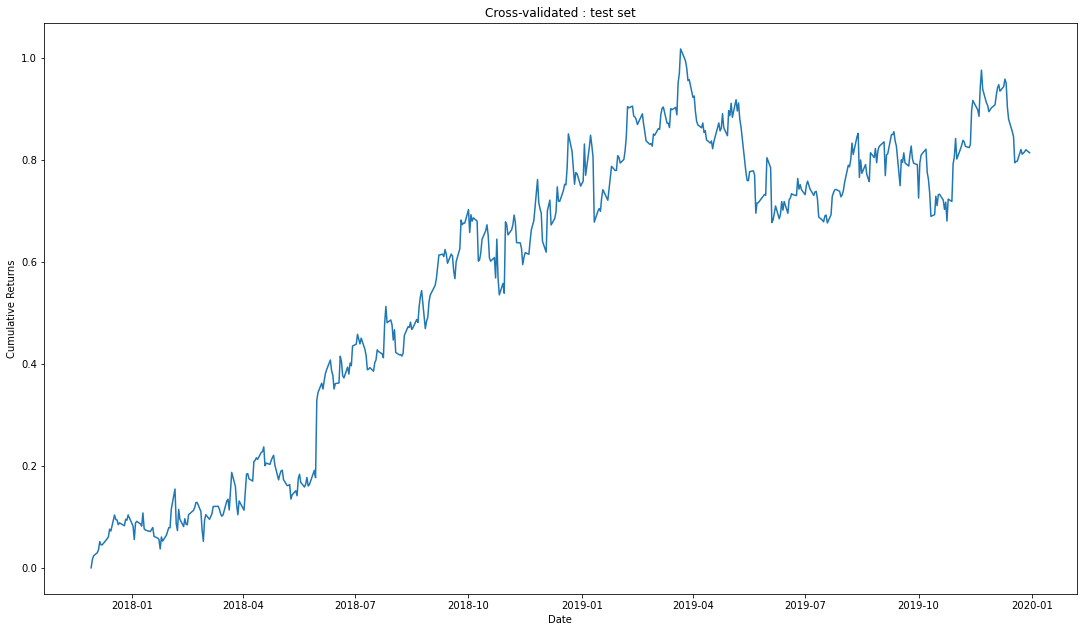

Out-of-sample: CAGR=0.331407 Sharpe ratio=1.16277 maxDD=-0.169074 maxDDD=195 Calmar ratio=1.96013  Rho=0.0234984 PVal=0.59148

mse: 0.00032
mae: 0.01249


In [124]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"adaboost": MAE})
RETURNs.update({"adaboost": round(final_return,5)})

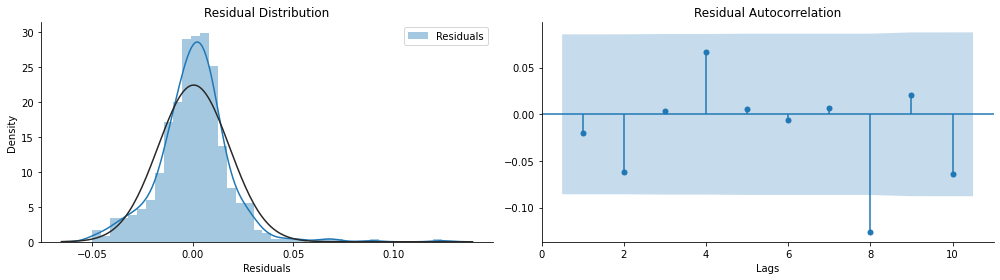

In [125]:
residuals = residual_plot()

In [126]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.11388062]


average return 0.002250
[-0.01237891  0.01143869]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.3658


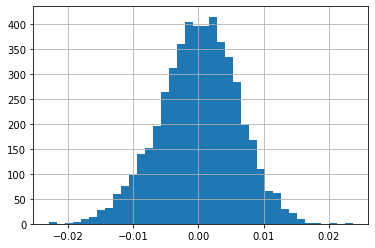

In [127]:
white_reality_check(close_price,test_position)

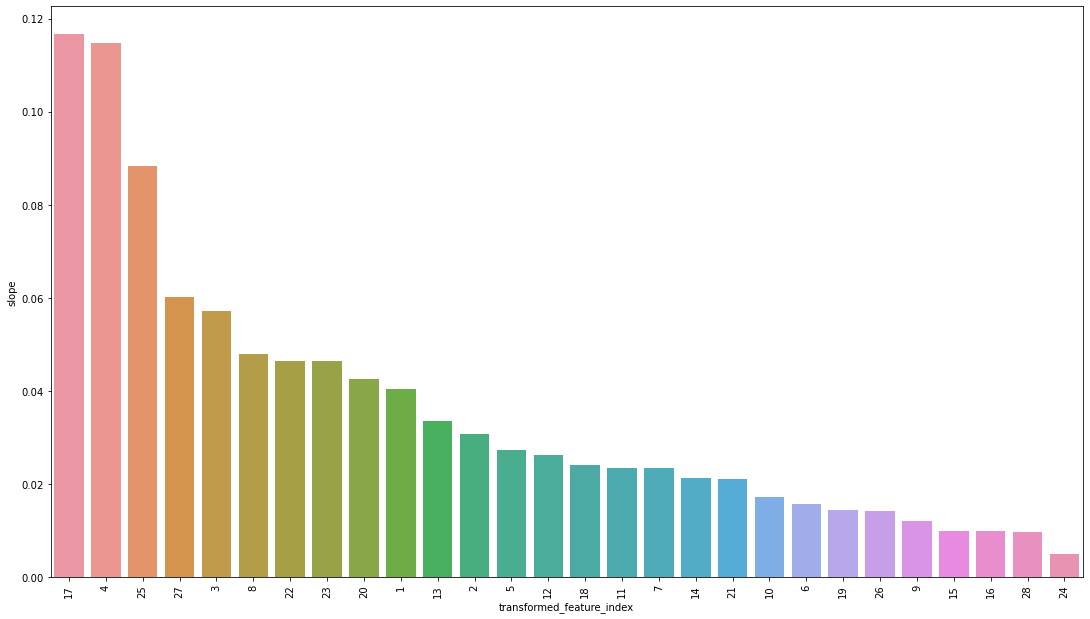

In [128]:
feature_importance_pca(best_model,position = 3,mode = 2)

## GradientBoosting

In [129]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
gbr = GradientBoostingRegressor()
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("gbr", gbr)])
#pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("adaboost", adaboost)])
loss_rs = ['squared_error', 'absolute_error', 'huber', 'quantile']
n_estimators_rs = [100,150,200,300]
lr_rs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
criterion_rs = ['friedman_mse', 'squared_error', 'mse', 'mae']
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]
param_grid =  [{'smoother__kw_args':  spans_rs, 'gbr__loss': loss_rs, 'pca__n_components':ncomponents_rs\
               ,'gbr__n_estimators':n_estimators_rs, 'gbr__learning_rate': lr_rs, 'gbr__criterion': criterion_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

0.08767072588401913
0.6867492372686496
0.026045761009898152
0.5224097031753235
-0.026515579447845713
0.33942588342969593
0.11827973574984227
0.35549265863221696
-0.050448594652623614
0.21998736394787785
-0.07548078327817434
0.19834169589763687
-0.060212626235219474
0.30574529695831815
0.15031009874497994
0.15944320465262213
0.059336042721178525
0.22247945385075396
0.04425495110073879
0.254119717320574
-0.019602723868201277
0.9999697996135724
0.10592582710407242
0.99928035913678
-0.058127095506506195
0.9928328263626065
0.007944318048147905
0.9898285624639646
0.08709498336691882
0.9825019893295168
-0.004858789197591308
0.4123001822855849
-0.05359989470668301
0.3768825130500768
0.007275917137853755
0.30324834021910974
0.20738092711961342
0.24936432002498857
-0.0318047700372215
0.13552429518155995
0.05380572486029871
0.881576048348073
-0.06939189031694257
0.7663269140627621
0.04713061253776511
0.7158881852721514
-0.12531119974838956
0.6727482901936782
-0.0737227235464127
0.6180105018163643

In-sample: CAGR=0.129568 Sharpe ratio=0.628956 maxDD=-0.30722 maxDDD=750 Calmar ratio=0.421744

mse: 0.00046
mae: 0.01735


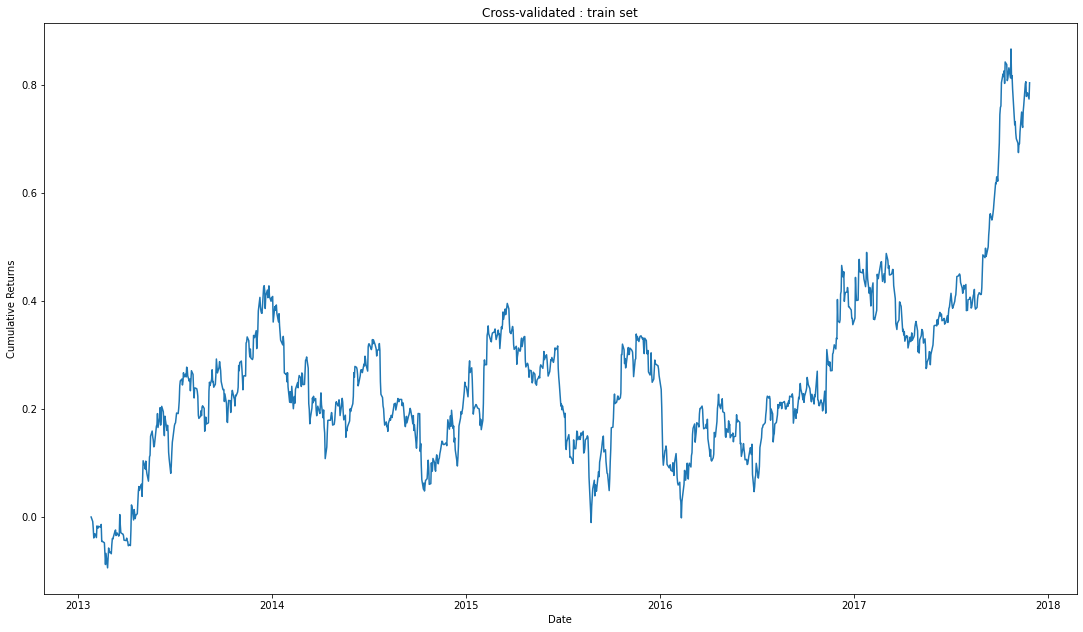

In [130]:
train_result(best_model,x_train)

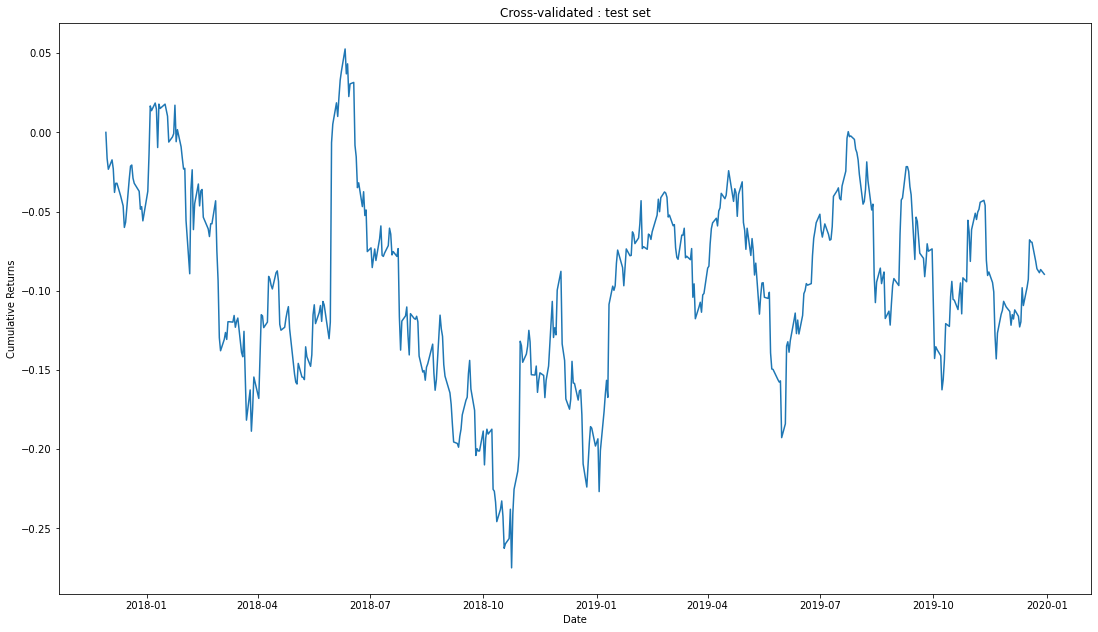

Out-of-sample: CAGR=-0.0441316 Sharpe ratio=-0.0221167 maxDD=-0.311201 maxDDD=391 Calmar ratio=-0.141811  Rho=0.0548874 PVal=0.209705

mse: 0.00063
mae: 0.02028


In [131]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"gradient_boosting": MAE})
RETURNs.update({"gradient_boosting": round(final_return,5)})

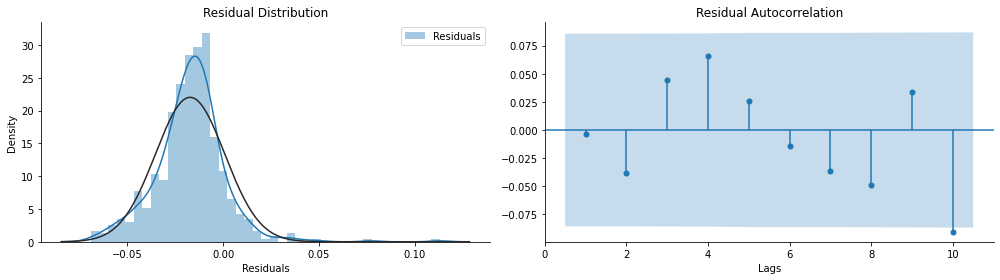

In [132]:
residuals = residual_plot()

In [133]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.3159968]


average return 0.006862
[-0.01095603  0.0123258 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.13080000000000003


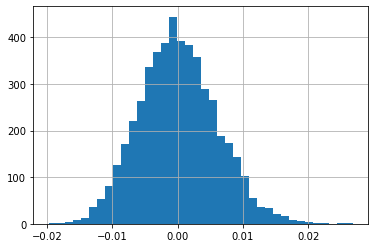

In [134]:
white_reality_check(close_price,test_position)

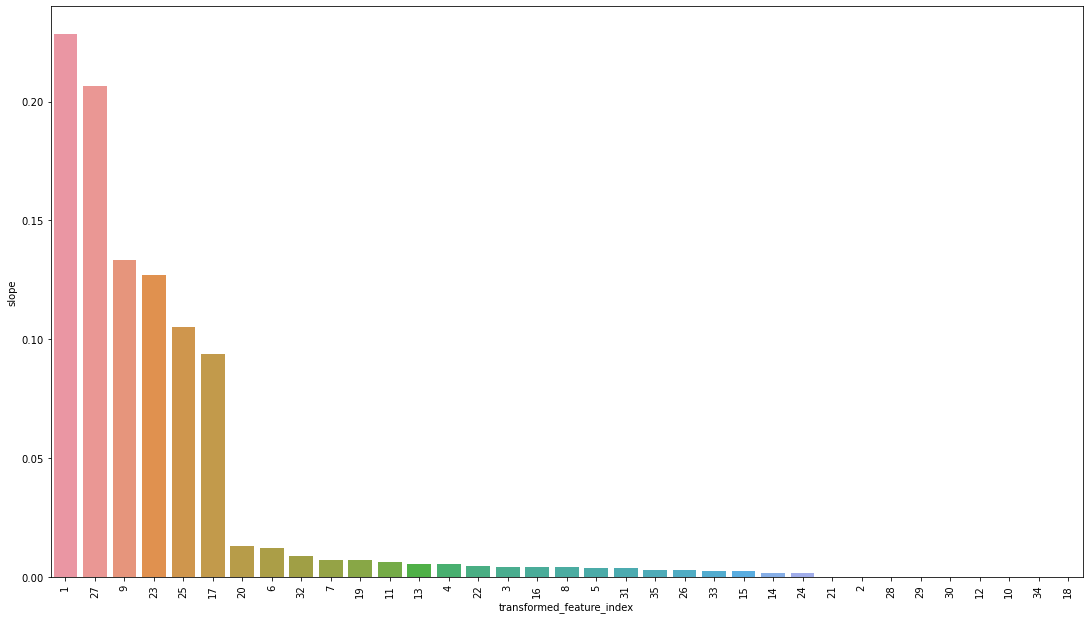

In [135]:
feature_importance_pca(best_model,position = 3,mode = 2)

## ExtraTreesRegressor

In [136]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)
etr = ExtraTreesRegressor()
pca = PCA()
ncomponents_rs = list(range(3,x_test.shape[1]))
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("etr", etr)])
n_estimators_rs = [100,150,200,300]
criterion_rs = ['mse', 'mae'] #try [“squared_error”, “absolute_error”] if not work
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]

param_grid =  [{'smoother__kw_args':  spans_rs, 'pca__n_components':ncomponents_rs\
               ,'etr__n_estimators':n_estimators_rs,  'etr__criterion': criterion_rs}]


myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.04957846612578883
1.0
0.02043606306692238
1.0
0.044445448602018274
1.0
0.08068259738173181
0.9999997561613456
-0.11283874216229921
0.9999994540157536
-0.06982528973909236
1.0
0.09866289103023919
1.0
0.029028043610565175
0.9999906814372492
-0.06201244581137338
0.9999980049564641
0.03151767104052728
0.9999957344980753
-0.021798974892146848
1.0
-0.03832873572126205
1.0
0.07397772276429275
0.9999926184456415
0.05202395058398915
0.999988484173923
0.12851652773427694
0.9999929135828827
-0.056954771001770606
1.0
0.09830282842811948
1.0
-0.017324587120891282
0.9999981153480846
-0.0502265091765624
0.999998669970976
-0.030824801571109655
0.9999981231791529
0.03985098200209525
1.0
0.06681097861005496
1.0
-0.019299908514073972
1.0
0.01448711953200536
1.0
0.00291636362593382
0.9999999999999998
-0.03284334891785352
1.0
-0.03604355753330702
1.0
-0.0001506236356457386
0.9999501090773928
0.044733769233196864
0.9999800551239286
0.12290901892277899
0.9999828043426098
-0.044095728429172275
1.0
-0.03635

In-sample: CAGR=15.4274 Sharpe ratio=17.6606 maxDD=-0.000533353 maxDDD=1 Calmar ratio=28925.2

mse: 0.0
mae: 0.00023


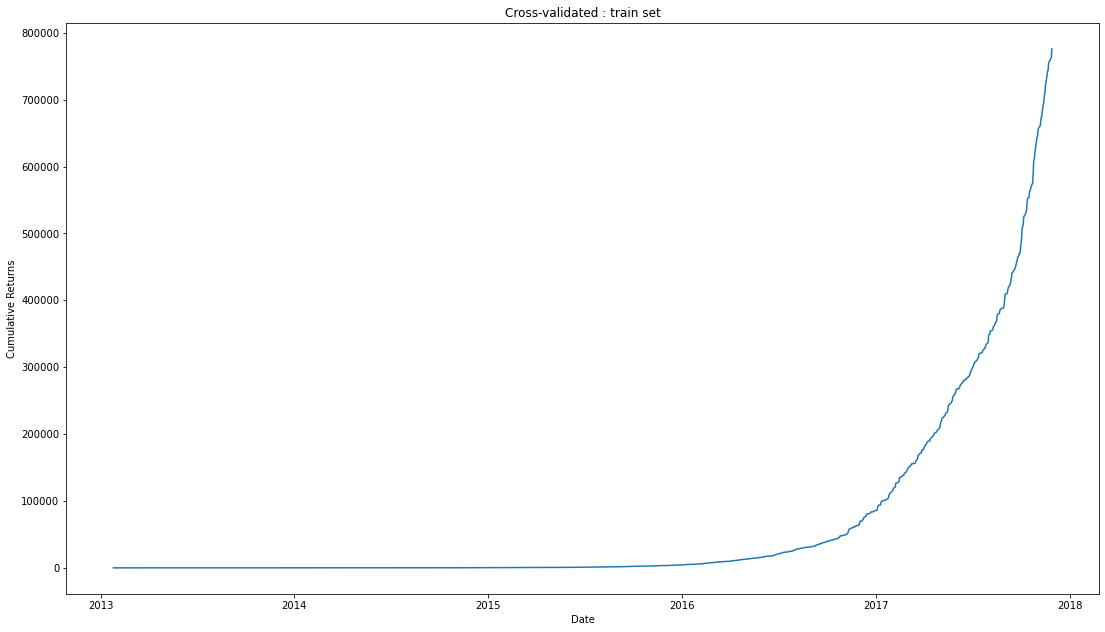

In [137]:
train_result(best_model,x_train)

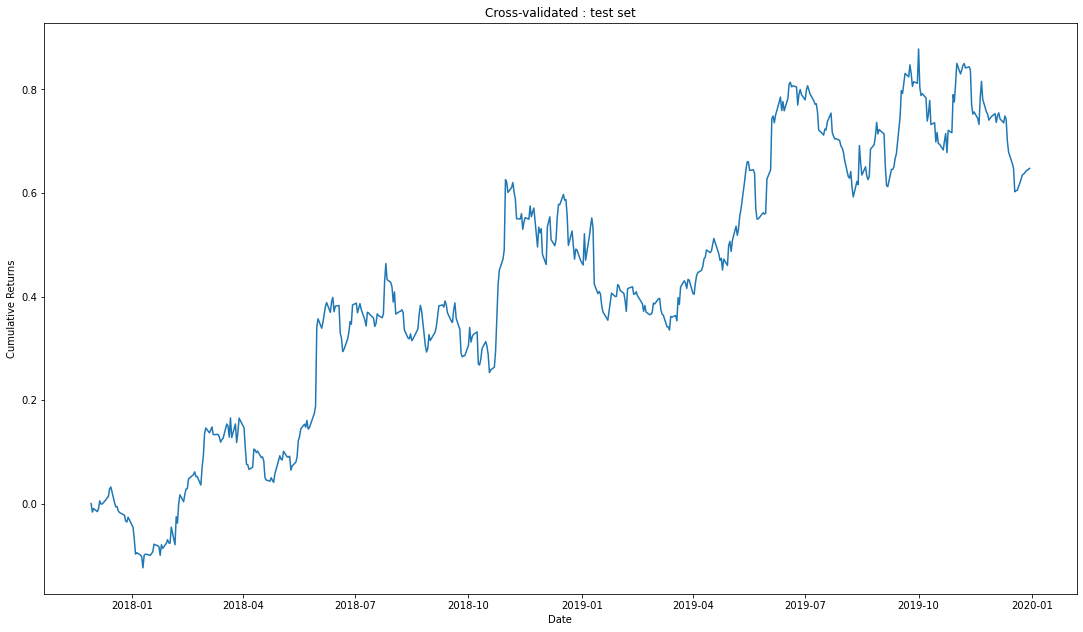

Out-of-sample: CAGR=0.271395 Sharpe ratio=0.99679 maxDD=-0.178857 maxDDD=131 Calmar ratio=1.51738  Rho=0.0555907 PVal=0.203916

mse: 0.00034
mae: 0.01327


In [138]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"extra_trees": MAE})
RETURNs.update({"extra_trees": round(final_return,5)})

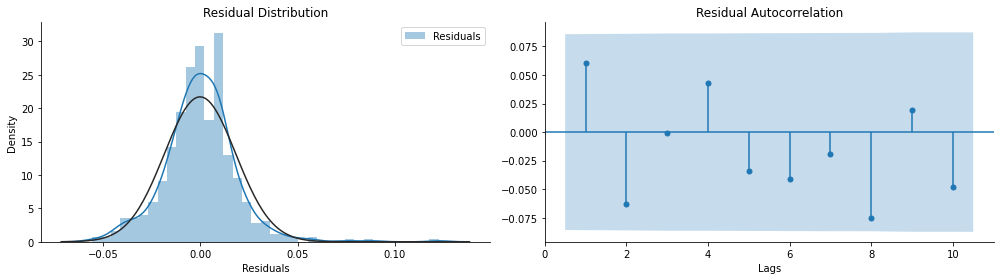

In [139]:
residuals = residual_plot()

In [140]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.34906333]


average return 0.010588
[-0.01085808  0.01163087]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.03839999999999999


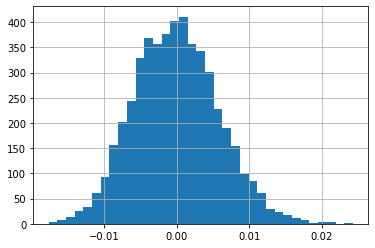

In [141]:
white_reality_check(close_price,test_position)

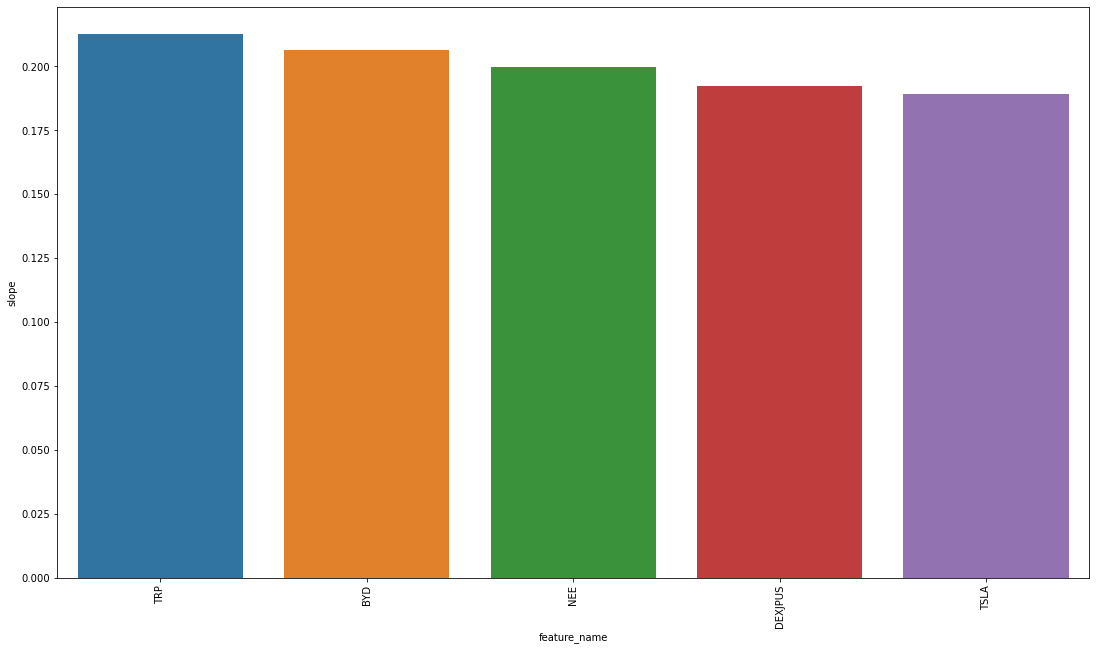

In [142]:
feature_importance(best_model,position = 3,mode = 2)

## VotingRegressor

In [143]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)

ridge = Ridge(max_iter=1000) 
rf = RandomForestRegressor(random_state=42)
svr = NuSVR()
knn = KNN()


param_grid =  [{'smoother__kw_args':  spans_rs, 'knn__n_neighbors': n_neighbors_rs,'knn__algorithm': algorithm_rs}]

vr = VotingRegressor(estimators=[('ridge', ridge), ('rf', rf), ('svr', svr),("knn",knn)],n_jobs = -1)

pca = PCA()

ncomponents_rs = list(range(3,x_test.shape[1]))#pca
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("vr", vr),("knn",knn)])
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]#smoother
a_rs = np.logspace(-7, 0, num=10, endpoint = True)#ridge
nestimators_rs = [100, 200, 300]#rf
c_rs = np.linspace(0.001, 5, num=5, endpoint=True) 
gamma_rs = ["scale","auto"]
kernel_rs = ['linear', 'poly', 'rbf', 'sigmoid']
nu_rs = np.linspace(0.1, 1, num=10, endpoint=True)
algorithm_rs = ['ball_tree', 'kd_tree', 'brute']#knn
n_neighbors_rs = [i for i in range(5,x_test.shape[1])]#knn

param_grid =  [{'smoother__kw_args':  spans_rs, 'pca__n_components':ncomponents_rs, 'vr__ridge__alpha': a_rs\
               ,'vr__rf__n_estimators':nestimators_rs,'vr__svr__kernel': kernel_rs, \
               'vr__svr__C': c_rs,'vr__svr__gamma': gamma_rs,
               'vr__svr__nu': nu_rs,'vr__knn__n_neighbors': n_neighbors_rs ,'vr__knn__algorithm': algorithm_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

-0.09247048040996493
0.4454662154936799
0.044770675474073277
0.463346886040824
-0.008352446045482768
0.4765635892723848
0.0475810476076378
0.4667092343906788
0.0670826336772687
0.3972530749577443
0.0644473354848472
0.9707509176751792
0.03480533043625363
0.9791461921282523
-0.06323200047955436
0.9815619643748134
-0.003868197257468709
0.9841053764320411
-0.018154581842674693
0.9821940026885067
-0.0182874497471323
0.9882889370636129
0.016971181054642313
0.989688537360362
0.05149239359657233
0.9902730539829128
0.008377576212351589
0.9887601221689389
-0.13523326431165342
0.9871140334366153
-0.07560895527087029
0.9769228525998738
0.05761409016525533
0.9799805084455596
0.025030349635523235
0.9835509579679116
0.04717072481665637
0.9843951100112912
-0.10571692180979568
0.9829306882698439
-0.06593464206610677
0.9795429079476565
-0.06564557857237277
0.9855103767832063
0.0774019064643708
0.9870255105745346
0.09812085649242305
0.9897431371646179
-0.086882906816127
0.9901888034395572
-0.020270943930

In-sample: CAGR=3.17519 Sharpe ratio=6.5898 maxDD=-0.0911683 maxDDD=47 Calmar ratio=34.8278

mse: 0.00017
mae: 0.00982


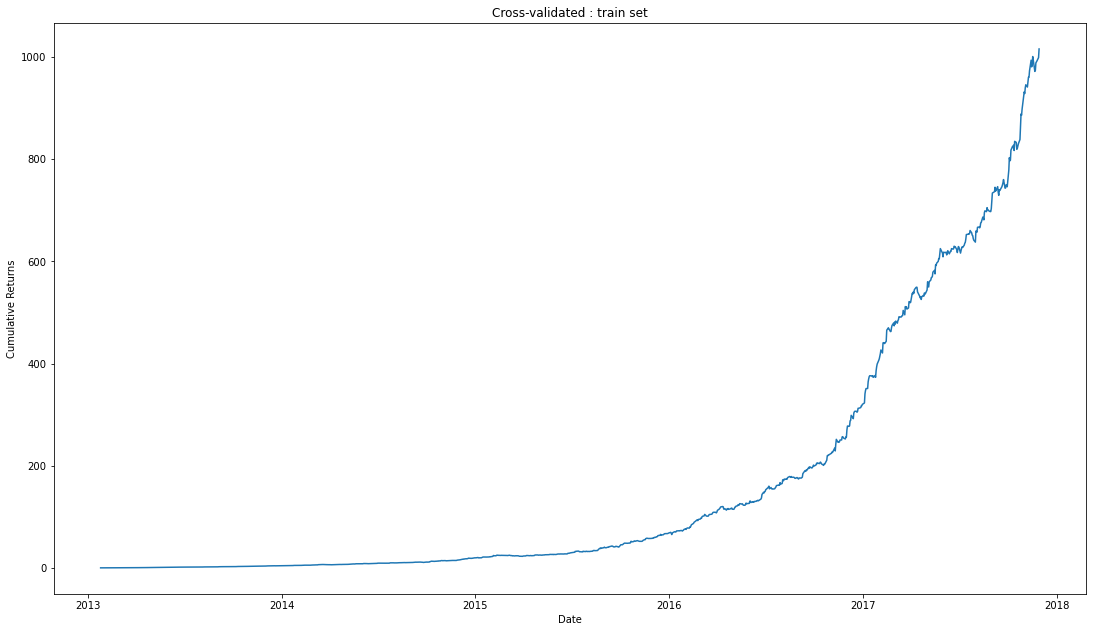

In [144]:
train_result(best_model,x_train)

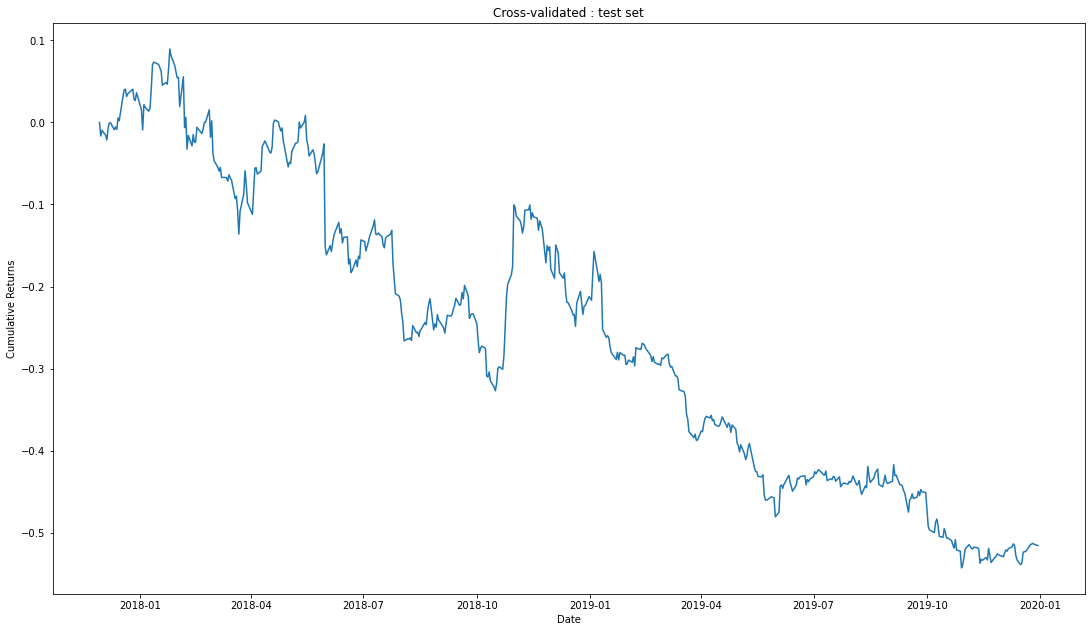

Out-of-sample: CAGR=-0.294479 Sharpe ratio=-1.10493 maxDD=-0.580528 maxDDD=485 Calmar ratio=-0.50726  Rho=-0.0499179 PVal=0.254014

mse: 0.00037
mae: 0.01397


In [145]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"voting": MAE})
RETURNs.update({"voting": round(final_return,5)})

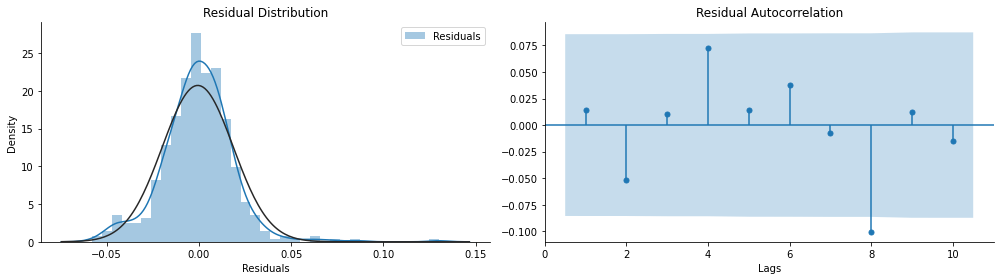

In [146]:
residuals = residual_plot()

In [147]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.37090223]


average return 0.000258
[-0.01068356  0.01223304]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.4686


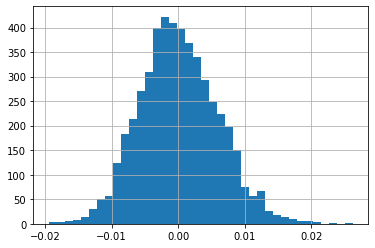

In [148]:
white_reality_check(close_price,test_position)

## BaggingRegressor

In [149]:
myscorerIC = make_scorer(information_coefficient, greater_is_better=True)#####
myscorerSharpe = make_scorer(sharpe, greater_is_better=True)#####

split = TimeSeriesSplit(n_splits=5)
smoother = FunctionTransformer(ewm_smoother)
#penalty type=L2 like ridge regression (small coefficients preferred), L1 like lasso  (coefficients can become zero)
scaler = StandardScaler(with_mean=True, with_std=True)

ridge = Ridge(max_iter=1000) 
rf = RandomForestRegressor(random_state=42)
svr = NuSVR()
knn = KNN()
br = BaggingRegressor( n_jobs = -1,random_state=42)
pca = PCA()
"""
a_rs = np.logspace(-7, 0, num=10, endpoint = True)#ridge
nestimators_rs = [100, 200, 300]#rf
c_rs = np.linspace(0.001, 5, num=5, endpoint=True) 
gamma_rs = ["scale","auto"]
kernel_rs = ['linear', 'poly', 'rbf', 'sigmoid']
nu_rs = np.linspace(0.1, 1, num=10, endpoint=True)
"""
ncomponents_rs = list(range(3,x_test.shape[1]))#pca
pipe = Pipeline([("scaler", scaler), ("smoother", smoother),("pca",pca),("br", br)])
spans_rs = [{'span': 2},{'span': 3},{'span': 5},{'span': 15},{'span': 22},{'span': 23},{'span': 27},{'span': 28} ]#smoother
bootstrap_rs = [True,False]
nestimators2_rs = [10, 20, 30]
base_estimator_rs = [ridge,rf,svr,knn]

param_grid =  [{'smoother__kw_args':  spans_rs, 'pca__n_components':ncomponents_rs,\
                'br__base_estimator': base_estimator_rs,
                 'br__n_estimators' : nestimators2_rs, 'br__bootstrap':bootstrap_rs}]

myscorer = myscorerIC
grid_search = RandomizedSearchCV(pipe, param_grid, cv=split, scoring=myscorer, return_train_score=True)
#grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)

grid_search.fit(x_train.values, y_train.values.ravel())

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

0.03434529197603183
0.06719105519463806
0.027079289801649153
0.11505256114452402
0.1545420019387513
0.1112368854412998
0.10608777481631097
0.09004893421688999
0.06823688389494341
0.0947610973205178
-0.052037234417782754
0.9711476490028724
0.007171127282854484
0.97220253426575
0.018852341139583777
0.9758696516206156
-0.01656285593786849
0.9766134615831508
-0.08082186082082507
0.9785820865105563
-0.009423365758522808
0.9852224018230051
-0.07745649482651089
0.9859370985129517
0.011065099176699093
0.9898724834146156
0.04680376759785513
0.9913998794832697
0.18503774919291857
0.9909777752191776
0.10014467254301329
0.49037705208346316
0.16834397385169578
0.48283657116249246
0.03998489457946521
0.48442258050586456
-0.042999477120631235
0.5046129659770467
0.02734707154305873
0.48913991219672165
0.08878678290337223
0.5306777584449546
0.10517844616501117
0.38936973106002826
0.014277686148400345
0.3389031337154105
0.06724697390051959
0.30683162964634836
0.08094809790842082
0.27752494394300525
0.20

In-sample: CAGR=0.360815 Sharpe ratio=1.4116 maxDD=-0.193314 maxDDD=205 Calmar ratio=1.86647

mse: 0.00022
mae: 0.01116


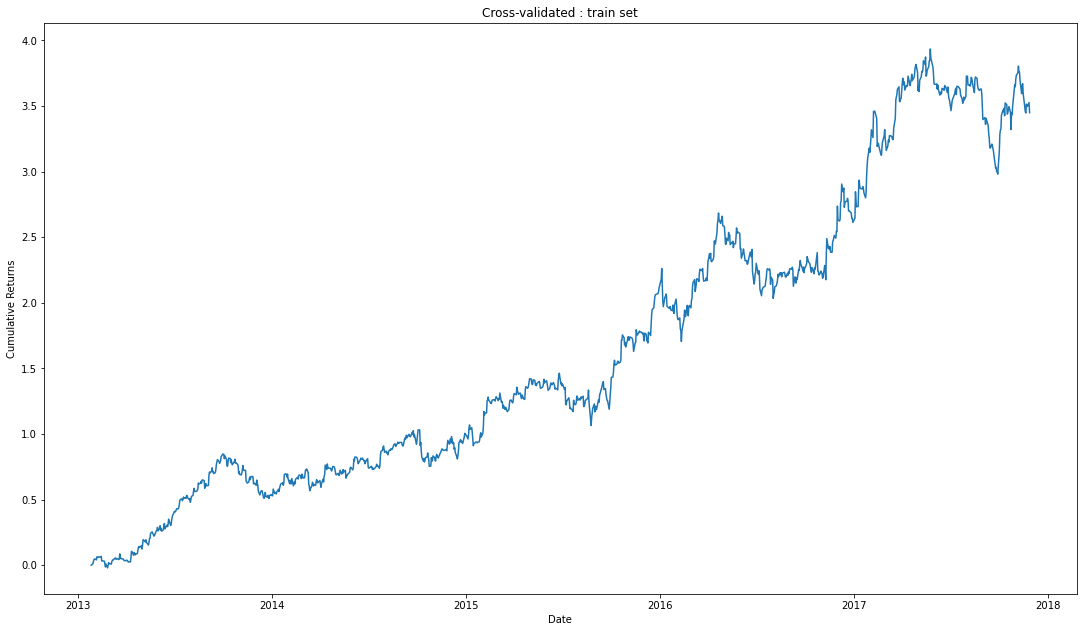

In [150]:
train_result(best_model,x_train)

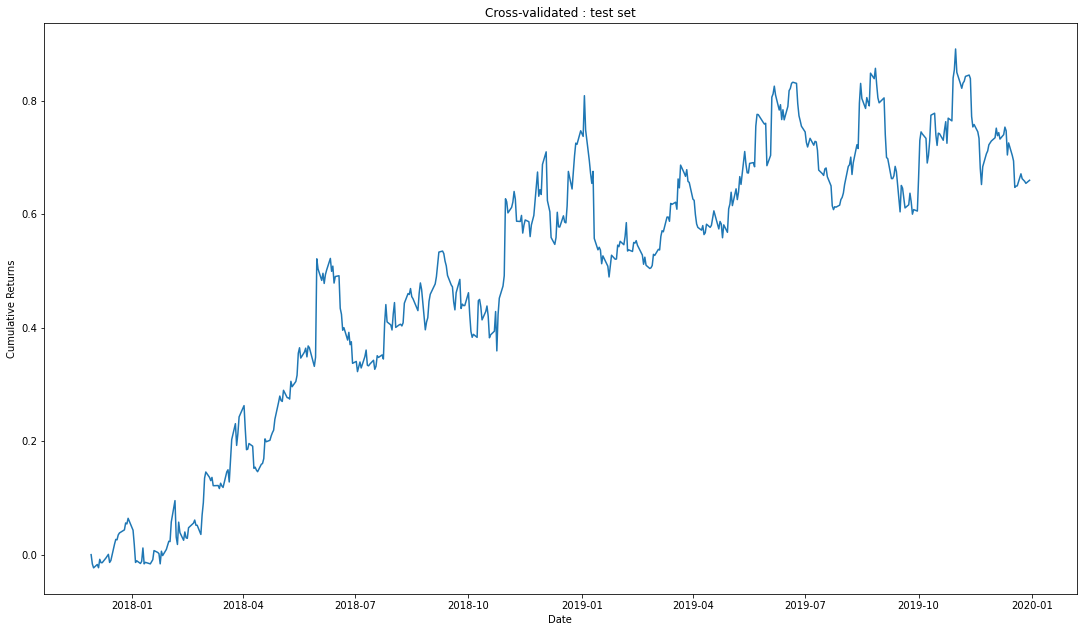

Out-of-sample: CAGR=0.275988 Sharpe ratio=1.00989 maxDD=-0.17665 maxDDD=104 Calmar ratio=1.56234  Rho=0.081279 PVal=0.0629994

mse: 0.00031
mae: 0.01233


In [151]:
final_return,test_position, MAE= test_result(best_model,x_test)
MAEs.update({"bagging": MAE})
RETURNs.update({"bagging": round(final_return,5)})

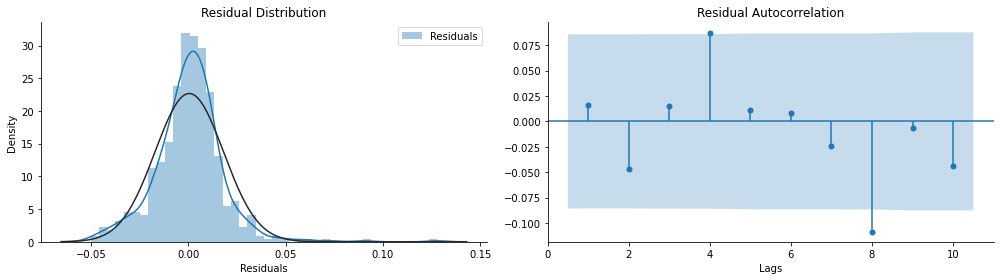

In [152]:
residuals = residual_plot()

In [153]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.2129176]


average return 0.009916
[-0.01095281  0.01240918]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.056400000000000006


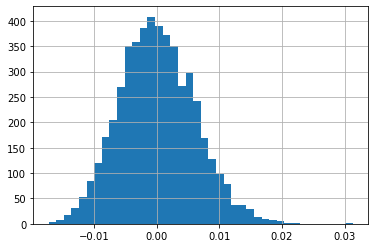

In [154]:
white_reality_check(close_price,test_position)

## LSTM

In [155]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(y_train)[seq_len-1:], np.array(y_test)
X_train_LSTM = np.zeros((x_train.shape[0]+1-seq_len, seq_len, x_train.shape[1]))
X_test_LSTM = np.zeros((x_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(x_train)[i:x_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[x_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


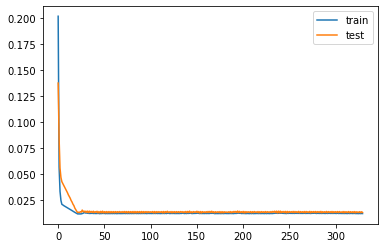

In [156]:
# Lstm Network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mae', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel()
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)
#Visual plot to check if the error is reducing
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [157]:
#error_Training_LSTM = mean_absolute_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mae(y_test,predicted)
print('mae is {0}, mse is {1}'.format(mae(y_test,predicted), mse(y_test,predicted)))

mae is 0.012690551073684431, mse is 0.0003298857199573708


In [158]:
MAEs.update({"lstm": round(error_Test_LSTM,5)})

## Arima

In [159]:
val = y_train.values

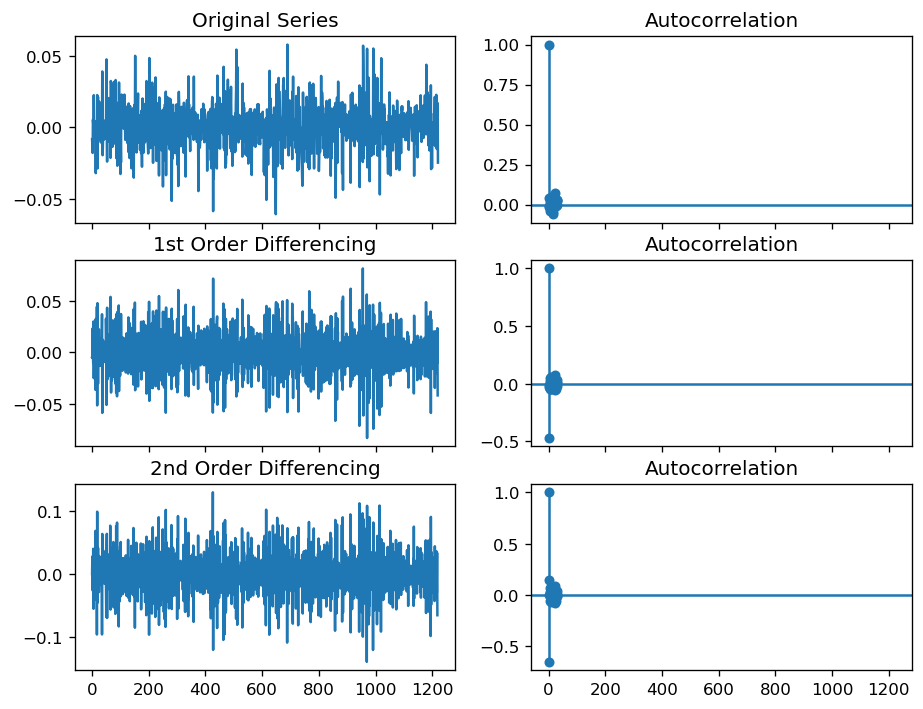

In [160]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# the autocorrelation plot is not clear, the clear version is in the next cell.
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

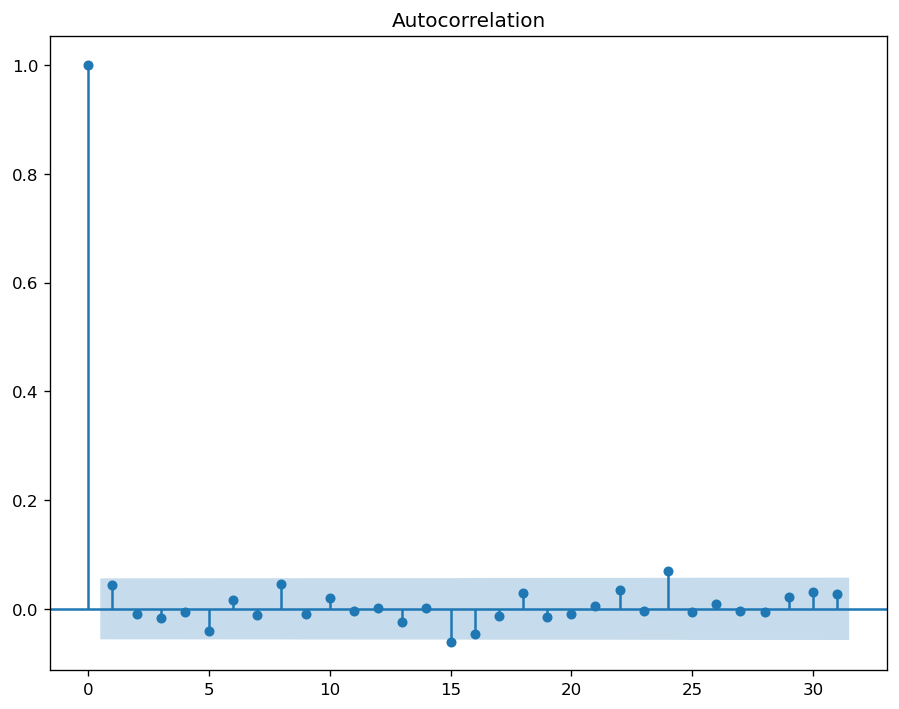

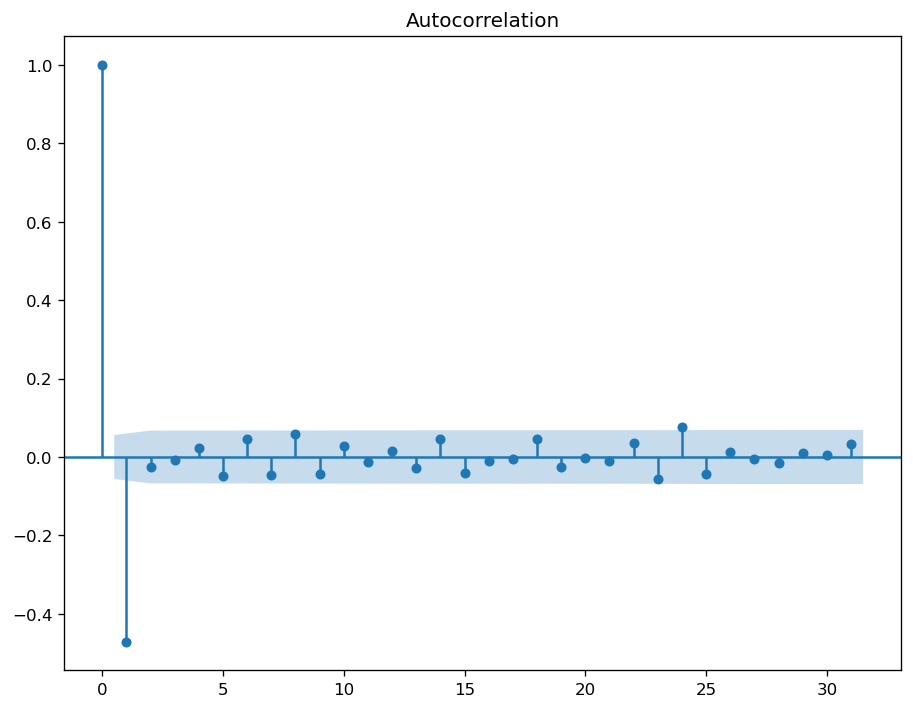

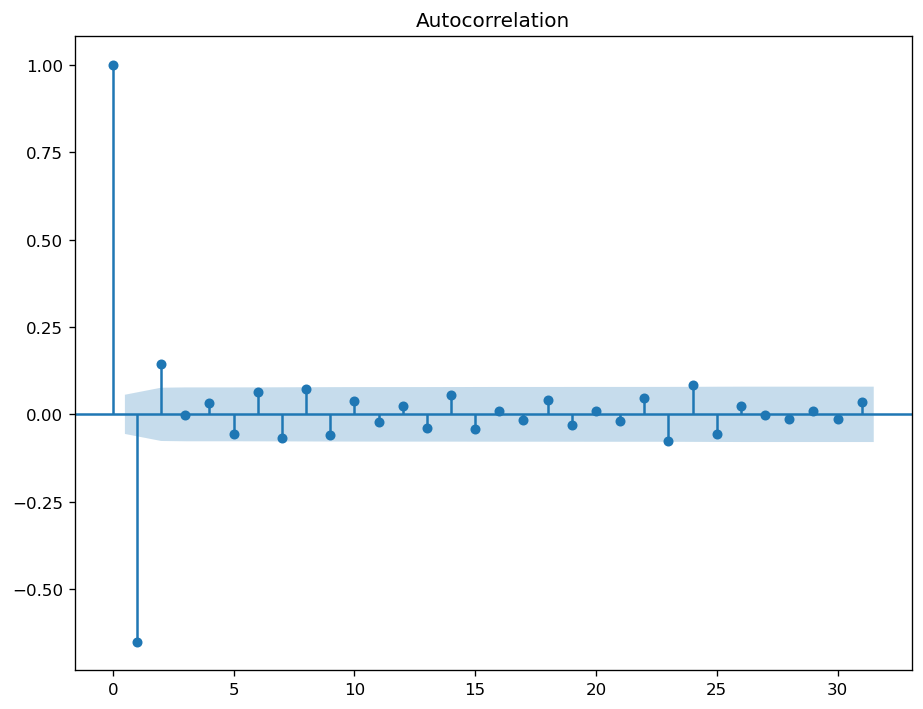

In [161]:
# no differencing needed according to the autocorrelation plot, since all correlations are inside the significance region
plot_acf(val)
plot_acf(np.diff(val))
plot_acf(np.diff(diffval))
plt.show()

In [162]:
#model = pm.auto_arima(y = val, X = x_train.values ,trace= True, suppress_warnings=True)
#print(model.summary())

In [163]:
model = pm.auto_arima(y = val, X = x_train.values, start_p=4, start_q=4,
test='adf', # use adftest to find optimal 'd'
max_p=6, max_q=6, # maximum p and q
#m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=True, 
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=-6713.781, Time=4.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6729.799, Time=2.33 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6727.809, Time=2.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6727.797, Time=3.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=726.368, Time=2.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6725.794, Time=3.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 17.364 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1221
Model:                        SARIMAX   Log Likelihood                3414.900
Date:                Tue, 21 Dec 2021   AIC                          -6729.799
Time:                        10:27:29   BIC                          -6474.428
Sample:                             0   HQIC                         -6633.685
     

The auto arima model determines to use no lags(previous data) error terms or differencing(as we discussed above). It means there is no obvious trend that the model have to be dealt with. The p-value of most of the feature terms are lower than 0.05 which is good. sigma2 is the standaed deviation of the predicted model and it is very small.

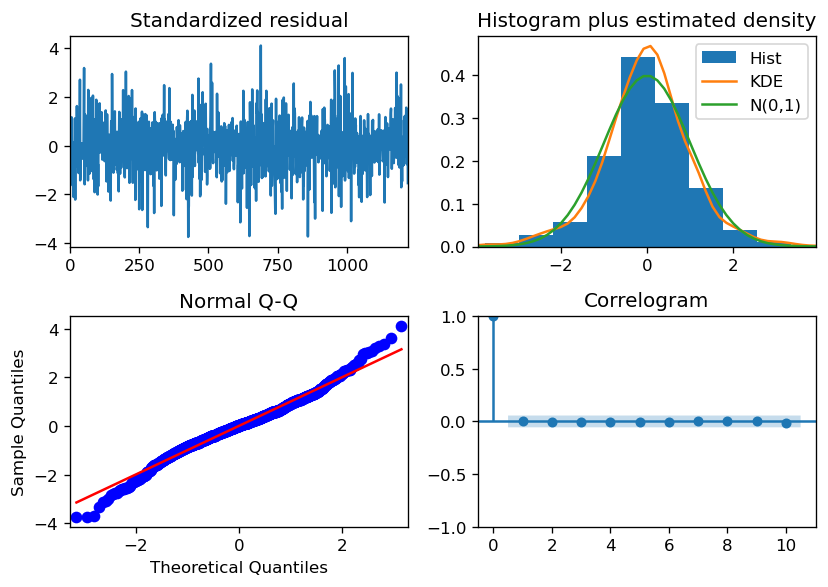

In [164]:
model.plot_diagnostics(figsize=(7,5))
plt.tight_layout()# avoid overlapping of subplot titles and x labels
plt.show()

The residual errors seem to fluctuate around a mean of zero and have a uniform variance.The model prediction has very small error.

The (distribution of residual)density plot suggests normal distribution with mean zero. It means the model prediction is very close to the actual label/value.

Normal Q-Q suggests that the distribution at the 2 sides is a little bit skewed but still in good shape. The theoretical quantiles and sample quantiles follow the sample direction.

There are no autocorrelation beween residual errors. all of them are inside the significance region, which means our model does have the abilities in capturing patterns and predicting.


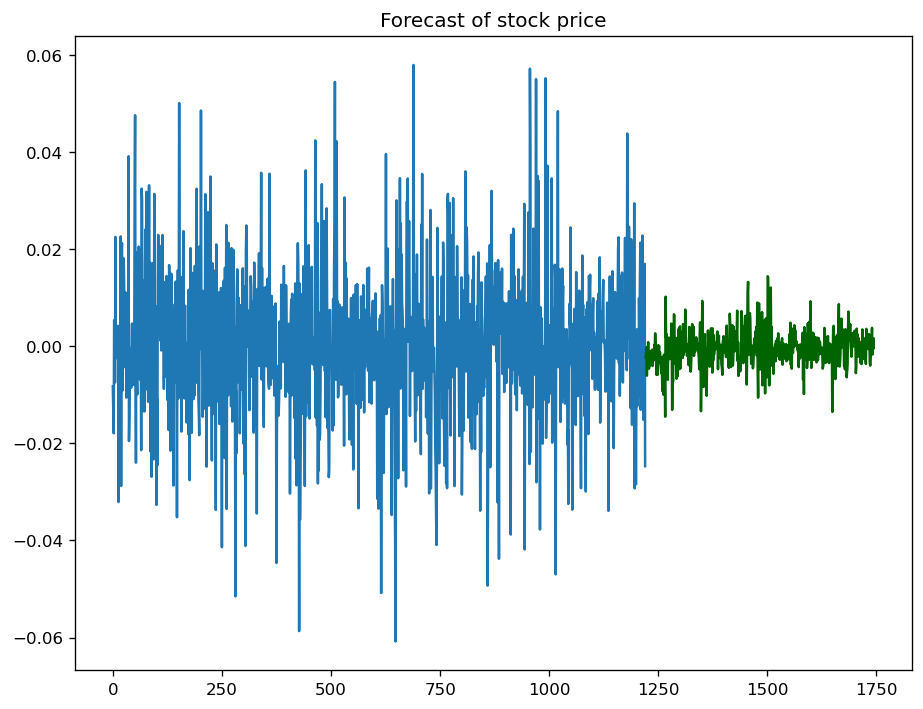

In [165]:
# Forecast
n_periods = len(y_test)
fc, confint = model.predict(X = x_test.values, n_periods=n_periods,return_conf_int=True)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
#lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
#plt.fill_between(lower_series.index,
#lower_series,
#upper_series,
#color='b', alpha=.15)
plt.title("Forecast of stock price")
plt.show()

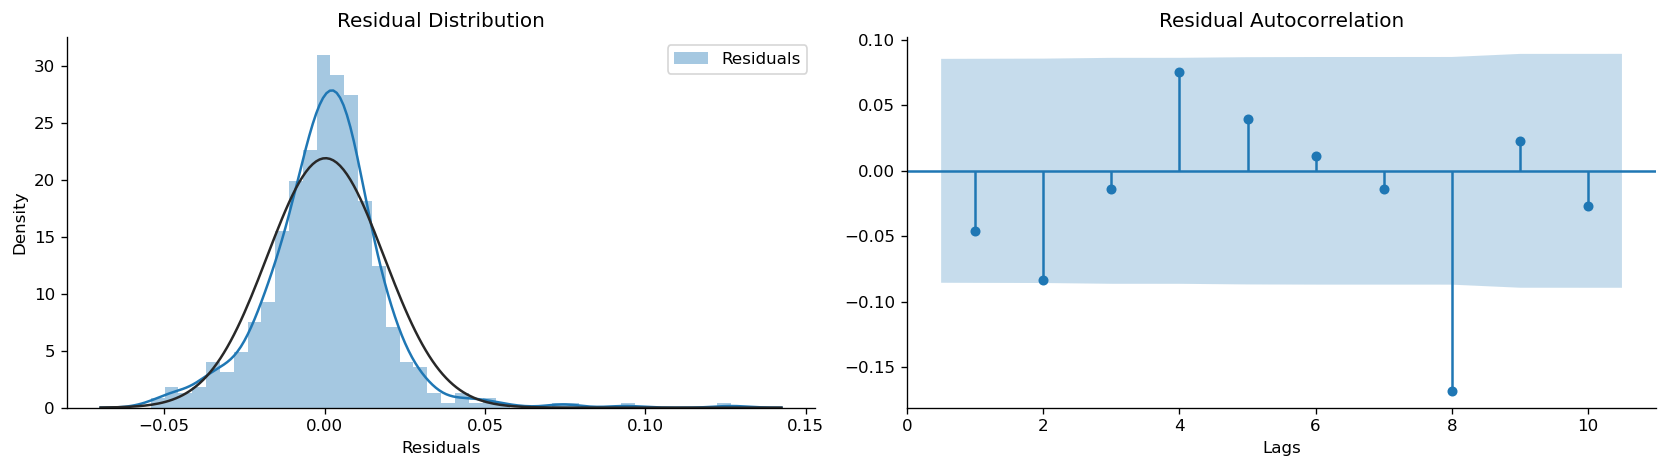

In [166]:
residuals = y_test.values - fc
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()

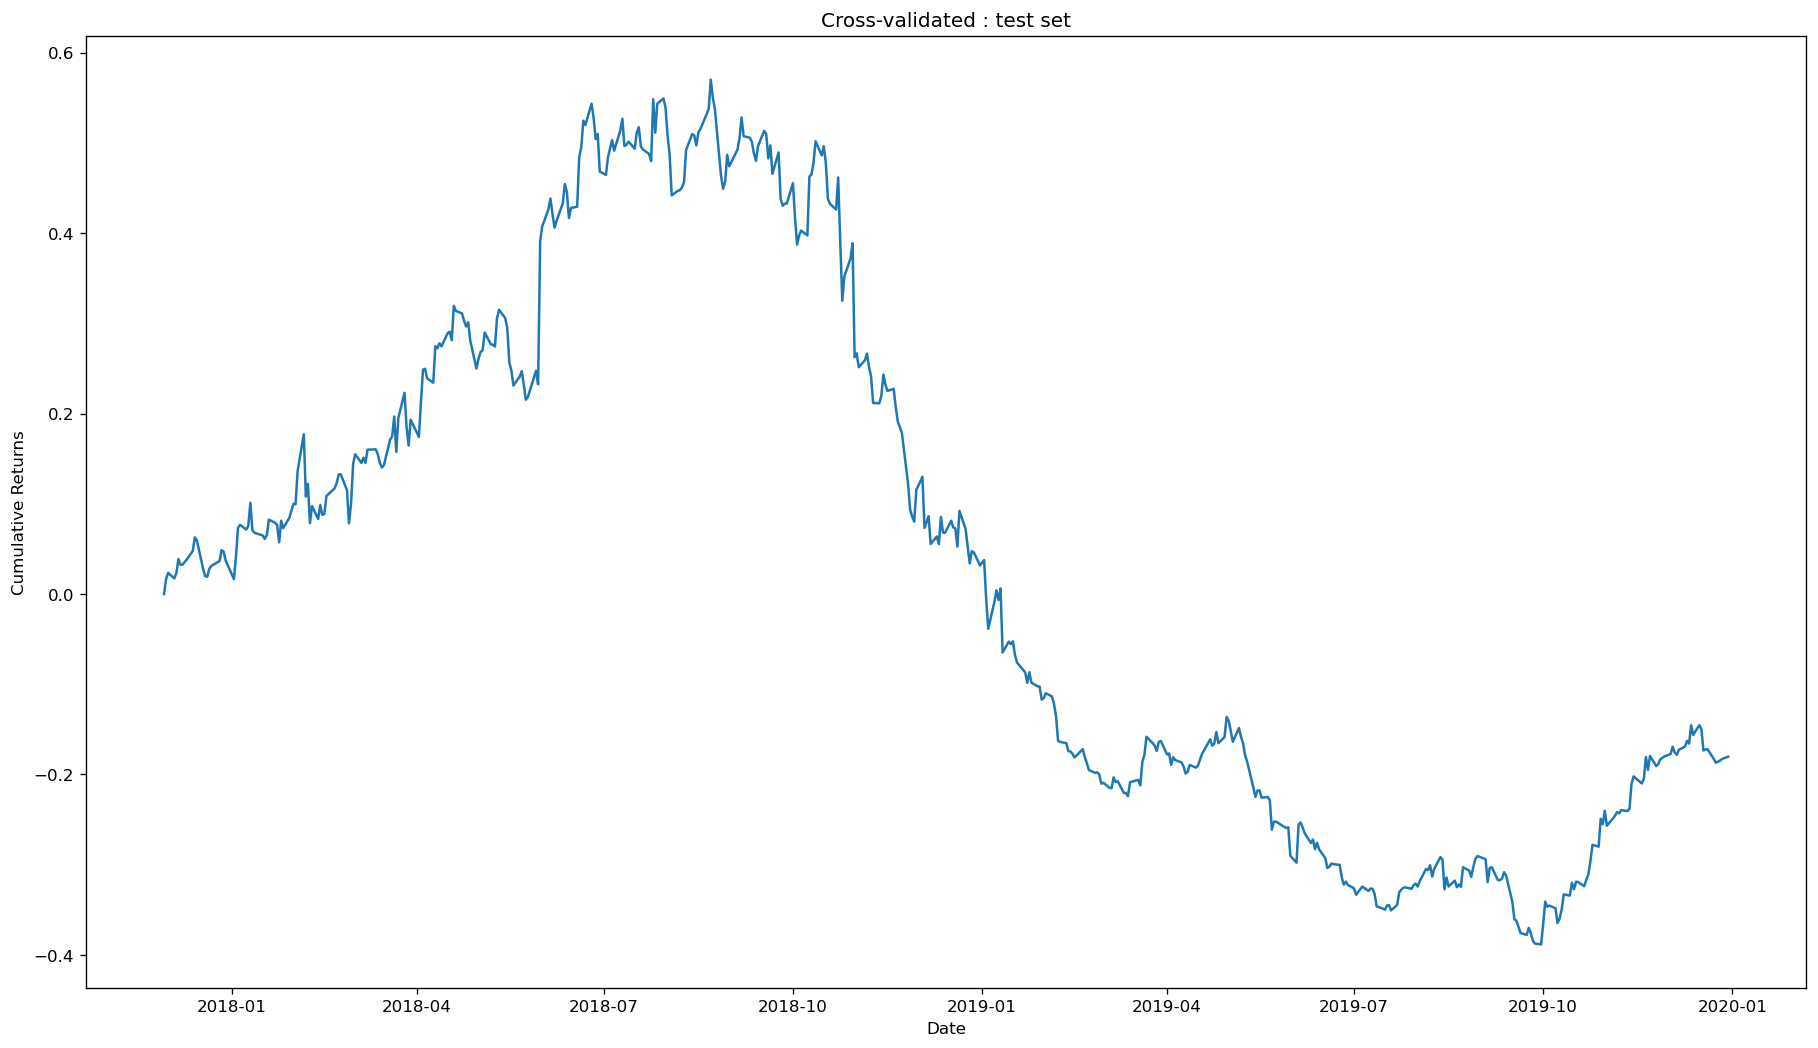

Out-of-sample: CAGR=-0.0911521 Sharpe ratio=-0.200855 maxDD=-0.610501 maxDDD=340 Calmar ratio=-0.149307  Rho=0.081279 PVal=0.0629994

mse: 0.00033
mae: 0.01277


In [167]:
final_return,test_position, MAE= test_result_other(best_model,fc)
MAEs.update({"arima": MAE})
RETURNs.update({"arima": round(final_return,5)})

In [168]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.00590549]


average return -0.006550
[-0.01242517  0.01144857]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.866


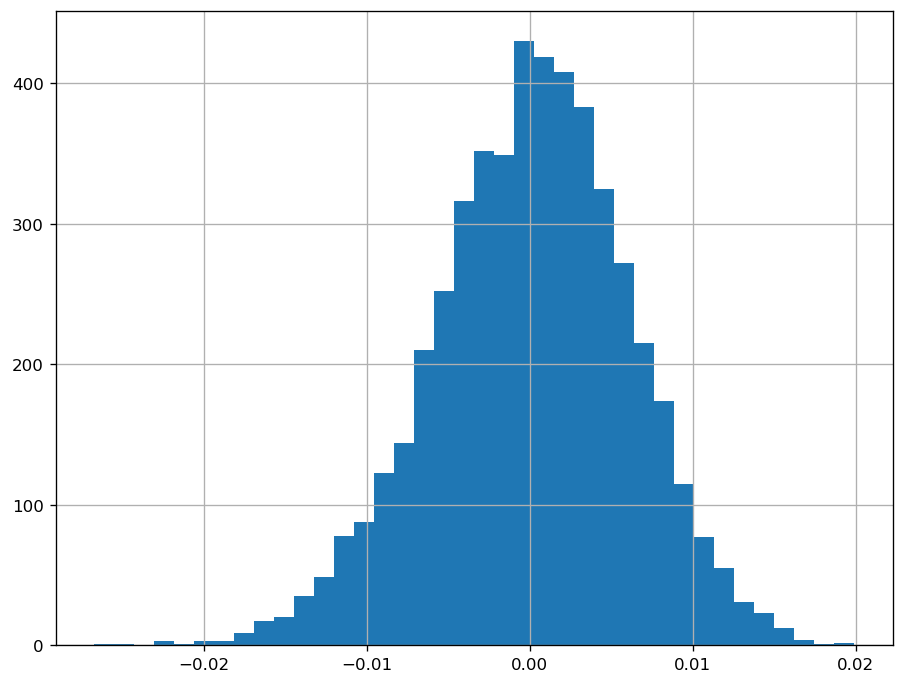

In [169]:
white_reality_check(close_price,test_position)

## walk forward validation(harness)

In [170]:
# harness loop for ridge
X_val = X.values
Y_val = Y.values
n_train = len(x_train)
n_records = len(X)
harness_pred = []
for i in range(n_train, n_records):
    train_data, test_data = X_val[0:i], X_val[i:i+1]
    train_label, test_label = Y_val[0:i], Y_val[i:i+1]    
    #print('train=%d, test=%d' % (len(train), len(test)))
    scaler = StandardScaler(with_mean=True, with_std=True)
    ridge = Ridge(max_iter=1000, alpha = 0.03) 
    train_data = scaler.fit_transform(train_data)
    # to prevent potential leakage of information, we ony use transform
    test_data = scaler.transform(test_data)
    ridge.fit(train_data, train_label)
    prediction = ridge.predict(test_data)
    harness_pred.append(prediction[0])
harness_pred

[-0.0023458444924135914,
 -0.001983738654782213,
 -0.0008146243926748219,
 -0.005612923847214989,
 -0.0031637337958899648,
 -0.0029943073903934917,
 0.000747201915631716,
 -0.004037933071178476,
 -0.004175831651181853,
 -0.0029355371174417696,
 -0.0011621514536196307,
 -0.0037985032905011318,
 -0.001156910490720758,
 -0.000984376776657912,
 -0.0010927082462172753,
 -0.0007343758095255205,
 -0.0039767356960556804,
 -0.002579928984334277,
 -0.003018612085806024,
 -0.0024732978103983215,
 0.00041677661571202834,
 -0.0013035010708823528,
 0.0032058864877118898,
 0.001650730276914833,
 -0.0015994279416645931,
 -0.0055318167176935,
 -0.004284078848940513,
 -0.002071914430525514,
 -0.00523836824888188,
 0.001010790861264326,
 -0.00043280652122339104,
 8.087868586093548e-05,
 -0.0031855524587747213,
 0.0006355689374739055,
 -0.0023357305762533222,
 -0.0031994758423455447,
 -0.005193159494467023,
 -0.001792601701344895,
 -0.006871351931374302,
 -0.007808920387870237,
 -0.00508145607628652,
 -0.

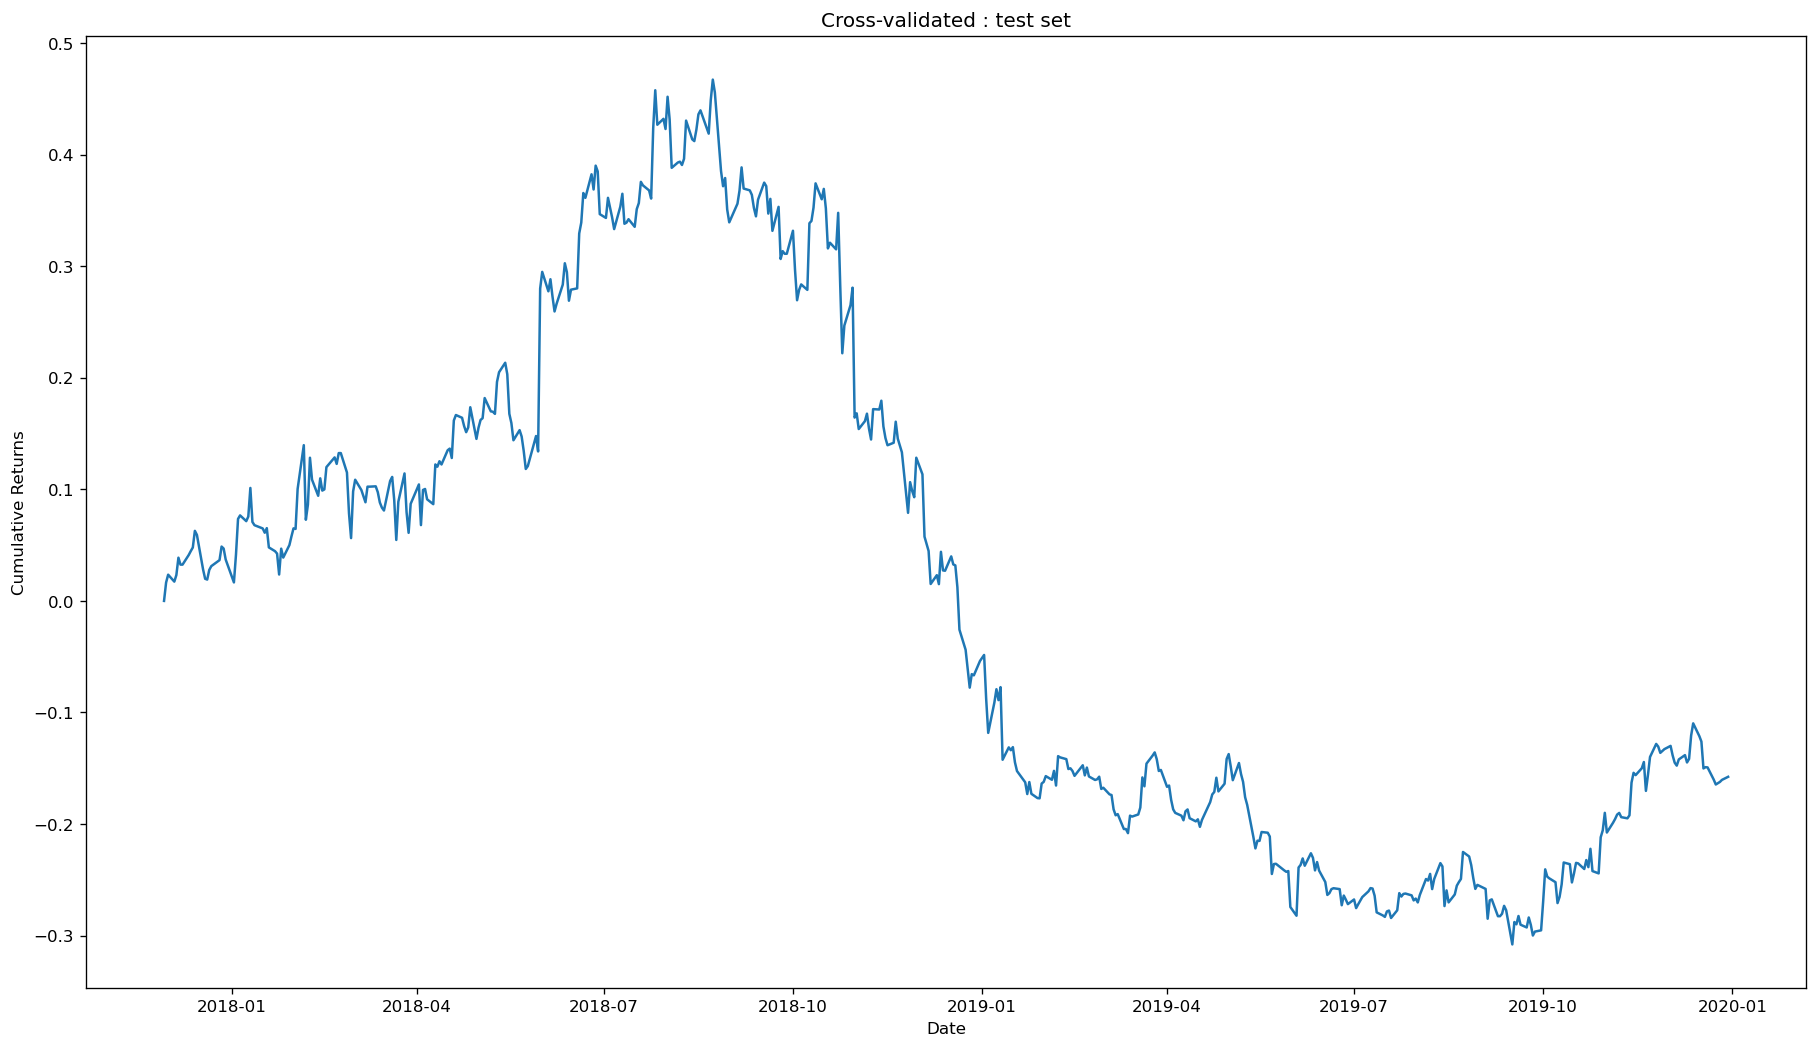

Out-of-sample: CAGR=-0.0792223 Sharpe ratio=-0.154332 maxDD=-0.528392 maxDDD=339 Calmar ratio=-0.149931  Rho=0.09006 PVal=0.0393189

mse: 0.00033
mae: 0.01268


In [171]:
harness_pred = np.array(harness_pred)
final_return,test_position, MAE= test_result_other(ridge, harness_pred)
MAEs.update({"move_forward_ridge": MAE})
RETURNs.update({"move_forward_ridge": round(final_return,5)})

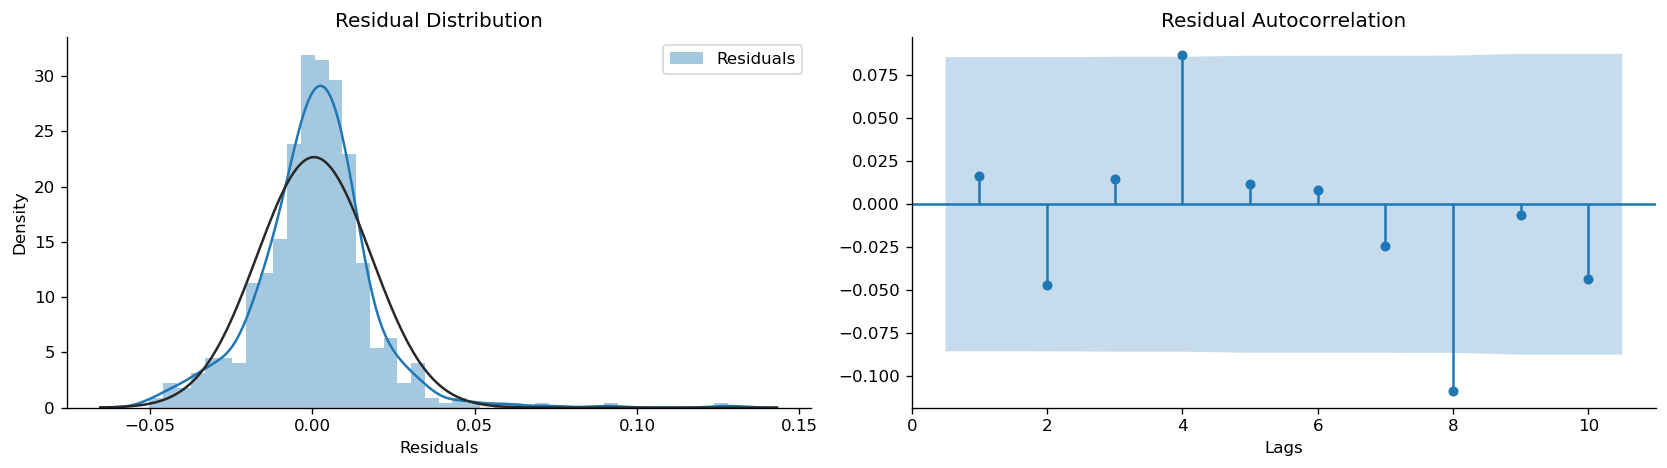

In [172]:
residuals = residual_plot()

In [173]:
residual_autocorrelation(residuals)

Ljung-Box test p-value [0.2129176]


average return -0.006666
[-0.01203878  0.0109188 ]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.8642


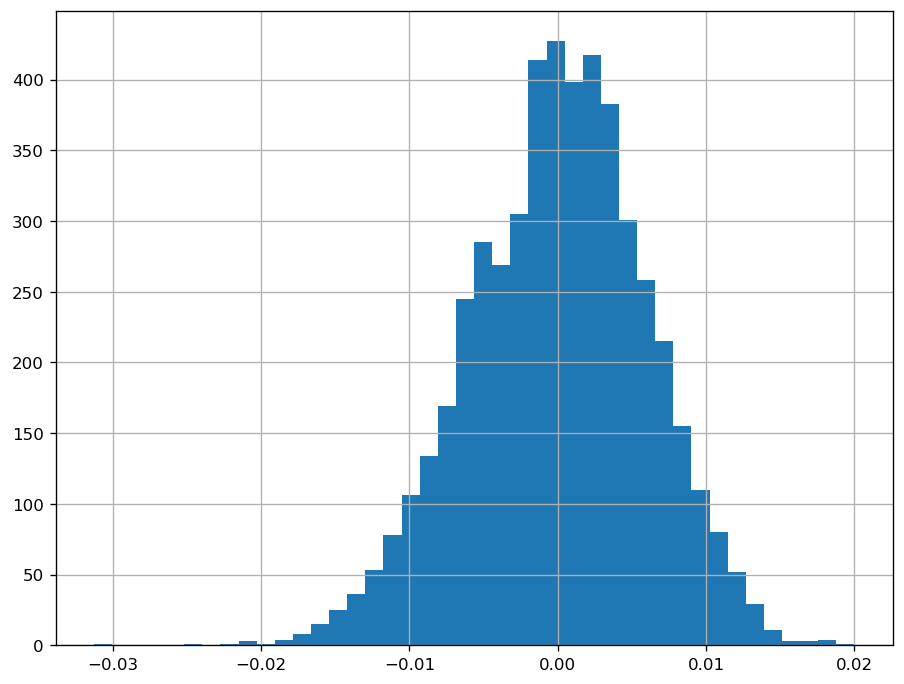

In [174]:
white_reality_check(close_price,test_position)

## 6. model results

In [175]:
MAE_sorted = dict(sorted(MAEs.items(), key=lambda item: item[1]))
MAE_sorted

{'lasso': 0.01231,
 'bagging': 0.01233,
 'ridge_pca': 0.01239,
 'knn': 0.01249,
 'adaboost': 0.01249,
 'move_forward_ridge': 0.01268,
 'lstm': 0.01269,
 'ridge': 0.01272,
 'arima': 0.01277,
 'mlp': 0.01284,
 'random_forest': 0.01298,
 'extra_trees': 0.01327,
 'voting': 0.01397,
 'xgboost': 0.01444,
 'linear_svr': 0.01478,
 'gradient_boosting': 0.02028,
 'nu_svr': 0.02874,
 'kmeans': 7.63556}

In [176]:
RETURNS_sorted = dict(sorted(RETURNs.items(), key=lambda item: item[1],reverse=True))
RETURNS_sorted

{'adaboost': 0.81338,
 'lasso': 0.79555,
 'ridge_pca': 0.68298,
 'bagging': 0.65994,
 'extra_trees': 0.64754,
 'mlp': 0.49671,
 'linear_svr': 0.03183,
 'ridge': -0.08517,
 'xgboost': -0.08702,
 'knn': -0.08847,
 'gradient_boosting': -0.08958,
 'kmeans': -0.11099,
 'move_forward_ridge': -0.1577,
 'arima': -0.18024,
 'random_forest': -0.19376,
 'nu_svr': -0.26306,
 'voting': -0.51583}

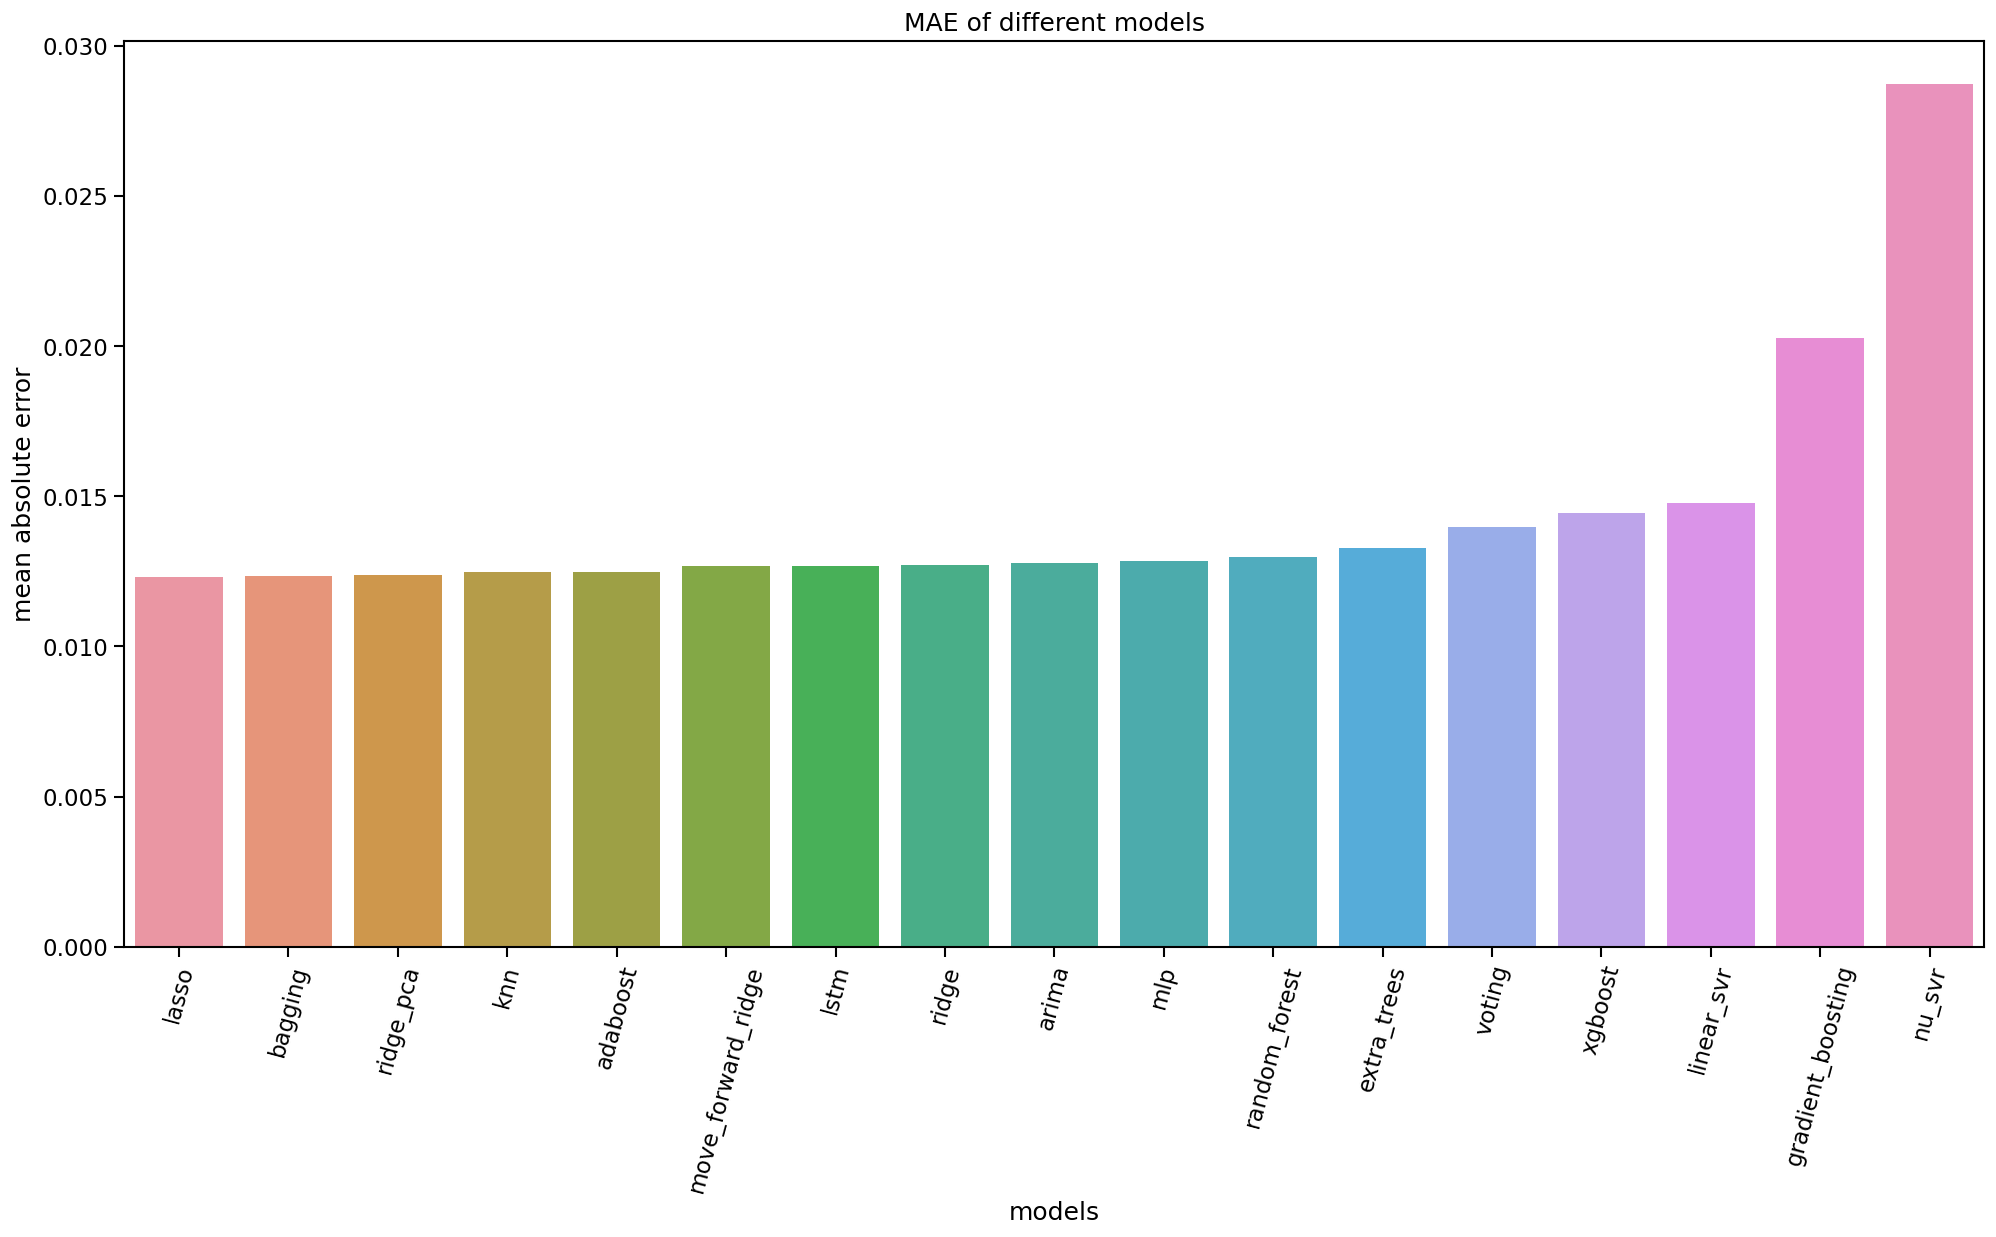

In [177]:
# graph of model MAEs
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(20, 10))
    plt.title('MAE of different models')
    # exclude kmeans since it has a large value. It may impact the layout of output graph
    sns.barplot(x=list(MAE_sorted.keys())[:-1], y=list(MAE_sorted.values())[:-1])
    plt.xticks(rotation=75)
    plt.xlabel('models')
    plt.ylabel('mean absolute error');

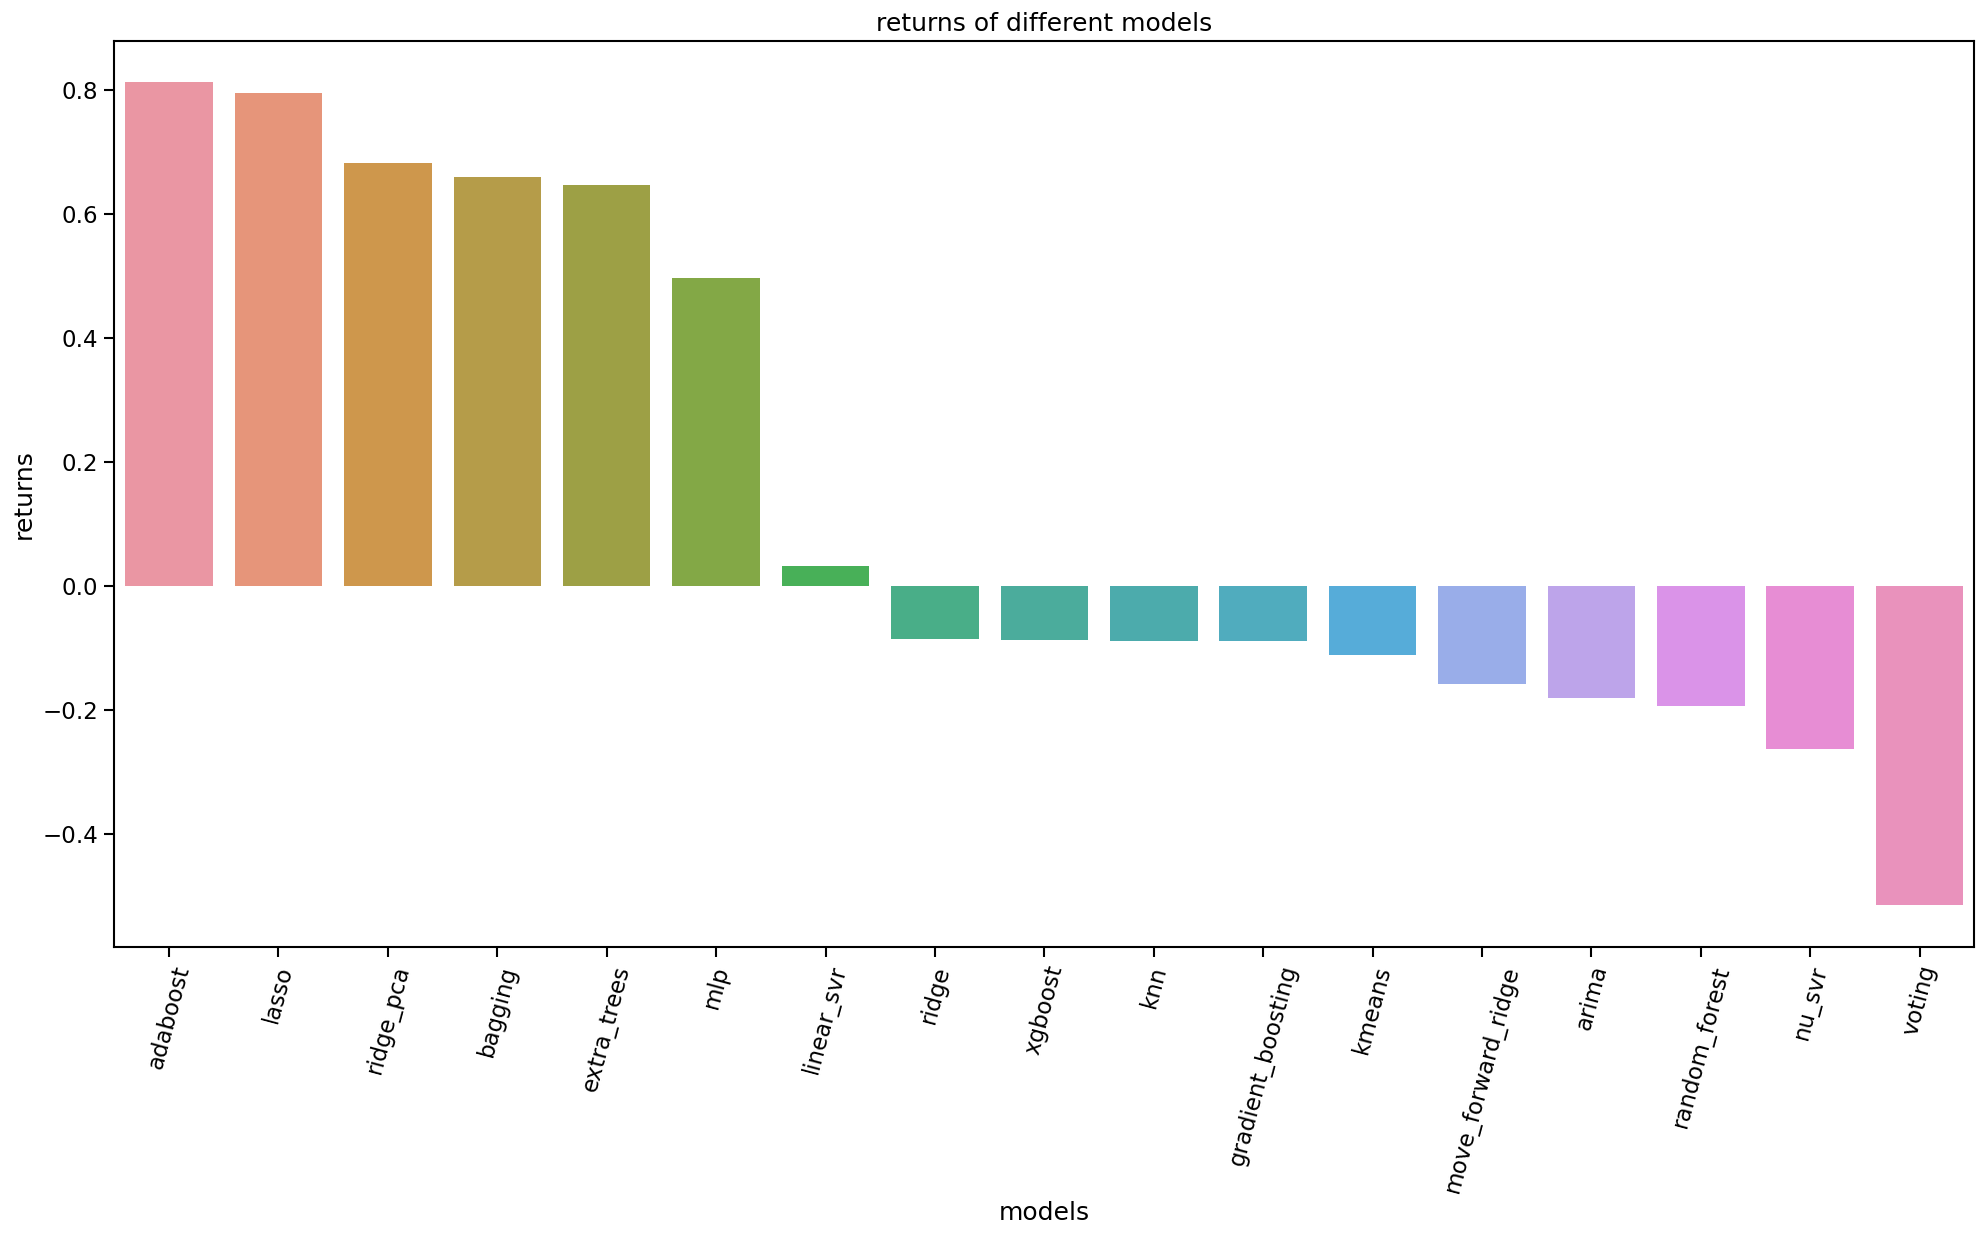

In [178]:
# graph of model returns
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(20, 10))
    plt.title('returns of different models')
    sns.barplot(x=list(RETURNS_sorted.keys()), y=list(RETURNS_sorted.values()))
    plt.xticks(rotation=75)
    plt.xlabel('models')
    plt.ylabel('returns');